#**Import Required Libraries:**
* The following cell contains all the import statements required for the script.
* The libraries include those for data manipulation, data visualization, statistics, machine learning, deep learning, and some additional utilities.

In [ ]:
# ************************** PYTHON FUTURE **************************
# Enables forward compatibility and access to certain features
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# ************************** GENERAL PYTHON LIBRARIES **************************
import warnings
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 1000)
np.random.seed(2)

# ************************** DATA VISUALIZATION LIBRARIES **************************
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# ************************** STATISTICS AND MACHINE LEARNING LIBRARIES **************************
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error

import scipy.stats as stats
from scipy.stats import weibull_min
from scipy.stats import shapiro

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot
import statsmodels.stats.diagnostic as smd
import statsmodels.stats.api as sms


# ************************** DEEP LEARNING AND NEURAL NETWORK LIBRARIES **************************
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Masking, BatchNormalization, GRU, Lambda
from keras import backend as k
from keras import callbacks
from keras.optimizers import RMSprop, Adam
from keras.callbacks import History

# ************************** OTHER LIBRARIES **************************
from tqdm import tqdm
from six.moves import xrange
from pandas import Interval

# **Installation of Statistical Analysis Libraries:**


In [ ]:
!pip install scipy  statsmodels  scikit_posthocs
print("\n")
!pip install lifelines



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 11.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=b625d1c95d42cc0461a5bd849fd725390bdf0aa8ad8fc63fdc89005bd6503420
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


# **Installation and Import of WTTE Library:**
* The following cell handles the installation of the 'Weibull Time To Event (WTTE)' library, which is used for survival analysis, and the import of the necessary modules and classes from this library.

In [ ]:
#from keras.layers.wrappers import TimeDistribute
!pip install wtte
import wtte.weibull as weibull
import wtte.wtte as wtte
from wtte.wtte import WeightWatcher

  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydrive2 1.6.3 requires six>=1.13.0, but you have six 1.10.0 which is incompatible.
gspread-dataframe 3.3.1 requires six>=1.12.0, but you have six 1.10.0 which is incompatible.
tensorflow 2.12.0 requires six>=1.12.0, but you have six 1.10.0 which is incompatible.


# **To make change images into pdf**

In [ ]:
!pip install img2pdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 32.4 MB/s eta 0:00:00
  Created wheel for img2pdf: filename=img2pdf-0.4.4-py3-none-any.whl size=44861 sha256=a88e47240049d2721476f9f245b94a05e036ca36d11174e85c7614a2593fef98
  Stored in directory: /root/.cache/pip/wheels/0b/85/be/a7faed8033e47e5a653a2502b5494b1d613bcd075c99b8152e
Successfully built img2pdf


In [ ]:
# Statistical Analysis
import scipy.stats as stats
from scipy.stats import shapiro  # Shapiro-Wilk test for normality
from scipy.stats import levene  # Levene test for equal variances
from scipy.stats import boxcox  # Box-Cox power transformation of data
from scipy.stats import sem
from scipy.stats import friedmanchisquare  # Friedman test for repeated measurements

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp


# Other utilities
from collections import defaultdict


# **Development of Discrete Log-Likelihood Function:**
* The following cell contains the definition of a function loglik_discrete(), which calculates the log-likelihood for a discrete random variable given its hazard rates.

In [ ]:
def loglik_discrete(y, u, a, b, epsilon=1e-7):
    y = K.cast(y, K.floatx())
    hazard0 = K.pow((y + epsilon) / a, b)
    hazard1 = K.pow((y + 1.0) / a, b)
    loglikelihoods = u * (K.log(K.exp(hazard1 - hazard0) - (1.0 - epsilon))) - hazard1
    return loglikelihoods

# **Hazard Functions and Custom Activation Function:**
* This cell defines the discrete and continuous Weibull log-likelihood functions, which are used to model survival data, and a custom Keras activation function. The log-likelihood functions are based on the hazard function for the Weibull distribution.

In [ ]:
###### hazard function #######

# """
#     Discrete log-likelihood for Weibull hazard function on censored survival data
#     y_true is a (samples, 2) tensor containing time-to-event (y), and an event indicator (u)
#     ab_pred is a (samples, 2) tensor containing predicted Weibull alpha (a) and beta (b) parameters
#     For math, see https://ragulpr.github.io/assets/draft_master_thesis_martinsson_egil_wtte_rnn_2016.pdf (Page 35)
# """
def weibull_loglik_discrete(y_true, ab_pred, name=None):
  y_ = y_true[:, 0]
  u_ = y_true[:, 1]
  a_ = ab_pred[:, 0]
  b_ = ab_pred[:, 1]

  hazard0 = k.pow((y_ + 1e-35) / a_, b_)
  hazard1 = k.pow((y_ + 1) / a_, b_)

  return -1 * k.mean(u_ * k.log(k.exp(hazard1 - hazard0) - 1.0) - hazard1)

# """
#     Not used for this model, but included in case somebody needs it
#     For math, see https://ragulpr.github.io/assets/draft_master_thesis_martinsson_egil_wtte_rnn_2016.pdf (Page 35)
# """
def weibull_loglik_continuous(y_true, ab_pred, name=None):
    y_ = y_true[:, 0]
    u_ = y_true[:, 1]
    a_ = ab_pred[:, 0]
    b_ = ab_pred[:, 1]

    ya = (y_ + 1e-35) / a_
    return -1 * k.mean(u_ * (k.log(b_) + b_ * k.log(ya)) - k.pow(ya, b_))


# """
#     Custom Keras activation function, outputs alpha neuron using exponentiation and beta using softplus
# """
def activate(ab):
    a = k.exp(ab[:, 0])
    b = k.softplus(ab[:, 1])

    a = k.reshape(a, (k.shape(a)[0], 1))
    b = k.reshape(b, (k.shape(b)[0], 1))

    return k.concatenate((a, b), axis=1)

#**Note on Data Loading and Parsing:**


In [ ]:
pass

# **Mounting Google Drive in Colab:**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**WTTE Event Data of US Mortgage data from International Financial Research**

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
from google.colab import files
uploaded = files.upload()

#**Loading Dataset:**

In [ ]:
#df1 = pd.read_csv("mortgage.csv", sep=",")
#df1 = df1[df1["mat_time"].between(11, 61, inclusive=False)]
#df1 = pd.read_csv("/content/mortgage.csv", sep=",")
#path_csv = "/content/drive/My Drive/Master_Thesis/WTTE_RNN/mortgage_data_12_60.csv"
#df1.to_csv(path_csv, index=False)
df1 = pd.read_csv("mortgage_data_12_60.csv", sep=",")

In [ ]:
df1.shape

(5225, 23)

# **Pandas Display Options:**


In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

**Preliminary Data preprocessing**

In [ ]:
df = df1.copy()
# Save the DataFrame to a new CSV file in Google Drive
#https://github.com/pbdatta/Master_Thesis/blob/main/mortgage_144.csv
df.shape

(5225, 23)

**Renaming Columns for better Understanding**

In [ ]:

# Define a dictionary where keys are old column names and values are new, more descriptive column names
new_names = {
    'id': "original_id",
    'time':"Time",
    'orig_time':"loan_origin_time",
    'first_time':"follow_up_first_time",
    'mat_time':"maturity_time",
    'balance_time':"Curr_banalce",
    'LTV_time':"Curr_Loan_To_Value_ratio",
    'interest_rate_time':"Curr_Interest_rate",
    'hpi_time':"Curr_House_Price_Index",
    'gdp_time':"Current_GDP",
    'uer_time':"Unemp_Rate_obs_time",
    'FICO_orig_time':"FICO_Origination_time",
    'LTV_orig_time':"LTV_Origination_time",
    'Interest_Rate_orig_time':"Interest_Rate_orig_time",
    'hpi_orig_time':"HPI_Origination_time",
    "default_time":"Default_Status",
    "payoff_time":'Current_Payoff_Status'
}

# Rename the DataFrame columns using the dictionary
df = df.rename(columns=new_names)


In [ ]:
df.head(2)

original_id  Time  loan_origin_time  follow_up_first_time  maturity_time  \
0          196    25                -3                    25             57   
1          196    26                -3                    25             57   

   Curr_banalce  Curr_Loan_To_Value_ratio  Curr_Interest_rate  \
0      21559.08                 15.734822                9.75   
1      21272.64                 15.607843                9.75   

   Curr_House_Price_Index  Current_GDP  Unemp_Rate_obs_time  \
0                  226.29     2.899137                  4.7   
1                  225.10     2.151365                  4.7   

   REtype_CO_orig_time  REtype_PU_orig_time  REtype_SF_orig_time  \
0                    0                    0                    1   
1                    0                    0                    1   

   investor_orig_time  balance_orig_time  FICO_Origination_time  \
0                   0            30000.0                    561   
1                   0            30000.0                    561   

   LTV_Origination_time  Interest_Rate_orig_time  HPI_Origination_time  \
0                  52.1                     9.75                  95.1   
1                  52.1                     9.75                  95.1   

   Default_Status  Current_Payoff_Status  status_time  
0               0                      0            0  
1               0                      0            0

In [ ]:
##########################
###### Data Filtring #####
#df = df[df["mat_time"].between(11, 61, inclusive=False)]
"""
df = df[df["mat_time"] >= 144]     #[["first_time", "mat_time"]].describe()
df = df[df["mat_time"].isin([60,72])]#.iloc[0:1000,:]
df = df[df["mat_time"].between(0, 90)]
df.columns
df.shape
"""

'\ndf = df[df["mat_time"] >= 144]     #[["first_time", "mat_time"]].describe()\ndf = df[df["mat_time"].isin([60,72])]#.iloc[0:1000,:]\ndf = df[df["mat_time"].between(0, 90)]\ndf.columns\ndf.shape\n'

In [ ]:
df.columns

Index(['original_id', 'Time', 'loan_origin_time', 'follow_up_first_time',
       'maturity_time', 'Curr_banalce', 'Curr_Loan_To_Value_ratio',
       'Curr_Interest_rate', 'Curr_House_Price_Index', 'Current_GDP',
       'Unemp_Rate_obs_time', 'REtype_CO_orig_time', 'REtype_PU_orig_time',
       'REtype_SF_orig_time', 'investor_orig_time', 'balance_orig_time',
       'FICO_Origination_time', 'LTV_Origination_time',
       'Interest_Rate_orig_time', 'HPI_Origination_time', 'Default_Status',
       'Current_Payoff_Status', 'status_time'],
      dtype='object')

# **Function for comprehensive summary of Categorical and Quantitative Variables**

In [ ]:
# Function to identify and segregate categorical and quantitative variables from a dataframe
def identify_variables(df, max_unique_values_for_categorical=5):
    categorical_vars = []
    quantitative_vars = []

    # Define list of column names to be dropped from the dataframe if they exist
    columns_to_drop = ['original_id', "Default_Status", 'payoff_time', 'status_time', 'orig_time']
    for drop_var in columns_to_drop:
        if drop_var in df.columns:
            df = df.drop(columns=drop_var)

    for column in df.columns:
        unique_values = df[column].nunique()
        if unique_values <= max_unique_values_for_categorical:
            categorical_vars.append(column)
        else:
            quantitative_vars.append(column)

    return quantitative_vars, categorical_vars

**Comprehensive summary using above function**

In [ ]:
# Use the function to identify quantitative and qualitative variables in dataframe 'df'
quantitative_vars, categorical_vars = identify_variables(df)

# Generate summary statistics for quantitative variables, dropping percentiles and median
quantitative_summary = df[quantitative_vars].describe(percentiles=[]).drop('50%', axis=0).transpose()

# Add skewness and kurtosis to summary statistics for quantitative variables
skewness = df[quantitative_vars].apply(lambda x: stats.skew(x.dropna())).rename("skewness")
kurtosis = df[quantitative_vars].apply(lambda x: stats.kurtosis(x.dropna())).rename("kurtosis")
quantitative_summary = pd.concat([quantitative_summary, skewness, kurtosis], axis=1)

# Generate summary statistics for categorical variables, dropping percentiles and median
categorical_summary = df[categorical_vars].describe(include='all', percentiles=[]).drop('50%', axis=0).transpose()

# Print the summary statistics
print("Summary statistics for quantitative variables:")
print(quantitative_summary)
print("\nSummary statistics for categorical variables:")
print(categorical_summary)

###################### LaTex ######################################################

# Define variables for which line breaks are required in the LaTeX output
variables_to_break = {
    'Interest_Rate_orig_time': '\\makecell{Interest_Rate\\\\orig_time}',
    'interest_rate_time': '\\makecell{Interest_rate\\\\time}',
    'balance_orig_time': '\\makecell{balance_orig\\\\time}'
}  # add variable names here

# Replace original variable names with their LaTeX-friendly versions in the quantitative summary
for var, replacement in variables_to_break.items():
    quantitative_summary = quantitative_summary.rename(index={var: replacement})

# Write the summary statistics to LaTeX files
with open('/content/drive/My Drive/Master_Thesis/WTTE_RNN/data10_final/quantitative_summary.tex', 'w') as tf:
    tf.write(quantitative_summary.to_latex(escape=False, float_format="{:0.2f}".format))

with open('/content/drive/My Drive/Master_Thesis/WTTE_RNN/data10_final/categorical_summary.tex', 'w') as tf:
    tf.write(categorical_summary.to_latex(escape=False, float_format="{:0.2f}".format))

Summary statistics for quantitative variables:
                           count          mean           std          min  \
Time                      5225.0     28.991388     12.411190     1.000000   
loan_origin_time          5225.0     -1.939904     14.213796   -40.000000   
follow_up_first_time      5225.0     19.069474      8.757908     1.000000   
maturity_time             5225.0     51.046699      8.428110    18.000000   
Curr_banalce              5225.0  38766.300433  67117.027838     0.000000   
Curr_Loan_To_Value_ratio  5225.0     26.865849     17.854055     0.000000   
Curr_Interest_rate        5225.0     10.069339      2.425866     2.580000   
Curr_House_Price_Index    5225.0    183.506810     33.772771   107.830000   
Current_GDP               5225.0      1.665280      1.928007    -4.146711   
Unemp_Rate_obs_time       5225.0      6.044096      1.833396     3.800000   
balance_orig_time         5225.0  63848.181169  85125.916667  4791.500000   
FICO_Origination_time     522

<ipython-input-176-e8e3b336f49e>:36: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(quantitative_summary.to_latex(escape=False, float_format="{:0.2f}".format))
<ipython-input-176-e8e3b336f49e>:39: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(categorical_summary.to_latex(escape=False, float_format="{:0.2f}".format))


#**Function for Data Visualization: Stacked Bar Plots and Stacked Histograms**

In [ ]:
def plot_categorical_seaborn(df, categorical_vars, legend_labels):
    total_plots = int(np.ceil(len(categorical_vars)/2)) * 2
    fig, axes = plt.subplots(nrows=int(np.ceil(len(categorical_vars)/2)), ncols=2,
                             figsize=(6, 3*np.ceil(len(categorical_vars)/2)))
    axes = axes.ravel()
    for i in range(total_plots):
        if i < len(categorical_vars):
            ct = pd.crosstab(df[categorical_vars[i]], df["Default_Status"])
            ct = ct.rename(columns={0: legend_labels[0], 1: legend_labels[1]}) # Rename the columns using legend_labels
            ct[legend_labels].plot(kind='bar', stacked=True, ax=axes[i], color=['#1f77b4', '#ff7f0e']) # Shades of blue and orange
            axes[i].set_title('Stacked Bar Plot of ' + categorical_vars[i] + ' vs Default_Status', fontsize=6)
            axes[i].set_xlabel(categorical_vars[i])
            axes[i].set_ylabel('Frequency')
            axes[i].legend(fontsize=5)
        else:
            fig.delaxes(axes[i])
    plt.tight_layout()
    #plt.legend()
    return fig



def plot_quantitative_seaborn(df, quantitative_vars, legend_labels):
    total_plots = int(np.ceil(len(quantitative_vars)/2)) * 2
    fig, axes = plt.subplots(nrows=int(np.ceil(len(quantitative_vars)/2)), ncols=2,
                             figsize=(6, 3*np.ceil(len(quantitative_vars)/2)))
    axes = axes.ravel()
    for i in range(total_plots):
        if i < len(quantitative_vars):
            # Plot Default_Status=0 first in the background
            sns.histplot(df[df["Default_Status"]==0][quantitative_vars[i]], kde=False,
                         bins=20, ax=axes[i], label=legend_labels[0], color='#1f77b4')
            # Then plot Default_Status=1 in the front
            sns.histplot(df[df["Default_Status"]==1][quantitative_vars[i]], kde=False,
                         bins=20, ax=axes[i], label=legend_labels[1], color='#ff7f0e', alpha=0.7)
            axes[i].set_title('Stacked Histogram of ' + quantitative_vars[i] + ' vs Default_Status', fontsize=6)
            axes[i].set_xlabel(quantitative_vars[i])
            axes[i].set_ylabel('Frequency')
            axes[i].legend(fontsize=5)
        else:
            fig.delaxes(axes[i])
    plt.tight_layout()
    #plt.legend(fontsize=5)
    return fig


In [ ]:
def plot_categorical_seaborn(df, categorical_vars, legend_labels):
    total_tables = len(categorical_vars)
    for i in range(total_tables):
        ct = pd.crosstab(df[categorical_vars[i]], df["Default_Status"])
        ct = ct.rename(columns={0: legend_labels[0], 1: legend_labels[1]})
        print(f'Table for {categorical_vars[i]} vs Sefault_Status')
        print(ct)
        print('-'*50)

    return fig


In [ ]:
#print(categorical_vars)

**Data Visualization using the above function**

In [ ]:
# Plotting the variables
last_obs_df = df.groupby('original_id').last().reset_index()

In [ ]:
legend_labels = ['Good', 'Bad/Default']


In [ ]:
fig = plt.figure()

fig = plot_categorical_seaborn(last_obs_df, categorical_vars, legend_labels)
# Save the figure to Google Drive
plt.tight_layout()
fig.savefig('/content/drive/My Drive/Master_Thesis/WTTE_RNN/Picture10_final/Stacked_bar.png', dpi=200)


Table for REtype_CO_orig_time vs Sefault_Status
Default_Status       Good  Bad/Default
REtype_CO_orig_time                   
0                     374           37
1                      14            0
--------------------------------------------------
Table for REtype_PU_orig_time vs Sefault_Status
Default_Status       Good  Bad/Default
REtype_PU_orig_time                   
0                     378           37
1                      10            0
--------------------------------------------------
Table for REtype_SF_orig_time vs Sefault_Status
Default_Status       Good  Bad/Default
REtype_SF_orig_time                   
0                     105            3
1                     283           34
--------------------------------------------------
Table for investor_orig_time vs Sefault_Status
Default_Status      Good  Bad/Default
investor_orig_time                   
0                    356           33
1                     32            4
------------------------------------

<Figure size 640x480 with 0 Axes>

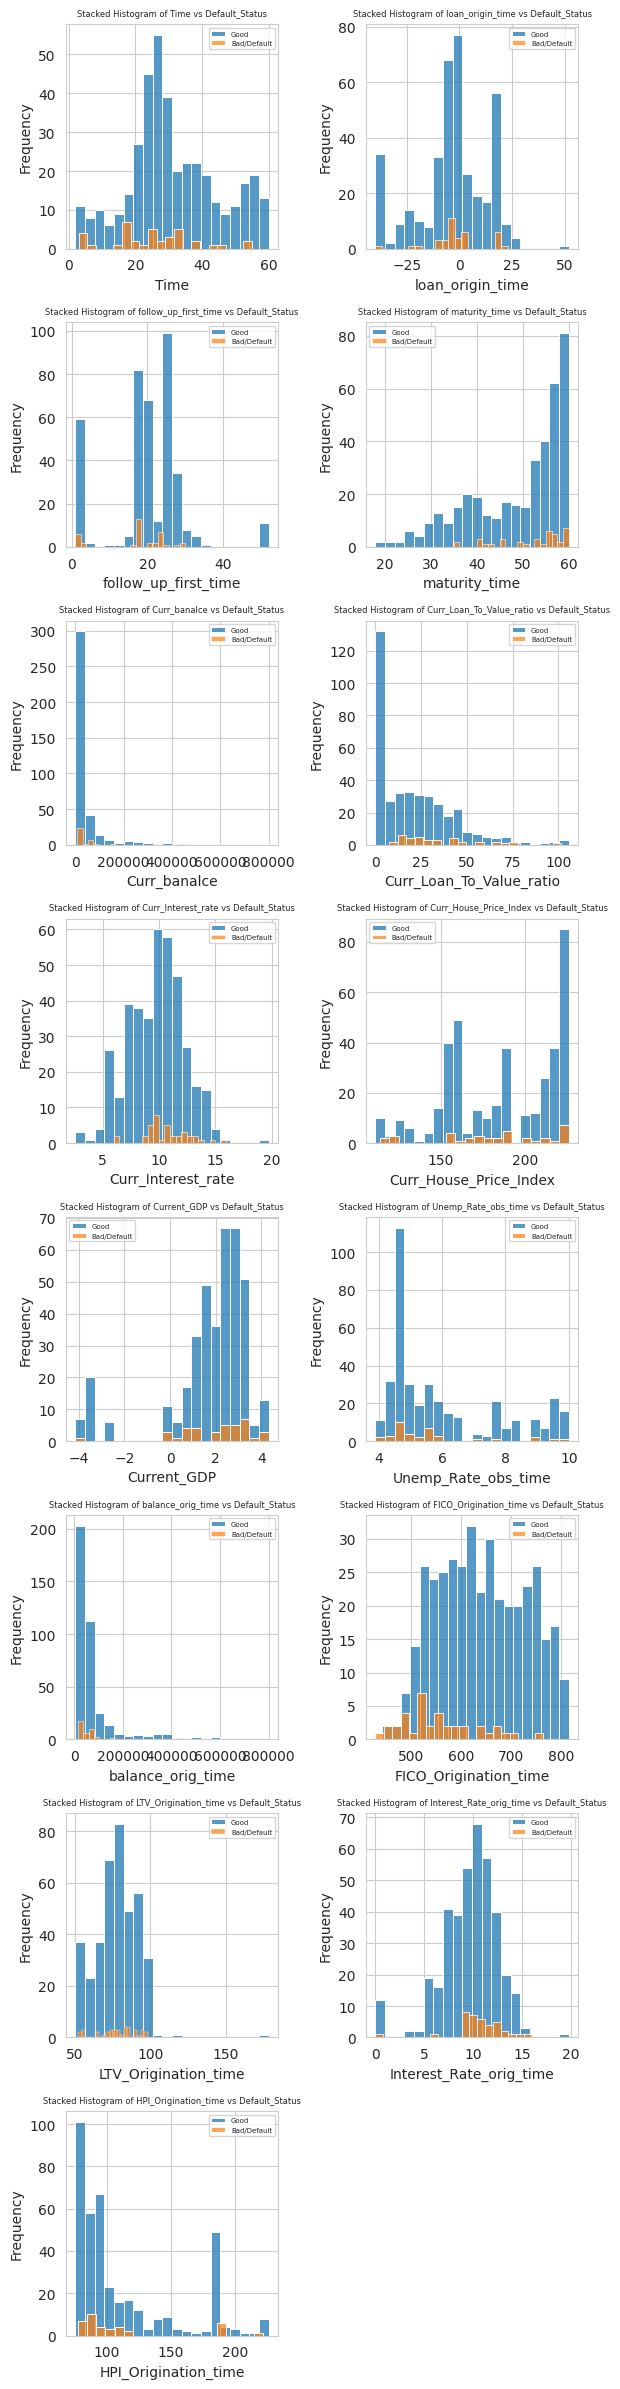

In [ ]:
fig = plot_quantitative_seaborn(last_obs_df, quantitative_vars, legend_labels)
plt.tight_layout()
fig.savefig('/content/drive/My Drive/Master_Thesis/WTTE_RNN/Picture10_final/Stacked_hist.png' ,  dpi=200)

In [ ]:
######################################################################
def plot_single_categorical_seaborn(df, var_name, legend_labels, save_path):
    ct = pd.crosstab(df[var_name], df["Default_Status"])
    ct = ct.rename(columns={0: legend_labels[0], 1: legend_labels[1]})
    fig, ax = plt.subplots(figsize=(4, 3))
    ct[legend_labels].plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])
    ax.set_title('Stacked Bar Plot of ' + var_name + ' vs Default_Status')
    ax.set_xlabel(var_name)
    ax.set_ylabel('Frequency')
    ax.legend()
    plt.tight_layout()
    fig.savefig(save_path + var_name + '_Stacked_bar.png', dpi=200)
    return fig

# To save individual plots
#for var in categorical_vars:
   # plot_single_categorical_seaborn(last_obs_df, var, legend_labels, '/content/drive/My Drive/Master_Thesis/WTTE_RNN/Picture10_final/')

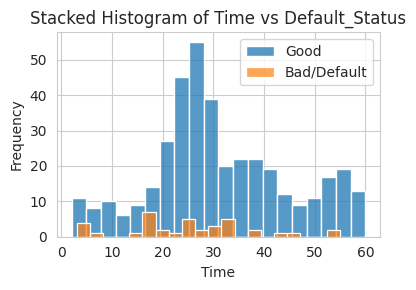

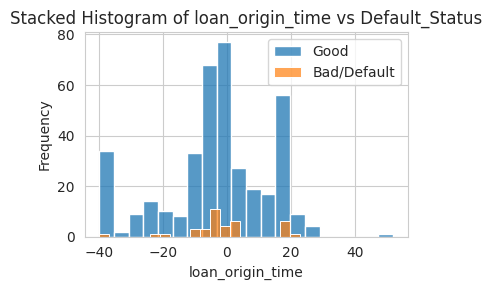

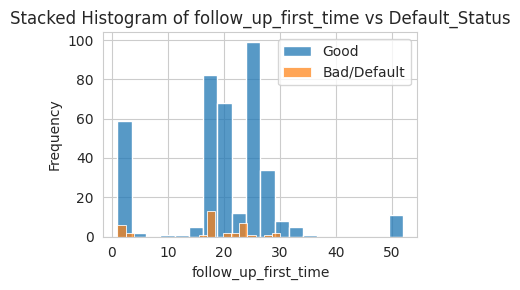

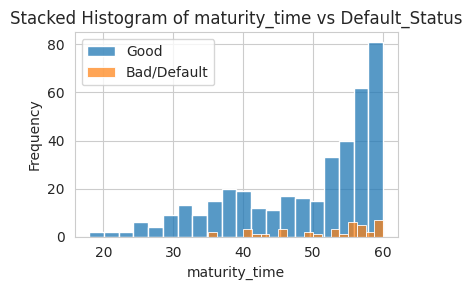

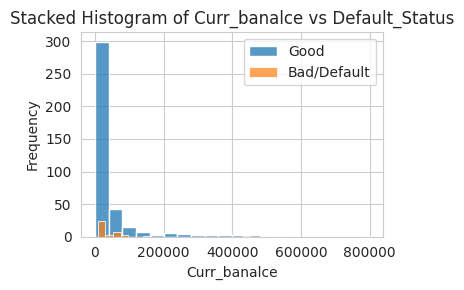

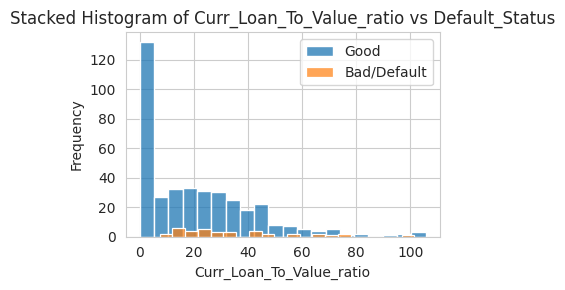

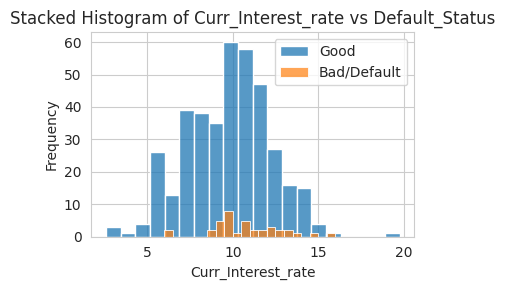

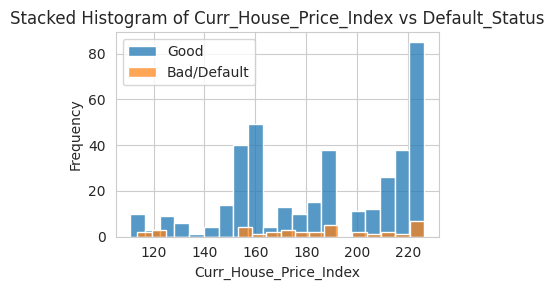

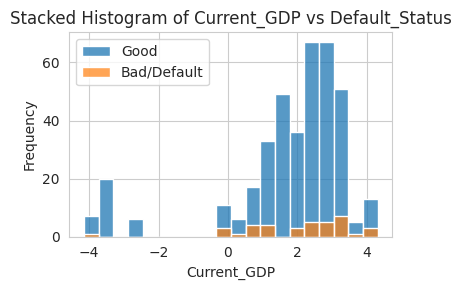

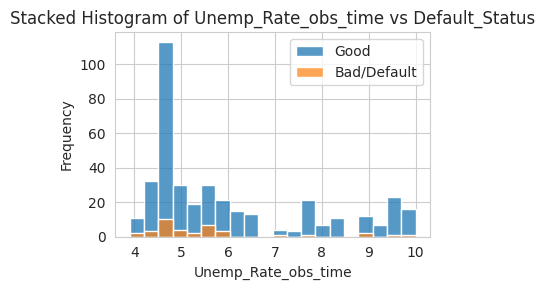

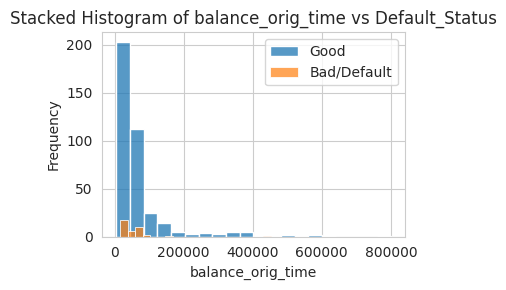

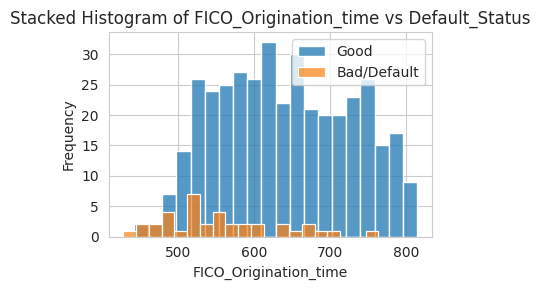

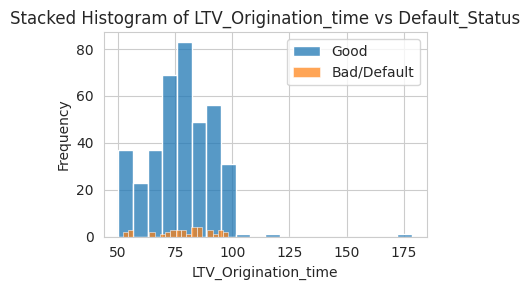

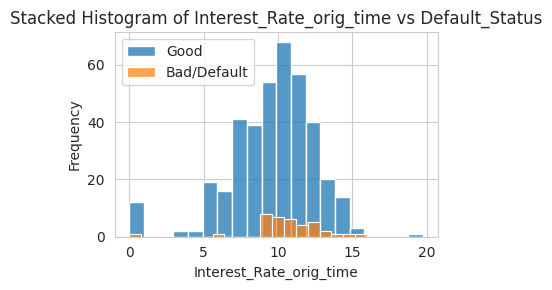

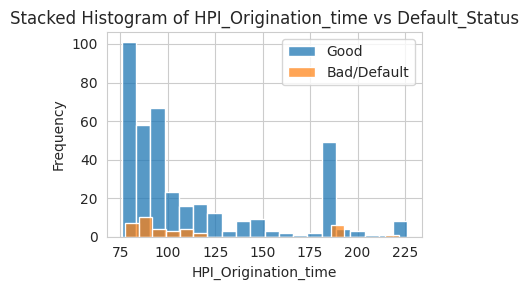

In [ ]:
def plot_single_quantitative_seaborn(df, var_name, legend_labels, save_path):
    fig, ax = plt.subplots(figsize=(4, 3))
    sns.histplot(df[df["Default_Status"]==0][var_name], kde=False, bins=20, ax=ax, label=legend_labels[0], color='#1f77b4')
    sns.histplot(df[df["Default_Status"]==1][var_name], kde=False, bins=20, ax=ax, label=legend_labels[1], color='#ff7f0e', alpha=0.7)
    ax.set_title('Stacked Histogram of ' + var_name + ' vs Default_Status')
    ax.set_xlabel(var_name)
    ax.set_ylabel('Frequency')
    ax.legend()
    plt.tight_layout()
    fig.savefig(save_path + var_name + '_Stacked_hist.png', dpi=200)
    return fig

# To save individual plots
for var in quantitative_vars:
    plot_single_quantitative_seaborn(last_obs_df, var, legend_labels, '/content/drive/My Drive/Master_Thesis/WTTE_RNN/Picture10_final/')

**Identification and Removal of Sequences with missing Time Steps**

In [ ]:
# Assuming df is your DataFrame and it has columns 'original_id' and 'time'

# Define a function to check the sequence of 'time' values for each 'original_id'
def check_sequence(group):
    group = group.sort_values()  # Sort the 'time' values in ascending order
    # Calculate the difference between each 'time' step, drop any NaN values generated by the diff() function,
    # check if all differences are equal to 1 (i.e., no missing time steps in the sequence)
    return group.diff().dropna().eq(1).all()

# Create a mask that is True for 'ids' with correct sequences (i.e., no missing time steps)
mask = df.groupby('original_id')['Time'].transform(check_sequence)

# Identify 'ids' with missing sequences (i.e., where the mask is False)
missing_sequence_ids = df.loc[~mask,'original_id'].unique()

# Print the 'ids' with missing sequences
print(missing_sequence_ids)

# After identifying the 'ids' with missing sequences, remove these 'ids' from the DataFrame
df = df[~df['original_id'].isin(missing_sequence_ids)]

[  196 10486 37385]


In [ ]:
df.head(2)

original_id  Time  loan_origin_time  follow_up_first_time  maturity_time  \
30         1255    22                19                    22             59   
31         1255    23                19                    22             59   

    Curr_banalce  Curr_Loan_To_Value_ratio  Curr_Interest_rate  \
30      38609.69                 58.813029               7.225   
31      37895.52                 56.388093               7.225   

    Curr_House_Price_Index  Current_GDP  Unemp_Rate_obs_time  \
30                  216.77     3.278796                  5.0   
31                  221.91     2.987109                  5.0   

    REtype_CO_orig_time  REtype_PU_orig_time  REtype_SF_orig_time  \
30                    0                    0                    1   
31                    0                    0                    1   

    investor_orig_time  balance_orig_time  FICO_Origination_time  \
30                   0            40000.0                    632   
31                   0            40000.0                    632   

    LTV_Origination_time  Interest_Rate_orig_time  HPI_Origination_time  \
30                  69.0                    7.225                191.42   
31                  69.0                    7.225                191.42   

    Default_Status  Current_Payoff_Status  status_time  
30               0                      0            0  
31               0                      0            0

In [ ]:
query_cols = list(df.columns)
cols_index = df.columns.get_indexer(query_cols)

columns = np.column_stack([cols_index, query_cols])
#print(query_cols)
print(columns)

[['0' 'original_id']
 ['1' 'Time']
 ['2' 'loan_origin_time']
 ['3' 'follow_up_first_time']
 ['4' 'maturity_time']
 ['5' 'Curr_banalce']
 ['6' 'Curr_Loan_To_Value_ratio']
 ['7' 'Curr_Interest_rate']
 ['8' 'Curr_House_Price_Index']
 ['9' 'Current_GDP']
 ['10' 'Unemp_Rate_obs_time']
 ['11' 'REtype_CO_orig_time']
 ['12' 'REtype_PU_orig_time']
 ['13' 'REtype_SF_orig_time']
 ['14' 'investor_orig_time']
 ['15' 'balance_orig_time']
 ['16' 'FICO_Origination_time']
 ['17' 'LTV_Origination_time']
 ['18' 'Interest_Rate_orig_time']
 ['19' 'HPI_Origination_time']
 ['20' 'Default_Status']
 ['21' 'Current_Payoff_Status']
 ['22' 'status_time']]


In [ ]:
##### Remove some variablve which are totaly irrelavant for survival analysis ####
#df = df.iloc[:, np.r_[0:2, 4, 5, 6:10, 11:14, 16:21]]
#df = df.iloc[:, np.r_[0:21]]  # We just remove 'payoff_time' and 'status_time', these feaure are out of analysis

**Inspecting Unique Values and their Frequencies in the 'maturity_time' Column**

In [ ]:
# Get and print unique values in the 'maturity_time' column
df["maturity_time"].unique()

# Count the frequency of each unique value in 'maturity_time' and sort it in ascending order by frequency
frequency = df['maturity_time'].value_counts().sort_values()

print(frequency)

# Note: The commented lines represent alternative ways to count frequency:
# 1. Sorting by the value of 'maturity_time' rather than frequency
# 2. Including NaN values in the count and sorting by the value of 'maturity_time'

# Get descriptive statistics for the 'interest_rate_time' column
# Uncomment this line if needed:
# df[["interest_rate_time"]].describe()


18      1
20      2
28      3
22      3
23      3
21      4
24      7
27     17
30     19
34     34
26     34
33     36
41     36
31     37
29     38
32     48
39     53
50     58
48     61
36     61
44     65
45     73
38     76
35     83
46     97
51    110
42    113
37    116
43    124
40    132
47    153
49    160
52    176
54    212
59    312
55    323
60    328
53    347
58    432
56    518
57    650
Name: maturity_time, dtype: int64


# **Determining Default Loan Frequencies**

In [ ]:

print("Total UNIQUE observations : ", df["original_id"].nunique())
print()

print("Total UNIQUE observations with default Status: ", df["original_id"][df["Default_Status"]==1].nunique())
print()


print("Total observations : ", df["original_id"].count())
print()

print("Percentage of default Loan: ", (df["original_id"][df["Default_Status"]==1].nunique())/(df["original_id"].nunique())*100)


Total UNIQUE observations :  422

Total UNIQUE observations with default Status:  36

Total observations :  5155

Percentage of default Loan:  8.530805687203792


**Identifying and Removing Duplicate Rows Based on Specific Features**

In [ ]:
# Specify the columns for identifying duplicates by slicing the DataFrame's column names from the third to the twentieth
cols = df.columns[2:20]

df = df.drop_duplicates(subset=cols)

duplicate_rows = df[df.duplicated(subset=cols)]

print("Duplicate Rows based on specified columns after dropping:")
print()
print(duplicate_rows)


Duplicate Rows based on specified columns after dropping:

Empty DataFrame
Columns: [original_id, Time, loan_origin_time, follow_up_first_time, maturity_time, Curr_banalce, Curr_Loan_To_Value_ratio, Curr_Interest_rate, Curr_House_Price_Index, Current_GDP, Unemp_Rate_obs_time, REtype_CO_orig_time, REtype_PU_orig_time, REtype_SF_orig_time, investor_orig_time, balance_orig_time, FICO_Origination_time, LTV_Origination_time, Interest_Rate_orig_time, HPI_Origination_time, Default_Status, Current_Payoff_Status, status_time]
Index: []


**Identification and Removal of Rows with Missing Time Sequences**

In [ ]:
# Define a function to check if a group has a correct sequence (i.e., each step in the group has a difference of 1 when sorted)
def check_sequence(group):
    group = group.sort_values()
    return group.diff().dropna().eq(1).all()

# Create a mask for ids with correct sequences in the 'Time' column
mask = df.groupby('original_id')['Time'].transform(check_sequence)

# Identify the ids with missing sequences using the mask
missing_sequence_ids = df.loc[~mask, 'original_id'].unique()

# Print the ids with missing sequences
print(missing_sequence_ids)

# Remove rows with missing sequences from the DataFrame
df = df[~df['original_id'].isin(missing_sequence_ids)]


[]


**Printing DataFrame Column names along with their Indices**

In [ ]:

# Create a list of all column names in the DataFrame
query_cols = list(df.columns)

# Get the index positions of these column names in the DataFrame
cols_index = df.columns.get_indexer(query_cols)

# Combine the indices and column names into a 2D array
columns = np.column_stack([cols_index, query_cols])

# Print the 2D array, which now contains each column's name and its corresponding index
print(columns)


[['0' 'original_id']
 ['1' 'Time']
 ['2' 'loan_origin_time']
 ['3' 'follow_up_first_time']
 ['4' 'maturity_time']
 ['5' 'Curr_banalce']
 ['6' 'Curr_Loan_To_Value_ratio']
 ['7' 'Curr_Interest_rate']
 ['8' 'Curr_House_Price_Index']
 ['9' 'Current_GDP']
 ['10' 'Unemp_Rate_obs_time']
 ['11' 'REtype_CO_orig_time']
 ['12' 'REtype_PU_orig_time']
 ['13' 'REtype_SF_orig_time']
 ['14' 'investor_orig_time']
 ['15' 'balance_orig_time']
 ['16' 'FICO_Origination_time']
 ['17' 'LTV_Origination_time']
 ['18' 'Interest_Rate_orig_time']
 ['19' 'HPI_Origination_time']
 ['20' 'Default_Status']
 ['21' 'Current_Payoff_Status']
 ['22' 'status_time']]


In [ ]:
##### checking duplicates based panel data index i.e. individual ID and Time ID ####
duplicates = df.duplicated(subset=['original_id', 'Time'])
print(df[duplicates].count())

original_id                 0
Time                        0
loan_origin_time            0
follow_up_first_time        0
maturity_time               0
Curr_banalce                0
Curr_Loan_To_Value_ratio    0
Curr_Interest_rate          0
Curr_House_Price_Index      0
Current_GDP                 0
Unemp_Rate_obs_time         0
REtype_CO_orig_time         0
REtype_PU_orig_time         0
REtype_SF_orig_time         0
investor_orig_time          0
balance_orig_time           0
FICO_Origination_time       0
LTV_Origination_time        0
Interest_Rate_orig_time     0
HPI_Origination_time        0
Default_Status              0
Current_Payoff_Status       0
status_time                 0
dtype: int64


**Removing Specific Features based on previous analysis**

In [ ]:
df.isnull().sum()
df.dropna(inplace=True)

# **Performing Under-Sampling to balance the Dataset and Rearrange it**

Panel data, or longitudinal or cross-sectional time-series data, involves measurements over time. Unlike cross-sectional data, panel data contains a temporal component, meaning the observations are usually not independent of each other due to potential temporal dependencies. This unique characteristic of panel data can make the application of traditional over-sampling techniques and Synthetic Minority Over-sampling Technique (SMOTE) challenging for the following reasons:

**Temporal Dependencies:

**Interpolation Issues:**

**Autocorrelation:**

**Independence Assumption:**

**Marginal Outliers:**





In [ ]:
# Assume df is your DataFrame and 'target' is your target variable
majority_class = df[df['Default_Status'] == 0]
minority_class = df[df['Default_Status'] == 1]

# Get the unique IDs of the entities in the minority class
minority_ids = minority_class['original_id'].unique()

# Get the unique IDs of the entities in the majority class
majority_ids = majority_class['original_id'].unique()

# Set the random seed for reproducibility
seed_value = 32  # We can choose any integer value for the seed
np.random.seed(seed_value)

# Randomly select IDs from the majority class to match the number of unique IDs in the minority class
selected_majority_ids = np.random.choice(majority_ids, size=len(minority_ids)*6, replace=False)

# Select the rows corresponding to the selected IDs
majority_class_under = majority_class[majority_class['original_id'].isin(selected_majority_ids)]

# Concatenate the minority class DataFrame with the under-sampled majority class DataFrame
df_under = pd.concat([majority_class_under, minority_class])

##############################################################################################################################

# Sorting the dataframe by 'original_id' and 'Time'
df_under.sort_values(by=['original_id', 'Time'], inplace=True)

# Creating a copy of the balanced and sorted dataframe
df = df_under.copy()


In [ ]:
######################## Check unique individuals with different criteria ################################################################

print("Total  UNIQUE observations : ", df["original_id"].nunique())
print()
print("Total UNIQUE observations  with default Status: ", df["original_id"][df["Default_Status"]==1].nunique())
print()
print("Total  observation : ", df["original_id"].count())
print()
print("Percantage of default Loan: ", (df["original_id"][df["Default_Status"]==1].nunique())/(df["original_id"].nunique())*100)

Total  UNIQUE observations :  231

Total UNIQUE observations  with default Status:  36

Total  observation :  2676

Percantage of default Loan:  15.584415584415584


**Data Visualization: Stacked Bar Plots and Stacked Histograms(after Under Sampling)**

In [ ]:
# Plotting the variables
last_obs_df = df.groupby('original_id').last().reset_index()

In [ ]:
last_obs_df.columns

Index(['original_id', 'Time', 'loan_origin_time', 'follow_up_first_time',
       'maturity_time', 'Curr_banalce', 'Curr_Loan_To_Value_ratio',
       'Curr_Interest_rate', 'Curr_House_Price_Index', 'Current_GDP',
       'Unemp_Rate_obs_time', 'REtype_CO_orig_time', 'REtype_PU_orig_time',
       'REtype_SF_orig_time', 'investor_orig_time', 'balance_orig_time',
       'FICO_Origination_time', 'LTV_Origination_time',
       'Interest_Rate_orig_time', 'HPI_Origination_time', 'Default_Status',
       'Current_Payoff_Status', 'status_time'],
      dtype='object')

In [ ]:
# Use the function to identify quantitative and qualitative variables in dataframe 'df'
quantitative_vars, categorical_vars = identify_variables(last_obs_df)

In [ ]:
print(categorical_vars)

['REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time', 'investor_orig_time', 'Current_Payoff_Status']


In [ ]:
#fig = plot_categorical_seaborn(last_obs_df, categorical_vars, legend_labels)
#plt.tight_layout()
#fig.savefig('/content/drive/My Drive/Master_Thesis/WTTE_RNN/Picture10_final/Stacked_bar_after.png' ,  dpi=200)

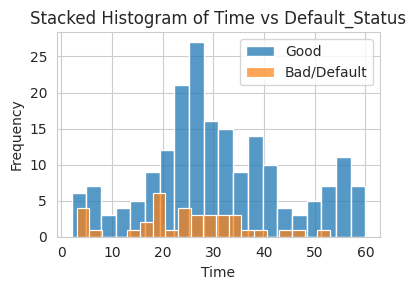

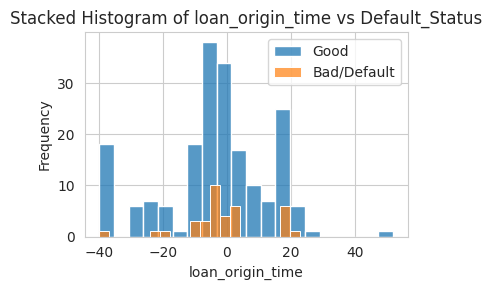

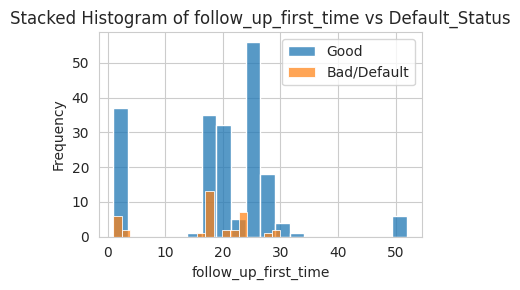

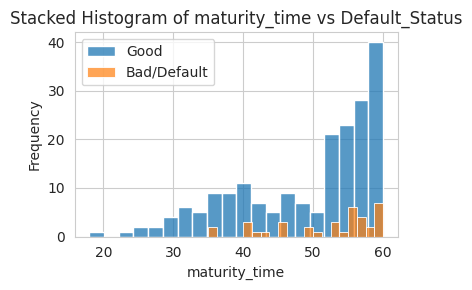

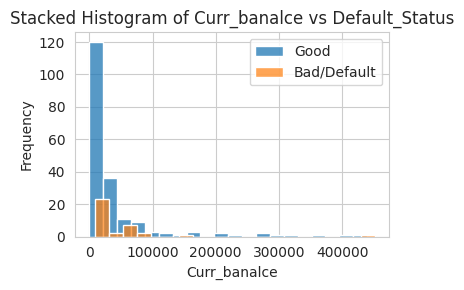

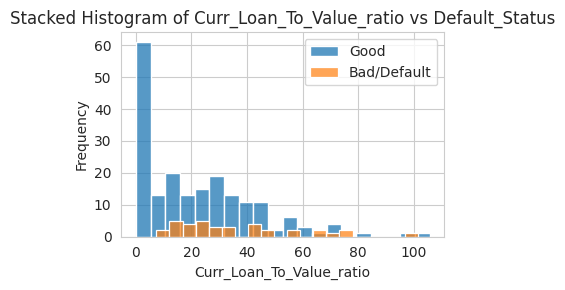

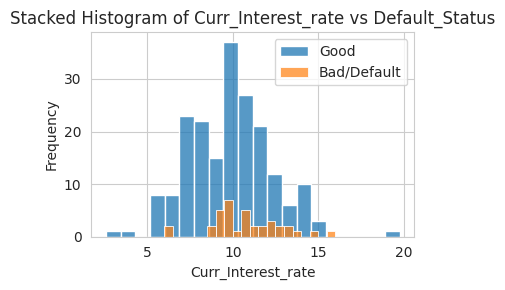

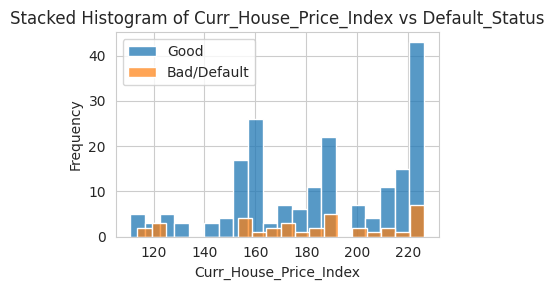

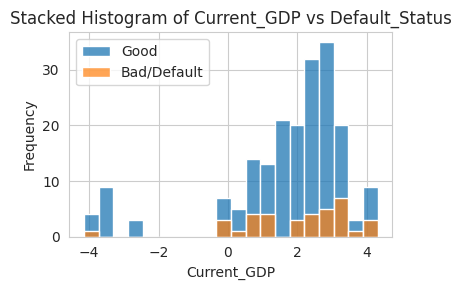

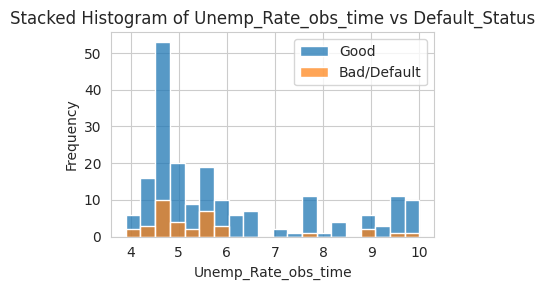

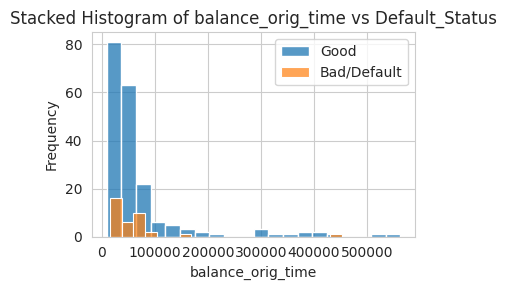

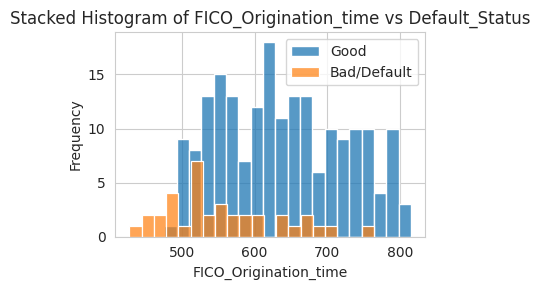

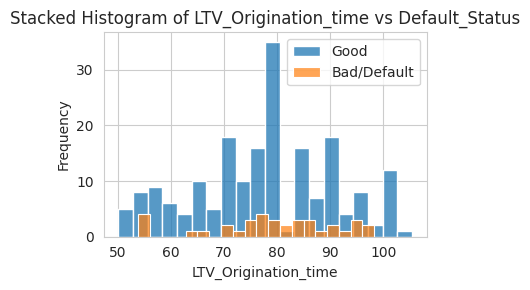

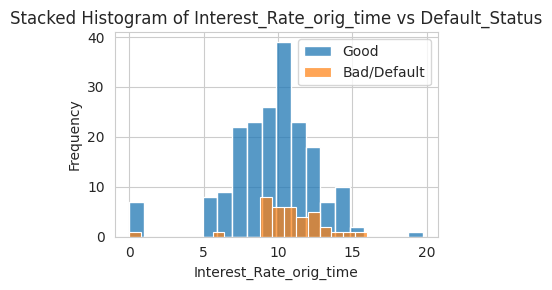

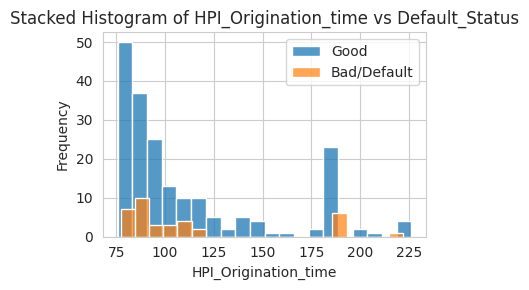

In [ ]:
def plot_single_quantitative_seaborn(df, var_name, legend_labels, save_path):
    fig, ax = plt.subplots(figsize=(4, 3))
    sns.histplot(df[df["Default_Status"]==0][var_name], kde=False, bins=20, ax=ax, label=legend_labels[0], color='#1f77b4')
    sns.histplot(df[df["Default_Status"]==1][var_name], kde=False, bins=20, ax=ax, label=legend_labels[1], color='#ff7f0e', alpha=0.7)
    ax.set_title('Stacked Histogram of ' + var_name + ' vs Default_Status')
    ax.set_xlabel(var_name)
    ax.set_ylabel('Frequency')
    ax.legend()
    plt.tight_layout()
    fig.savefig(save_path + var_name + 'after_under_Stacked_hist.png', dpi=200)
    return fig

# To save individual plots
for var in quantitative_vars:
    plot_single_quantitative_seaborn(last_obs_df, var, legend_labels, '/content/drive/My Drive/Master_Thesis/WTTE_RNN/Picture10_final/')

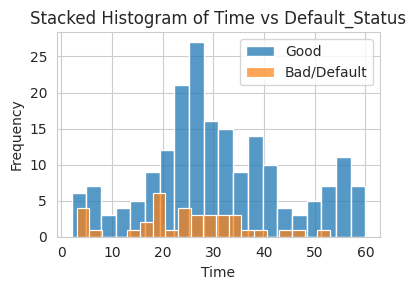

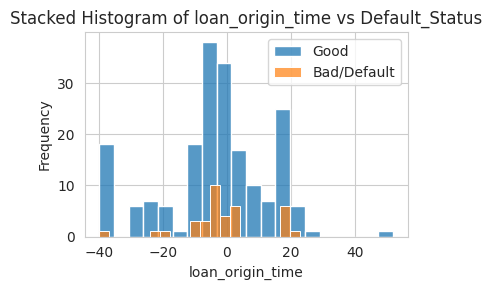

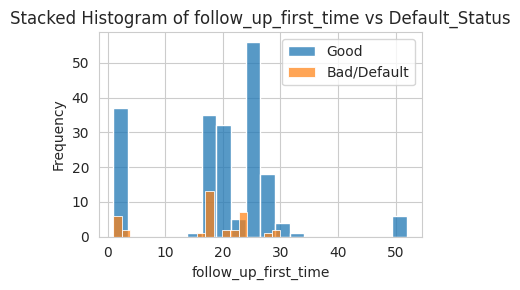

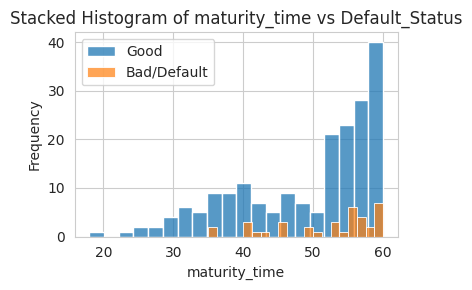

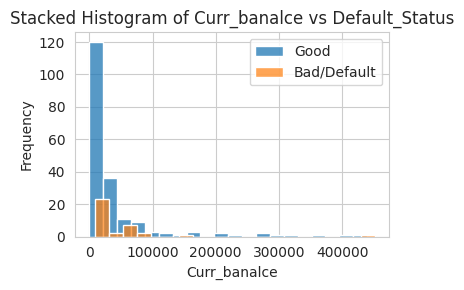

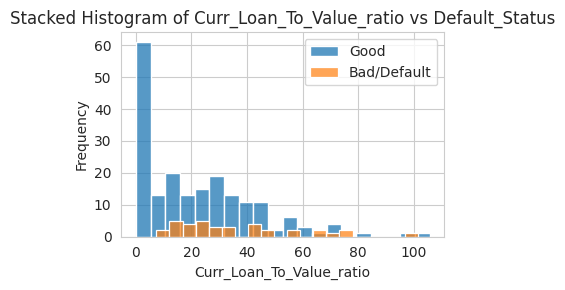

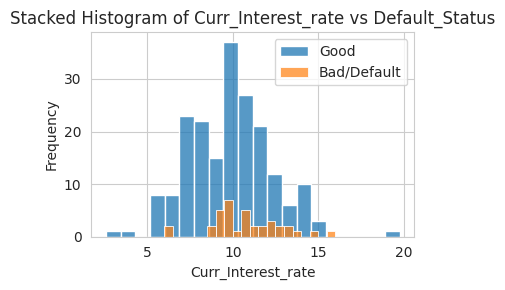

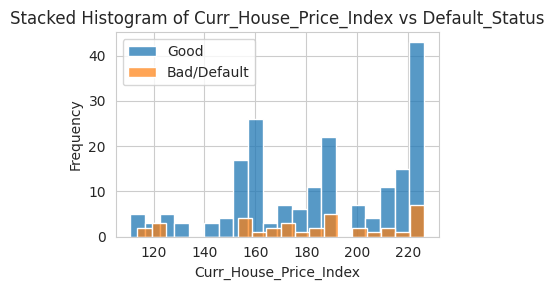

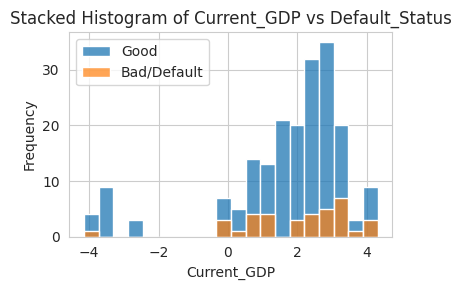

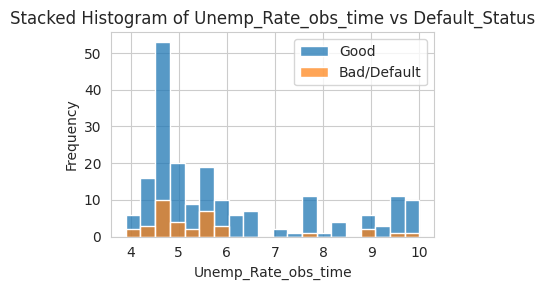

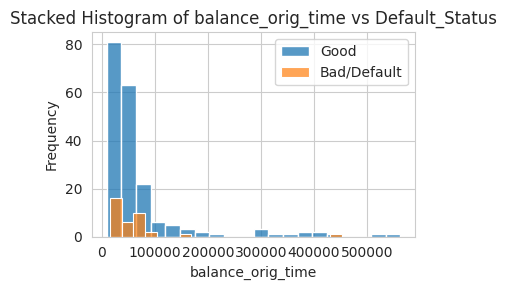

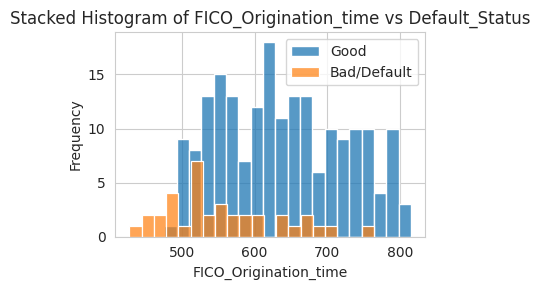

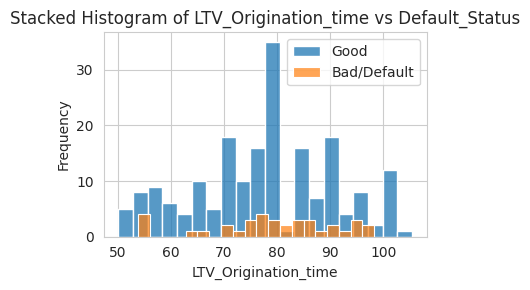

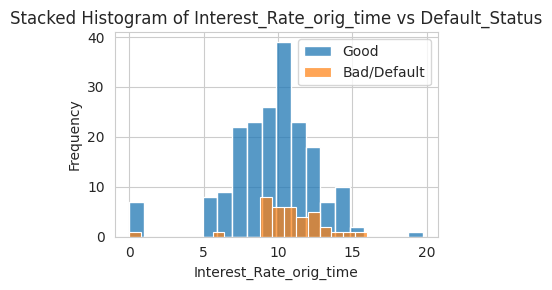

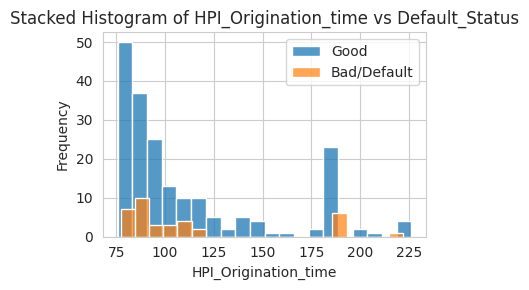

In [ ]:
# To save individual plots
for var in quantitative_vars:
    plot_single_quantitative_seaborn(last_obs_df, var, legend_labels, '/content/drive/My Drive/Master_Thesis/WTTE_RNN/Picture10_final/')

In [ ]:
######################## Check unique individuals with different criteria ################################################################

print("Total  UNIQUE observations : ", df["original_id"].nunique())
print()
print("Total UNIQUE observations  with default Status: ", df["original_id"][df["Default_Status"]==1].nunique())
print()
print("Total  observation : ", df["original_id"].count())
print()
print("Percantage of default Loan: ", (df["original_id"][df["Default_Status"]==1].nunique())/(df["original_id"].nunique())*100)


Total  UNIQUE observations :  231

Total UNIQUE observations  with default Status:  36

Total  observation :  2676

Percantage of default Loan:  15.584415584415584


In [ ]:
for column in df.columns:
    print(f"In column '{column}', the number of missing values is: {df[column].isnull().sum()}")

In column 'original_id', the number of missing values is: 0
In column 'Time', the number of missing values is: 0
In column 'loan_origin_time', the number of missing values is: 0
In column 'follow_up_first_time', the number of missing values is: 0
In column 'maturity_time', the number of missing values is: 0
In column 'Curr_banalce', the number of missing values is: 0
In column 'Curr_Loan_To_Value_ratio', the number of missing values is: 0
In column 'Curr_Interest_rate', the number of missing values is: 0
In column 'Curr_House_Price_Index', the number of missing values is: 0
In column 'Current_GDP', the number of missing values is: 0
In column 'Unemp_Rate_obs_time', the number of missing values is: 0
In column 'REtype_CO_orig_time', the number of missing values is: 0
In column 'REtype_PU_orig_time', the number of missing values is: 0
In column 'REtype_SF_orig_time', the number of missing values is: 0
In column 'investor_orig_time', the number of missing values is: 0
In column 'balance_o

# **Generating a Heatmap with Feature Correlations after Under-Sampling**

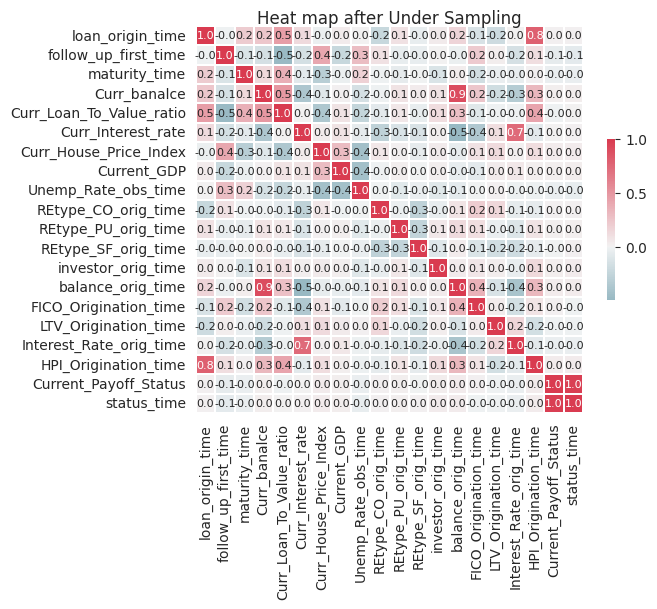

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.drop(['original_id','Time', 'Default_Status'], axis=1).corr()

# Create a heatmap
plt.figure(figsize=(7, 7))  # Adjust the size of the figure
cmap = sns.diverging_palette(220, 8, as_cmap=True)

# Plot the heatmap with adjusted font size for annotations
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap=cmap, square=True,
            cbar_kws={"shrink": .3}, linewidths=.3, center=0, annot_kws={"size": 8})

# Create a title and adjust layout
plt.title("Heat map after Under Sampling", fontsize=12, pad=2)  # Adjust title font size and padding

plt.tight_layout()

plt.savefig('/content/drive/My Drive/Master_Thesis/WTTE_RNN/Picture10_final/Heat_map.png', dpi=200)  # Save the figure to specified location with high resolution
plt.show()


In [ ]:
#sns.pairplot(df.drop(['original_id', 'Time', 'Default_Status'], axis=1))

In [ ]:
#sns.clustermap(corr_matrix, annot=True, fmt=".1f", cmap=cmap, center=0)

In [ ]:

# Create a list of all column names in the DataFrame
query_cols = list(df.columns)

# Get the index positions of these column names in the DataFrame
cols_index = df.columns.get_indexer(query_cols)

# Combine the indices and column names into a 2D array
columns = np.column_stack([cols_index, query_cols])

print(columns)

[['0' 'original_id']
 ['1' 'Time']
 ['2' 'loan_origin_time']
 ['3' 'follow_up_first_time']
 ['4' 'maturity_time']
 ['5' 'Curr_banalce']
 ['6' 'Curr_Loan_To_Value_ratio']
 ['7' 'Curr_Interest_rate']
 ['8' 'Curr_House_Price_Index']
 ['9' 'Current_GDP']
 ['10' 'Unemp_Rate_obs_time']
 ['11' 'REtype_CO_orig_time']
 ['12' 'REtype_PU_orig_time']
 ['13' 'REtype_SF_orig_time']
 ['14' 'investor_orig_time']
 ['15' 'balance_orig_time']
 ['16' 'FICO_Origination_time']
 ['17' 'LTV_Origination_time']
 ['18' 'Interest_Rate_orig_time']
 ['19' 'HPI_Origination_time']
 ['20' 'Default_Status']
 ['21' 'Current_Payoff_Status']
 ['22' 'status_time']]


In [ ]:

# Select specific columns from the DataFrame and reassign the DataFrame to these selected columns
df = df[['original_id',
'Time',
'Default_Status',
#'loan_origination_time',  # Not including this column due to negative loan origination time
'follow_up_first_time',
'maturity_time',
'Curr_banalce',
'Unemp_Rate_obs_time',
'Curr_Loan_To_Value_ratio',
'Curr_Interest_rate',
'Curr_House_Price_Index',
'Current_GDP',
#'REtype_CO_orig_time',  # Not including this column due to potential overfitting and skewed data
#'REtype_PU_orig_time',  # Not including this column due to potential data sparsity
'REtype_SF_orig_time',
'balance_orig_time',
'FICO_Origination_time',
'LTV_Origination_time',
'Interest_Rate_orig_time',
'HPI_Origination_time']]


**Removing Specific Features based on previous analysis**

In [ ]:


# Select specific columns from the DataFrame and reassign the DataFrame to these selected columns
df = df[['original_id',
'Time',
'Default_Status',
#'loan_origination_time',  # Not including this column due to negative loan origination time
'follow_up_first_time',
'maturity_time',
#'Curr_banalce',
'Unemp_Rate_obs_time',
'Curr_Loan_To_Value_ratio',
'Curr_Interest_rate',
'Curr_House_Price_Index',
'Current_GDP',
#'REtype_CO_orig_time',  # Not including this column due to potential overfitting and skewed data
#'REtype_PU_orig_time',  # Not including this column due to potential data sparsity
'REtype_SF_orig_time',
'balance_orig_time',
'FICO_Origination_time']]#,
#'LTV_Origination_time',
#'Interest_Rate_orig_time',
#'HPI_Origination_time']]


# **Calculating  Most Frequent Values (Modes)**

In [ ]:
for column in df.columns:  # Iterate through each column in the DataFrame df
    print(f"In column '{column}', the most frequent value (mode) is: {df[column].mode()[0]}")  # Print the column name and its most frequent value (mode)


In column 'original_id', the most frequent value (mode) is: 11794
In column 'Time', the most frequent value (mode) is: 25
In column 'Default_Status', the most frequent value (mode) is: 0
In column 'follow_up_first_time', the most frequent value (mode) is: 24
In column 'maturity_time', the most frequent value (mode) is: 57
In column 'Unemp_Rate_obs_time', the most frequent value (mode) is: 4.7
In column 'Curr_Loan_To_Value_ratio', the most frequent value (mode) is: 0.0
In column 'Curr_Interest_rate', the most frequent value (mode) is: 10.5
In column 'Curr_House_Price_Index', the most frequent value (mode) is: 226.29
In column 'Current_GDP', the most frequent value (mode) is: 2.8991367167
In column 'REtype_SF_orig_time', the most frequent value (mode) is: 1
In column 'balance_orig_time', the most frequent value (mode) is: 36000.0
In column 'FICO_Origination_time', the most frequent value (mode) is: 521


# **Function for Information Value (IV) and Weight of Evidence (WOE) Calculation and Visualization**

The Information Value (IV) and Weight of Evidence (WOE):

In [ ]:
def calc_and_plot_woe_iv(df, feature, target, num_bins):

    bins = np.around(np.linspace(start=df[feature].min(), stop=df[feature].max(), num=num_bins), decimals=2)

    df_bin = df[[feature, target]].copy()

    df_bin["bin"] = pd.cut(df_bin[feature], bins)


    df_grouped = df_bin.groupby("bin")[target]

    good = df_grouped.apply(lambda x: (x == 0).sum()) / (df_bin[target] == 0).sum()


    bad = df_grouped.apply(lambda x: (x == 1).sum()) / (df_bin[target] == 1).sum()


    bad += 0.000001


    df_iv = pd.DataFrame({
        "woe": np.log(good / bad),
        "IV": (good - bad) * np.log(good / bad)
    })


    df_iv = df_iv.replace({"woe": {np.inf: 0, -np.inf: 0}, "IV": {np.inf: 0, -np.inf: 0}})


    df_iv['Cumulative IV'] = df_iv['IV'].cumsum()


    df_iv.reset_index(inplace=True)
    df_iv['bin'] = df_iv['bin'].apply(lambda x: round(x.mid, 1))  # round to 1 decimal place

    fig, ax1 = plt.subplots(figsize=(5, 2.5))
    ax2 = ax1.twinx()


    df_iv.plot(x="bin", y="IV", kind="bar", color="lightblue", ax=ax1, legend=False)


    df_iv.plot(x="bin", y="Cumulative IV", color="red", ax=ax2, legend=False, secondary_y=True)


    ax1.tick_params(axis='x', rotation=90)
    ax1.set_ylabel('IV')
    ax2.set_ylabel('Cumulative IV', color='r')

    sns.set_style("whitegrid")

    plt.title('Information Value per Bin and Cumulative IV: {}'.format(feature), fontsize=8)

    plt.tight_layout()
    # Save plot to Google Drive
    plt.savefig('/content/drive/My Drive/Master_Thesis/WTTE_RNN/Picture10_final/IV_plot_for_{}.png'.format(feature), dpi=300)


    plt.show()


In [ ]:
#calc_and_plot_woe_iv(df, "maturity_time", "Default_Status", 10)

# **Function for Binning and One-hot Encoding**

In [ ]:

def bin_and_encode(df, feature, bins):

    bin_labels = [f"{feature}_Bin{i+1}" for i in range(len(bins)-1)]

    df[f'{feature}_binned'] = pd.cut(df[feature], bins=bins, labels=bin_labels)


    df = pd.get_dummies(df, columns=[f'{feature}_binned'], prefix="", prefix_sep="")

    last_dummy = df.columns[-1]
    df = df.drop(columns=[last_dummy])

    df = df.drop(columns=[feature])

    return df


# **Important Descriptive Statistical Report**

In [ ]:
# Create an empty DataFrame to store the report
report_df = pd.DataFrame()

report_df['Feature'] = df.columns
report_df['Unique_Values'] = [df[col].nunique() for col in df.columns]
report_df['Min_Values'] = [df[col].min() for col in df.columns]
report_df['Max_Values'] = [df[col].max() for col in df.columns]

# Sort the report DataFrame by the number of unique values in each feature, in descending order
report_df = report_df.sort_values('Unique_Values', ascending=False)

# Reset the index of the report DataFrame
report_df = report_df.reset_index(drop=True)

# Styling the DataFrame for better readability
report_df_styled = report_df.style.set_table_styles([
    {'selector': 'th', 'props': [('font-size', '9pt'), ('border', '1px solid black')]},
    {'selector': 'td', 'props': [('font-size', '9pt'), ('border', '1px solid black')]},
    {'selector': 'table', 'props': [('border', '1px solid black')]}
])

# Display the styled DataFrame
report_df_styled


# **Calculation and Visualization of Weight of Evidence(WoE) and Information Value(IV)**

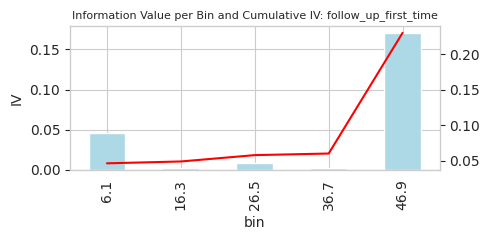

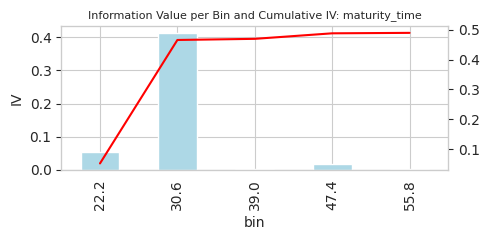

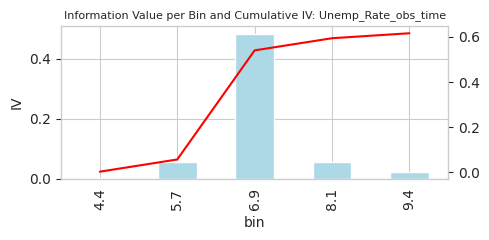

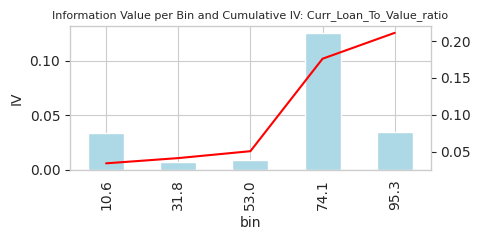

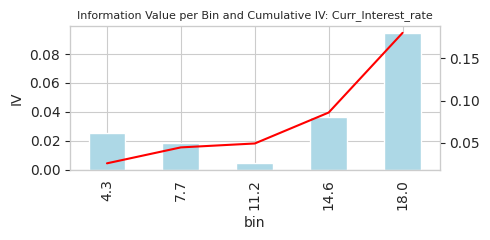

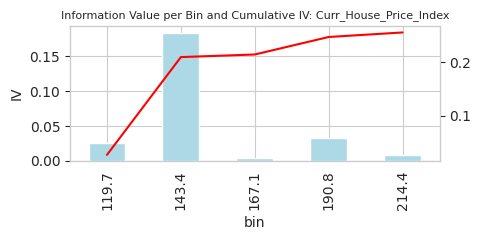

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


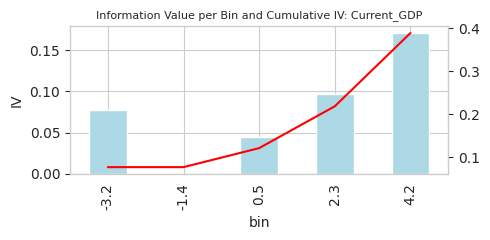

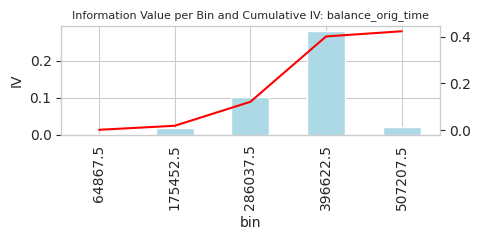

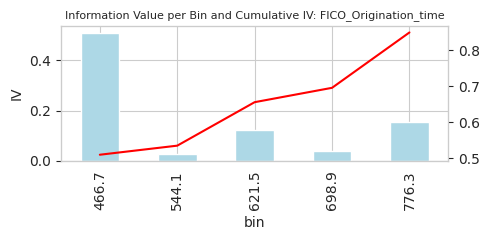

In [ ]:
df_iv =df.drop(["original_id", 'Time', 'REtype_SF_orig_time'], axis=1).copy()
# Getting all column names except 'Default_Status'
variables = [col for col in df_iv.columns if col != 'Default_Status']

# Loop over each variable
for var in variables:
    calc_and_plot_woe_iv(df_iv, var, 'Default_Status', 6)

In [ ]:
query_cols = list(df.columns)
cols_index = df.columns.get_indexer(query_cols)

columns = np.column_stack([cols_index, query_cols])
#print(query_cols)
print(columns)

[['0' 'original_id']
 ['1' 'Time']
 ['2' 'Default_Status']
 ['3' 'follow_up_first_time']
 ['4' 'maturity_time']
 ['5' 'Unemp_Rate_obs_time']
 ['6' 'Curr_Loan_To_Value_ratio']
 ['7' 'Curr_Interest_rate']
 ['8' 'Curr_House_Price_Index']
 ['9' 'Current_GDP']
 ['10' 'REtype_SF_orig_time']
 ['11' 'balance_orig_time']
 ['12' 'FICO_Origination_time']]


In [ ]:
#fjcfyguybjtyuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuddddddddddddddddddddddddddddddddddddddddddddddddddddd

# **Binning and Encoding Features based on defined Bin ranges**

In [ ]:

# Define a dictionary of variables and their respective bin ranges
var_bin_dict = {
    #'loan_origination_time': [-100, 0, 14, np.inf],
    'follow_up_first_time': [0, 15, 25, np.inf],
    'maturity_time': [0, 27, 32, np.inf],
    'Unemp_Rate_obs_time': [0, 6, 8, np.inf],
    #'Current_banalce': [0, 300000, 850000, np.inf], # Un-comment if needed


    'Curr_Loan_To_Value_ratio': [0, 55.0, 75, np.inf], # Un-comment if needed

    'balance_orig_time': [0, 222700, 354200, np.inf],
    'Curr_Interest_rate': [0, 5.0, 8.0, np.inf],
    #'Interest_Rate_at_origination_time': [0, 6.0, 13.0, np.inf], # Un-comment if needed
    #'LTV_at_origination_time': [0, 72.0, 86.0, np.inf],
    'FICO_Origination_time': [0, 540, 755, np.inf],
    #'hpi_at_origination_time': [0, 140.0, 180.0, np.inf], # Un-comment if needed
    'Current_GDP': [-100, 0, 2.5, np.inf],
    'Curr_House_Price_Index': [0, 150.0, 190.0, np.inf],
    # Add more variables and bin ranges as needed
}

# Loop over each variable and its bin range in the dictionary
for i, (var, bins) in enumerate(var_bin_dict.items(), start=1):
    print(f"Processing {var}")
    print(f"{i},{i},{i}############################################################################################################################")

    # Apply the bin_and_encode function to each feature in the DataFrame
    df = bin_and_encode(df, var, bins)

    # Print the first two rows of the last three columns of the DataFrame after binning and encoding
    print(df.iloc[:, -3:].head(2))



Processing follow_up_first_time
1,1,1############################################################################################################################
    FICO_Origination_time  follow_up_first_time_Bin1  \
64                    692                          0   
65                    692                          0   

    follow_up_first_time_Bin2  
64                          1  
65                          1  
Processing maturity_time
2,2,2############################################################################################################################
    follow_up_first_time_Bin2  maturity_time_Bin1  maturity_time_Bin2
64                          1                   0                   0
65                          1                   0                   0
Processing Unemp_Rate_obs_time
3,3,3############################################################################################################################
    maturity_time_Bin2  Unemp_Rate_obs_time_Bin

# **Calculation of Variance Inflation Factor (VIF)**

In [ ]:
df.columns

Index(['original_id', 'Time', 'Default_Status', 'REtype_SF_orig_time',
       'follow_up_first_time_Bin1', 'follow_up_first_time_Bin2',
       'maturity_time_Bin1', 'maturity_time_Bin2', 'Unemp_Rate_obs_time_Bin1',
       'Unemp_Rate_obs_time_Bin2', 'Curr_Loan_To_Value_ratio_Bin1',
       'Curr_Loan_To_Value_ratio_Bin2', 'balance_orig_time_Bin1',
       'balance_orig_time_Bin2', 'Curr_Interest_rate_Bin1',
       'Curr_Interest_rate_Bin2', 'FICO_Origination_time_Bin1',
       'FICO_Origination_time_Bin2', 'Current_GDP_Bin1', 'Current_GDP_Bin2',
       'Curr_House_Price_Index_Bin1', 'Curr_House_Price_Index_Bin2'],
      dtype='object')

In [ ]:

# Import necessary libraries for VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


df = add_constant(df)

vif = pd.DataFrame()

vif["Features"] = df.drop(['original_id', 'Time'],axis=1).columns

vif["VIF"] = [variance_inflation_factor(df.drop(['original_id', 'Time'],axis=1).values, i) for i in range(df.drop(['original_id', 'Time'],axis=1).shape[1])]

print(vif)

                         Features         VIF
0                           const  128.781385
1                  Default_Status    1.023389
2             REtype_SF_orig_time    1.103864
3       follow_up_first_time_Bin1    4.078640
4       follow_up_first_time_Bin2    2.122656
5              maturity_time_Bin1    1.022019
6              maturity_time_Bin2    1.041272
7        Unemp_Rate_obs_time_Bin1    2.858995
8        Unemp_Rate_obs_time_Bin2    1.473381
9   Curr_Loan_To_Value_ratio_Bin1    5.840234
10  Curr_Loan_To_Value_ratio_Bin2    5.760783
11         balance_orig_time_Bin1    1.636344
12         balance_orig_time_Bin2    1.435515
13        Curr_Interest_rate_Bin1    1.254435
14        Curr_Interest_rate_Bin2    1.424442
15     FICO_Origination_time_Bin1    3.793186
16     FICO_Origination_time_Bin2    3.937055
17               Current_GDP_Bin1    1.650121
18               Current_GDP_Bin2    1.332567
19    Curr_House_Price_Index_Bin1    3.606613
20    Curr_House_Price_Index_Bin2 

**Identification and Removal of Features with High Variance Inflation Factor (VIF)**

In [ ]:
# Define a list of essential features that will be kept regardless of their VIF
features_to_keep = ['original_id', 'Time', 'Default_Status']  # replace these with your actual feature names

# Identify features with VIF greater than 10, infinity, or NaN which are not in the features_to_keep list
features_to_drop = vif[((vif['VIF'] > 10) | np.isinf(vif['VIF']) | vif['VIF'].isna()) & (~vif['Features'].isin(features_to_keep))]['Features'].tolist()
print(features_to_drop)

# Drop these identified features from the main DataFrame
df = df.drop(columns=features_to_drop)



['const']


In [ ]:
query_cols = list(df.columns)
cols_index = df.columns.get_indexer(query_cols)

columns = np.column_stack([cols_index, query_cols])

print(columns)

[['0' 'original_id']
 ['1' 'Time']
 ['2' 'Default_Status']
 ['3' 'REtype_SF_orig_time']
 ['4' 'follow_up_first_time_Bin1']
 ['5' 'follow_up_first_time_Bin2']
 ['6' 'maturity_time_Bin1']
 ['7' 'maturity_time_Bin2']
 ['8' 'Unemp_Rate_obs_time_Bin1']
 ['9' 'Unemp_Rate_obs_time_Bin2']
 ['10' 'Curr_Loan_To_Value_ratio_Bin1']
 ['11' 'Curr_Loan_To_Value_ratio_Bin2']
 ['12' 'balance_orig_time_Bin1']
 ['13' 'balance_orig_time_Bin2']
 ['14' 'Curr_Interest_rate_Bin1']
 ['15' 'Curr_Interest_rate_Bin2']
 ['16' 'FICO_Origination_time_Bin1']
 ['17' 'FICO_Origination_time_Bin2']
 ['18' 'Current_GDP_Bin1']
 ['19' 'Current_GDP_Bin2']
 ['20' 'Curr_House_Price_Index_Bin1']
 ['21' 'Curr_House_Price_Index_Bin2']]


In [ ]:
df2=df.copy()
df2 = df2.drop(['original_id'], axis=1)

# **Feature Selection using Harrell's C-Index with Cox Proportional Hazards Model**

In [ ]:
# Import necessary libraries: CoxPHFitter for survival analysis,
# concordance_index for evaluation, and SelectKBest for feature selection.
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
from sklearn.feature_selection import SelectKBest

# Separate features and target from the DataFrame. Here, 'Time' and 'Default_Status' are the target variables.
features = df2.drop(['Time', 'Default_Status'], axis=1)
target = df2[['Time', 'Default_Status']]

column_names = features.columns

# Convert the DataFrame to numpy arrays for efficient computation.
features = features.values
target = target.values

# Define the Harrell's C-index function. This function takes in a dataset and its corresponding target,
# fits a Cox Proportional Hazards model for each feature, and calculates the Harrell's C-index,
# which is a measure of prediction accuracy for survival models.
def harrells_c(X, y):
    scores = []
    n_columns = X.shape[1]
    for i in range(n_columns):
        # Create a temporary DataFrame with a single feature and target variables.
        df_temp = pd.DataFrame(X[:, [i]], columns=[column_names[i]])
        df_target = pd.DataFrame(y, columns=['Time', 'Default_Status'])
        df_temp = pd.concat([df_temp, df_target], axis=1)

        # Fit a Cox Proportional Hazards model on the temporary DataFrame.
        cph = CoxPHFitter()
        cph.fit(df_temp, duration_col='Time', event_col='Default_Status')

        # Compute the Harrell's C-index and append to scores list.
        scores.append(concordance_index(df_temp['Time'], -cph.predict_partial_hazard(df_temp[[column_names[i]]]), df_temp['Default_Status']))
    return np.array(scores)

# Apply SelectKBest for feature selection, with Harrell's C-index as the score function.
selector = SelectKBest(harrells_c)
X_new = selector.fit_transform(features, target)

/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1122: ConvergenceWarning: Column maturity_time_Bin2 have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['Default_Status'].astype(bool)
>>> print(df.loc[events, 'maturity_time_Bin2'].var())
>>> print(df.loc[~events, 'maturity_time_Bin2'].var())

A very low variance means that the column maturity_time_Bin2 completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/lifelines/fitters/coxph_fitter.py:1604: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.138. This may imply non-unique solutions to the maximum likelihood. Per

# **Feature Importance Based on Harrell's C-Index Scores**

In [ ]:

# Create a DataFrame that contains feature names along with their corresponding Harrell's C-index scores.
# The Harrell's C-index score reflects the predictive power of each feature in the context of survival analysis.
feature_scores = pd.DataFrame({'Feature': column_names, 'Score': selector.scores_})

# Sort the DataFrame by Harrell's C-index scores in descending order.
# This helps to easily identify and prioritize the features that contribute the most to the prediction.
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Print the sorted DataFrame. This displays the feature names along with their corresponding Harrell's C-index scores,
# ranked from the highest to the lowest score.
print(feature_scores)


                          Feature     Score
5        Unemp_Rate_obs_time_Bin1  0.708695
13     FICO_Origination_time_Bin1  0.674189
1       follow_up_first_time_Bin1  0.645112
14     FICO_Origination_time_Bin2  0.629080
7   Curr_Loan_To_Value_ratio_Bin1  0.608709
0             REtype_SF_orig_time  0.592370
8   Curr_Loan_To_Value_ratio_Bin2  0.589903
17    Curr_House_Price_Index_Bin1  0.582712
6        Unemp_Rate_obs_time_Bin2  0.577887
15               Current_GDP_Bin1  0.572569
16               Current_GDP_Bin2  0.568816
18    Curr_House_Price_Index_Bin2  0.568663
12        Curr_Interest_rate_Bin2  0.559456
2       follow_up_first_time_Bin2  0.552597
9          balance_orig_time_Bin1  0.516585
11        Curr_Interest_rate_Bin1  0.509454
4              maturity_time_Bin2  0.509020
10         balance_orig_time_Bin2  0.504144
3              maturity_time_Bin1  0.502936


# **Identifying and Removing Features with Low Harrell's C-Index Scores**

In [ ]:

# Create a new column 'BaseFeature' by removing the "_Bin*" part from the 'Feature' column.
feature_scores['BaseFeature'] = feature_scores['Feature'].str.replace(r'_Bin\d+', '')

# Identify the base features that have a Harrell's C-index score of less than 0.45.
base_features_to_drop = feature_scores[feature_scores['Score'] < 0.45]['BaseFeature'].unique()

# Identify all the specific binned features to be dropped.
features_to_drop = feature_scores[feature_scores['BaseFeature'].isin(base_features_to_drop)]['Feature'].tolist()

# Remove the identified low-impact features from the feature_scores DataFrame.
# Now, the DataFrame only contains high-impact features, i.e., those with a Harrell's C-index score of 0.45 or more.
feature_scores = feature_scores[~feature_scores['Feature'].isin(features_to_drop)]

print(feature_scores[["Feature", "Score"]])


                          Feature     Score
5        Unemp_Rate_obs_time_Bin1  0.708695
13     FICO_Origination_time_Bin1  0.674189
1       follow_up_first_time_Bin1  0.645112
14     FICO_Origination_time_Bin2  0.629080
7   Curr_Loan_To_Value_ratio_Bin1  0.608709
0             REtype_SF_orig_time  0.592370
8   Curr_Loan_To_Value_ratio_Bin2  0.589903
17    Curr_House_Price_Index_Bin1  0.582712
6        Unemp_Rate_obs_time_Bin2  0.577887
15               Current_GDP_Bin1  0.572569
16               Current_GDP_Bin2  0.568816
18    Curr_House_Price_Index_Bin2  0.568663
12        Curr_Interest_rate_Bin2  0.559456
2       follow_up_first_time_Bin2  0.552597
9          balance_orig_time_Bin1  0.516585
11        Curr_Interest_rate_Bin1  0.509454
4              maturity_time_Bin2  0.509020
10         balance_orig_time_Bin2  0.504144
3              maturity_time_Bin1  0.502936


<ipython-input-230-e2a3abbbfdaa>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  feature_scores['BaseFeature'] = feature_scores['Feature'].str.replace(r'_Bin\d+', '')


# **Selecting Feature set and model combintion for Models Developing purposes**

In [ ]:

# Prepare a list of remaining features after removing the low-impact ones.

remaining_cols = [col for col in feature_scores['Feature'] if col not in features_to_drop]


cols_index1 = [feature_scores.index[feature_scores['Feature'] == c][0] for c in remaining_cols]

# Get two subsets of these indices by removing the last two and last five indices, respectively.

cols_index2 = cols_index1[:-2]
cols_index3 = cols_index2[:-3]

print(cols_index1)
print(cols_index2)
print(cols_index3)

# Print the DataFrame with the remaining high-impact features and their Harrell's C-index scores.
print(feature_scores[["Feature", "Score"]])


[5, 13, 1, 14, 7, 0, 8, 17, 6, 15, 16, 18, 12, 2, 9, 11, 4, 10, 3]
[5, 13, 1, 14, 7, 0, 8, 17, 6, 15, 16, 18, 12, 2, 9, 11, 4]
[5, 13, 1, 14, 7, 0, 8, 17, 6, 15, 16, 18, 12, 2]
                          Feature     Score
5        Unemp_Rate_obs_time_Bin1  0.708695
13     FICO_Origination_time_Bin1  0.674189
1       follow_up_first_time_Bin1  0.645112
14     FICO_Origination_time_Bin2  0.629080
7   Curr_Loan_To_Value_ratio_Bin1  0.608709
0             REtype_SF_orig_time  0.592370
8   Curr_Loan_To_Value_ratio_Bin2  0.589903
17    Curr_House_Price_Index_Bin1  0.582712
6        Unemp_Rate_obs_time_Bin2  0.577887
15               Current_GDP_Bin1  0.572569
16               Current_GDP_Bin2  0.568816
18    Curr_House_Price_Index_Bin2  0.568663
12        Curr_Interest_rate_Bin2  0.559456
2       follow_up_first_time_Bin2  0.552597
9          balance_orig_time_Bin1  0.516585
11        Curr_Interest_rate_Bin1  0.509454
4              maturity_time_Bin2  0.509020
10         balance_orig_time_Bi

# **Visual Representations of Event Time Distributions Segmented by Default Status**

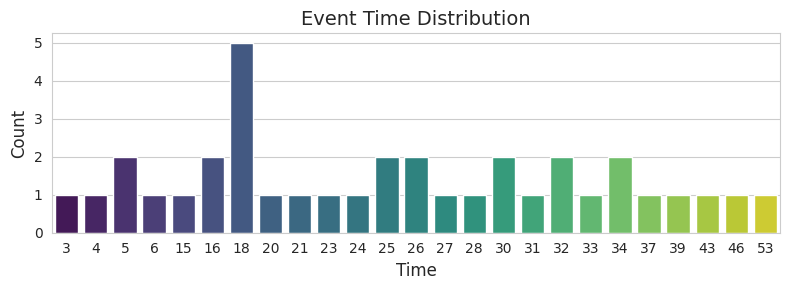

In [ ]:

# Import necessary libraries. Seaborn is used for advanced data visualization,

import seaborn as sns
import matplotlib.pyplot as plt

# Create a new figure with a specified size (15 units wide, 3 units tall)

plt.figure(figsize=(8, 3))

# Set the Seaborn style to "whitegrid" to provide a grid for reference in the plot.
sns.set_style("whitegrid")

# Create a count plot using seaborn. This plot will show the distribution of event times for default status.

sns.countplot(x="Time", data=df[df['Default_Status']==1], palette="viridis")

# Add labels to the x-axis and y-axis and a title to the plot to provide context.
plt.xlabel("Time", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Event Time Distribution", fontsize=14)

# Adjust the layout of the plot so that all elements fit within the figure area.
plt.tight_layout()

plt.savefig('/content/drive/My Drive/Master_Thesis/WTTE_RNN/Picture10_final/Even_Time_Distribution.png', dpi=200)

plt.show()



**Checking for Null Values and Duplicates**

In [ ]:
# Use the isna() function to check for missing or NaN values in the DataFrame 'df'.

print('Null Values:', df.isna().sum(),'\n')

print()

# Check for duplicate rows in the DataFrame 'df' using the duplicated() function.

print('Duplicated:', df.duplicated().sum())


Null Values: original_id                      0
Time                             0
Default_Status                   0
REtype_SF_orig_time              0
follow_up_first_time_Bin1        0
follow_up_first_time_Bin2        0
maturity_time_Bin1               0
maturity_time_Bin2               0
Unemp_Rate_obs_time_Bin1         0
Unemp_Rate_obs_time_Bin2         0
Curr_Loan_To_Value_ratio_Bin1    0
Curr_Loan_To_Value_ratio_Bin2    0
balance_orig_time_Bin1           0
balance_orig_time_Bin2           0
Curr_Interest_rate_Bin1          0
Curr_Interest_rate_Bin2          0
FICO_Origination_time_Bin1       0
FICO_Origination_time_Bin2       0
Current_GDP_Bin1                 0
Current_GDP_Bin2                 0
Curr_House_Price_Index_Bin1      0
Curr_House_Price_Index_Bin2      0
dtype: int64 


Duplicated: 0


In [ ]:
######################## Check unique individuals with different criteria ################################################################

print("Total  UNIQUE observations : ", df["original_id"].nunique())
print()
print("Total UNIQUE observations  with default Status: ", df["original_id"][df["Default_Status"]==1].nunique())
print()
print("Total  observation : ", df["original_id"].count())
print()
print("Percantage of default Loan: ", (df["original_id"][df["Default_Status"]==1].nunique())/(df["original_id"].nunique())*100)

Total  UNIQUE observations :  231

Total UNIQUE observations  with default Status:  36

Total  observation :  2676

Percantage of default Loan:  15.584415584415584


## **Special Data Splting for Panel Data for Training and Validation**

GroupShuffleSplit is a function in the sklearn library that provides randomized train/test indices to split data according to a third-party provided group. This is particularly useful for panel data or time-series data, where data observations are often clustered or grouped by an entity (e.g., individual, company, country).






In [ ]:

# Import necessary libraries. GroupShuffleSplit is used for creating training and testing splits in a way that respects group boundaries.
from sklearn.model_selection import GroupShuffleSplit

# Define the GroupShuffleSplit object. This will create 9 splits of the data with a test size of approximately 11.11%.

gss = GroupShuffleSplit(n_splits=9, test_size=0.11111, random_state=16)

# Assuming 'df' is your DataFrame, separate features (X) and target (y) variables.

X = df.drop(['Time', 'Default_Status'], axis=1)
y = df[['Time', 'Default_Status']]
groups = df['original_id']

# Initialize lists to save the split train and test datasets.
train_data_list = []
test_data_list = []

# Define a fixed value to set 'Time' in the test data.
fixed_value = 60  # replace with your value

# Use GroupShuffleSplit to split the data in a way that respects the panel structure, then combine and save the train and test data.

for train_inds, test_inds in gss.split(X, y, groups):
    X_train, X_test = X.iloc[train_inds], X.iloc[test_inds]
    y_train, y_test = y.iloc[train_inds], y.iloc[test_inds]

    train_data = pd.concat([X_train, y_train], axis=1)
    test_data = pd.concat([X_test, y_test], axis=1)

    test_data['Time'] = fixed_value

    train_data_list.append(train_data)
    test_data_list.append(test_data)

# Sort datasets by 'original_id' and 'Time'. This is crucial for panel data analysis to respect the individual and time dimensions.

for i in range(len(train_data_list)):
    train_data_list[i] = train_data_list[i].sort_values(['original_id', 'Time'])
    print(f"Train_data_list_{i} shape",train_data_list[i].shape)
    print(f"Train_data_list_{i} Unique individuals",len(train_data_list[i].iloc[:,0].unique()))

    test_data_list[i] = test_data_list[i].sort_values(['original_id', 'Time'])
    print(f"Test_data_list_{i} Unique individuals",len(test_data_list[i].iloc[:,0].unique()))

# Adjust the size of each dataset to be a multiple of 5. This might be necessary for certain model training requirements.
#for i in range(len(train_data_list)):
   # train_data_list[i] = train_data_list[i].iloc[:len(train_data_list[i])-len(train_data_list[i]) % 5]
   # test_data_list[i] = test_data_list[i].iloc[:len(test_data_list[i])-len(test_data_list[i]) % 5]

Train_data_list_0 shape (2413, 22)
Train_data_list_0 Unique individuals 205
Test_data_list_0 Unique individuals 26
Train_data_list_1 shape (2447, 22)
Train_data_list_1 Unique individuals 205
Test_data_list_1 Unique individuals 26
Train_data_list_2 shape (2377, 22)
Train_data_list_2 Unique individuals 205
Test_data_list_2 Unique individuals 26
Train_data_list_3 shape (2409, 22)
Train_data_list_3 Unique individuals 205
Test_data_list_3 Unique individuals 26
Train_data_list_4 shape (2414, 22)
Train_data_list_4 Unique individuals 205
Test_data_list_4 Unique individuals 26
Train_data_list_5 shape (2405, 22)
Train_data_list_5 Unique individuals 205
Test_data_list_5 Unique individuals 26
Train_data_list_6 shape (2401, 22)
Train_data_list_6 Unique individuals 205
Test_data_list_6 Unique individuals 26
Train_data_list_7 shape (2390, 22)
Train_data_list_7 Unique individuals 205
Test_data_list_7 Unique individuals 26
Train_data_list_8 shape (2409, 22)
Train_data_list_8 Unique individuals 205
Test

In [ ]:
query_cols = list(X_train.columns)
cols_index = X_train.columns.get_indexer(query_cols)
columns = np.column_stack([cols_index, query_cols])

print(columns)


[['0' 'original_id']
 ['1' 'REtype_SF_orig_time']
 ['2' 'follow_up_first_time_Bin1']
 ['3' 'follow_up_first_time_Bin2']
 ['4' 'maturity_time_Bin1']
 ['5' 'maturity_time_Bin2']
 ['6' 'Unemp_Rate_obs_time_Bin1']
 ['7' 'Unemp_Rate_obs_time_Bin2']
 ['8' 'Curr_Loan_To_Value_ratio_Bin1']
 ['9' 'Curr_Loan_To_Value_ratio_Bin2']
 ['10' 'balance_orig_time_Bin1']
 ['11' 'balance_orig_time_Bin2']
 ['12' 'Curr_Interest_rate_Bin1']
 ['13' 'Curr_Interest_rate_Bin2']
 ['14' 'FICO_Origination_time_Bin1']
 ['15' 'FICO_Origination_time_Bin2']
 ['16' 'Current_GDP_Bin1']
 ['17' 'Current_GDP_Bin2']
 ['18' 'Curr_House_Price_Index_Bin1']
 ['19' 'Curr_House_Price_Index_Bin2']]


# **Constructing Time Ordered Data Sequences for Each Customer usig Time Steps**

* Data preprocessing: 2D data transform into 3D to fit:  "Weibull Time to Event- RNN" model( WTTE-RNN ))



In [ ]:

# Import the tqdm library, which allows us to display a progress bar during loops.
from tqdm import tqdm

#  data_2D_to_3D is defined to preprocess panel data into sequences suitable for survival analysis.

def data_2D_to_3D(customer, time_to_event, x, y, max_time, max_sequences, is_test, mask_value, step_size):
    # Initialize empty lists to store the sequential feature and target data for all customers.
    out_y = []
    out_x = []

    # Determine the number of features (d) from the shape of the input feature matrix (x).
    d = x.shape[1]

    # Extract the unique customer identifiers from the input customer data.
    unique_customers = np.unique(customer)

    # For each unique customer, we will build sequences of data.
    for i in tqdm(unique_customers):

        actual_max_time = int(np.max(time_to_event[customer == i])) + 1

        this_x = []
        this_y = []

        # Create sequences for this customer up to the maximum number of sequences specified.
        for j in range(max_sequences):
            # Determine the sequence length for this sequence, which is the smaller of the step size multiplied by the sequence number (plus 1),
            seq_length = min(step_size * (j + 1), actual_max_time)

            customer_x = x[customer == i]
            customer_y = y[customer == i]

            # Initialize temporary arrays with the shape of the maximum sequence length and number of features/targets,
            # and fill them with the mask value.
            xtemp = np.full((1, max_time, d), mask_value)
            ytemp = np.full((1, max_time, 2), mask_value)

            # Extract the feature and target data for this sequence up to the sequence length.
            x_sub = customer_x[:seq_length, :]
            y_sub = customer_y[:seq_length, :]

            # Place the extracted data into the appropriate location in the temporary arrays,
            xtemp[:, max_time-x_sub.shape[0]:max_time, :] = x_sub
            ytemp[:, max_time-y_sub.shape[0]:max_time, :] = y_sub

            # Append the temporary arrays to the lists for this customer.
            this_x.append(xtemp)
            this_y.append(ytemp)

        # If the lists for this customer are not empty, concatenate the data along the first dimension

        if this_x and this_y:
            this_x = np.concatenate(this_x)
            this_y = np.concatenate(this_y)
            out_x.append(this_x)
            out_y.append(this_y)

    # If the lists for all customers are not empty, concatenate the data along the first dimension.

    if out_x and out_y:
        out_x = np.concatenate(out_x)
        out_y = np.concatenate(out_y)
    else:
        out_x = np.array([])
        out_y = np.array([])

    # Return the final feature and target arrays, which are suitable for input to a survival analysis model.
    return out_x, out_y

# **Pre-Processing Panel Data Sequences for Training and Validating using the above function**


* The following code preprocesses the training and testing datasets for panel data analysis. It begins by defining parameters such as the maximum time sequence, the mask value for padding, and the step size for building sequences. It then calculates the maximum number of sequences that can be formed from the data.


In [ ]:

# Define the maximum time sequence, the mask value for padding, and the step size for building sequences.
# Calculate the maximum number of sequences by dividing the maximum time by the step size.
max_time= 60
mask_value = 0
step_size = 6
max_sequences = max_time//step_size

print(f'Maximum Sequences: ',max_sequences,"\n")

# Initialize lists to store the processed training feature and target data.
train_x_list, train_y_list = [], []

# Loop over each DataFrame in the list of training data.
for train_data in train_data_list:
    # Extract the customer IDs, times to event, features (x), and targets (y) from the DataFrame.
    customer = train_data['original_id'].values
    time_to_event = train_data['Time'].values
    x = train_data.drop(['Time', 'Default_Status', 'original_id'], axis=1).values
    y = train_data[['Time', 'Default_Status']].values

    # Use the data_2D_to_3D function defined earlier to preprocess the data into sequences.
    train_x, train_y = data_2D_to_3D(customer=customer, time_to_event=time_to_event, x=x, y=y, max_time = max_time, max_sequences = max_sequences, is_test=False, mask_value = mask_value, step_size = step_size)

    # Cast the processed data to the float32 data type.
    train_x = train_x.astype(np.float32)
    train_y = train_y.astype(np.float32)

    print('Shape of train_x just after processing:', train_x.shape)

    # Create a dictionary of the processed data and check each array for NaN and infinite values.
    data_dict = {'train_x': train_x, 'train_y': train_y}
    for name, data in data_dict.items():
        print(f"NaN values in {name}:", np.isnan(data).any())
        print(f"Inf values in {name}:", np.isinf(data).any())

    # Append the processed data to the lists.
    train_x_list.append(train_x)
    train_y_list.append(train_y)

# Initialize lists to store the processed testing feature and target data.
test_x_list, test_y_list = [], []

# Repeat the above process for each DataFrame in the list of testing data.
for test_data in test_data_list:
    customer = test_data['original_id'].values
    time_to_event = test_data['Time'].values
    x = test_data.drop(['Time', 'Default_Status', 'original_id'], axis=1).values
    y = test_data[['Time', 'Default_Status']].values
    test_x, test_y = data_2D_to_3D(customer=customer, time_to_event=time_to_event, x=x, y=y, max_time = max_time, max_sequences = max_sequences, is_test=False, mask_value = mask_value, step_size = step_size)
    test_x = test_x.astype(np.float32)
    test_y = test_y.astype(np.float32)
    print('Shape of test_x just after processing:', test_x.shape)

    data_dict = {'test_x': test_x, 'test_y': test_y}
    for name, data in data_dict.items():
        print(f"NaN values in {name}:", np.isnan(data).any())
        print(f"Inf values in {name}:", np.isinf(data).any())

    test_x_list.append(test_x)
    test_y_list.append(test_y)

Maximum Sequences:  10 



100%|██████████| 205/205 [00:00<00:00, 2726.55it/s]


Shape of train_x just after processing: (2050, 60, 19)
NaN values in train_x: False
Inf values in train_x: False
NaN values in train_y: False
Inf values in train_y: False


100%|██████████| 205/205 [00:00<00:00, 2761.57it/s]


Shape of train_x just after processing: (2050, 60, 19)
NaN values in train_x: False
Inf values in train_x: False
NaN values in train_y: False
Inf values in train_y: False


100%|██████████| 205/205 [00:00<00:00, 2757.06it/s]


Shape of train_x just after processing: (2050, 60, 19)
NaN values in train_x: False
Inf values in train_x: False
NaN values in train_y: False
Inf values in train_y: False


100%|██████████| 205/205 [00:00<00:00, 2841.85it/s]


Shape of train_x just after processing: (2050, 60, 19)
NaN values in train_x: False
Inf values in train_x: False
NaN values in train_y: False
Inf values in train_y: False


100%|██████████| 205/205 [00:00<00:00, 2743.54it/s]


Shape of train_x just after processing: (2050, 60, 19)
NaN values in train_x: False
Inf values in train_x: False
NaN values in train_y: False
Inf values in train_y: False


100%|██████████| 205/205 [00:00<00:00, 2744.32it/s]


Shape of train_x just after processing: (2050, 60, 19)
NaN values in train_x: False
Inf values in train_x: False
NaN values in train_y: False
Inf values in train_y: False


100%|██████████| 205/205 [00:00<00:00, 2749.59it/s]


Shape of train_x just after processing: (2050, 60, 19)
NaN values in train_x: False
Inf values in train_x: False
NaN values in train_y: False
Inf values in train_y: False


100%|██████████| 205/205 [00:00<00:00, 2870.96it/s]


Shape of train_x just after processing: (2050, 60, 19)
NaN values in train_x: False
Inf values in train_x: False
NaN values in train_y: False
Inf values in train_y: False


100%|██████████| 205/205 [00:00<00:00, 2826.62it/s]


Shape of train_x just after processing: (2050, 60, 19)
NaN values in train_x: False
Inf values in train_x: False
NaN values in train_y: False
Inf values in train_y: False


100%|██████████| 26/26 [00:00<00:00, 3202.79it/s]


Shape of test_x just after processing: (260, 60, 19)
NaN values in test_x: False
Inf values in test_x: False
NaN values in test_y: False
Inf values in test_y: False


100%|██████████| 26/26 [00:00<00:00, 3426.93it/s]


Shape of test_x just after processing: (260, 60, 19)
NaN values in test_x: False
Inf values in test_x: False
NaN values in test_y: False
Inf values in test_y: False


100%|██████████| 26/26 [00:00<00:00, 3001.62it/s]


Shape of test_x just after processing: (260, 60, 19)
NaN values in test_x: False
Inf values in test_x: False
NaN values in test_y: False
Inf values in test_y: False


100%|██████████| 26/26 [00:00<00:00, 2440.95it/s]


Shape of test_x just after processing: (260, 60, 19)
NaN values in test_x: False
Inf values in test_x: False
NaN values in test_y: False
Inf values in test_y: False


100%|██████████| 26/26 [00:00<00:00, 3089.38it/s]


Shape of test_x just after processing: (260, 60, 19)
NaN values in test_x: False
Inf values in test_x: False
NaN values in test_y: False
Inf values in test_y: False


100%|██████████| 26/26 [00:00<00:00, 3114.08it/s]


Shape of test_x just after processing: (260, 60, 19)
NaN values in test_x: False
Inf values in test_x: False
NaN values in test_y: False
Inf values in test_y: False


100%|██████████| 26/26 [00:00<00:00, 3575.71it/s]


Shape of test_x just after processing: (260, 60, 19)
NaN values in test_x: False
Inf values in test_x: False
NaN values in test_y: False
Inf values in test_y: False


100%|██████████| 26/26 [00:00<00:00, 3570.32it/s]


Shape of test_x just after processing: (260, 60, 19)
NaN values in test_x: False
Inf values in test_x: False
NaN values in test_y: False
Inf values in test_y: False


100%|██████████| 26/26 [00:00<00:00, 3415.88it/s]

Shape of test_x just after processing: (260, 60, 19)
NaN values in test_x: False
Inf values in test_x: False
NaN values in test_y: False
Inf values in test_y: False


In [ ]:
def print_3d_array(arr):
    for i in range(arr.shape[0]):
        print("Slice", i)
        print(arr[i])
        print()



In [ ]:
print(test_data_list[1].count())

original_id                      229
REtype_SF_orig_time              229
follow_up_first_time_Bin1        229
follow_up_first_time_Bin2        229
maturity_time_Bin1               229
maturity_time_Bin2               229
Unemp_Rate_obs_time_Bin1         229
Unemp_Rate_obs_time_Bin2         229
Curr_Loan_To_Value_ratio_Bin1    229
Curr_Loan_To_Value_ratio_Bin2    229
balance_orig_time_Bin1           229
balance_orig_time_Bin2           229
Curr_Interest_rate_Bin1          229
Curr_Interest_rate_Bin2          229
FICO_Origination_time_Bin1       229
FICO_Origination_time_Bin2       229
Current_GDP_Bin1                 229
Current_GDP_Bin2                 229
Curr_House_Price_Index_Bin1      229
Curr_House_Price_Index_Bin2      229
Time                             229
Default_Status                   229
dtype: int64


In [ ]:
np.set_printoptions(threshold=np.inf)
#print(train_x)

# **Setting Seed for Reproducibility and Clearing Previous TensorFlow/Keras Session**

In [ ]:
# Set the seed for numpy's random number generator. This ensures that any process that uses numpy's random number generator

np.random.seed(1)

# Import the backend module from TensorFlow's Keras API. The backend provides functions to interact with the TensorFlow library,
import tensorflow.keras.backend as K

K.clear_session()


In [ ]:
query_cols = list(df.columns)
cols_index = df.columns.get_indexer(query_cols)

columns = np.column_stack([cols_index, query_cols])
#print(query_cols)
print(columns)

[['0' 'original_id']
 ['1' 'Time']
 ['2' 'Default_Status']
 ['3' 'REtype_SF_orig_time']
 ['4' 'follow_up_first_time_Bin1']
 ['5' 'follow_up_first_time_Bin2']
 ['6' 'maturity_time_Bin1']
 ['7' 'maturity_time_Bin2']
 ['8' 'Unemp_Rate_obs_time_Bin1']
 ['9' 'Unemp_Rate_obs_time_Bin2']
 ['10' 'Curr_Loan_To_Value_ratio_Bin1']
 ['11' 'Curr_Loan_To_Value_ratio_Bin2']
 ['12' 'balance_orig_time_Bin1']
 ['13' 'balance_orig_time_Bin2']
 ['14' 'Curr_Interest_rate_Bin1']
 ['15' 'Curr_Interest_rate_Bin2']
 ['16' 'FICO_Origination_time_Bin1']
 ['17' 'FICO_Origination_time_Bin2']
 ['18' 'Current_GDP_Bin1']
 ['19' 'Current_GDP_Bin2']
 ['20' 'Curr_House_Price_Index_Bin1']
 ['21' 'Curr_House_Price_Index_Bin2']]


In [ ]:
query_cols = list(X.columns)
cols_index = X.columns.get_indexer(query_cols)

columns = np.column_stack([cols_index, query_cols])
#print(query_cols)
print(columns)

[['0' 'original_id']
 ['1' 'REtype_SF_orig_time']
 ['2' 'follow_up_first_time_Bin1']
 ['3' 'follow_up_first_time_Bin2']
 ['4' 'maturity_time_Bin1']
 ['5' 'maturity_time_Bin2']
 ['6' 'Unemp_Rate_obs_time_Bin1']
 ['7' 'Unemp_Rate_obs_time_Bin2']
 ['8' 'Curr_Loan_To_Value_ratio_Bin1']
 ['9' 'Curr_Loan_To_Value_ratio_Bin2']
 ['10' 'balance_orig_time_Bin1']
 ['11' 'balance_orig_time_Bin2']
 ['12' 'Curr_Interest_rate_Bin1']
 ['13' 'Curr_Interest_rate_Bin2']
 ['14' 'FICO_Origination_time_Bin1']
 ['15' 'FICO_Origination_time_Bin2']
 ['16' 'Current_GDP_Bin1']
 ['17' 'Current_GDP_Bin2']
 ['18' 'Curr_House_Price_Index_Bin1']
 ['19' 'Curr_House_Price_Index_Bin2']]


Developing  Various Combinations of:
* Shape Parameters,
* Feature Sets, and
* Training/Testing Datasets


In [ ]:
# Import the random module to generate random numbers.
import random

random.seed(42)

# Define the total number of models and feature sets.
Total_model = 3
Total_feature_set = 3

# Initialize an empty list to store the unique identifiers for each combination of model and feature set.
numbers = []

for i in range(1, Total_model+1):
    for j in range(1, Total_feature_set+1):
        numbers.append(i*10 + j)

# Calculate the total number of unique identifiers.
num_samples = len(numbers)

# Generate a list of unique random numbers ranging from 1 to 10, with the number of random numbers equal to the total number of unique identifiers.
random_numbers = random.sample(range(1, 10), num_samples)

# Create a dictionary with the unique identifiers and random numbers.
data = {'Model_feature': numbers, 'Random Number_for_test_dataset': random_numbers}

# Convert the dictionary into a DataFrame.
df = pd.DataFrame(data)

# Create empty lists to store the output lists and tuples.
model_feature_dataset_comb_list = []
model_feature_dataset_comb_tuple = []

# Iterate over the rows in the DataFrame.
for _, row in df.iterrows():
    model_num = row['Model_feature'] // 10
    feature_set_num = row['Model_feature'] % 10
    # Append the model number, feature set number, and random number to the output lists and tuples.
    model_feature_dataset_comb_list.append([model_num, feature_set_num, row['Random Number_for_test_dataset']])
    model_feature_dataset_comb_tuple.append((model_num, feature_set_num, row['Random Number_for_test_dataset']))

# Print the output lists and tuples.
print("model feature_set dataset combination as lists:")
print(model_feature_dataset_comb_list)

print("\model feature_set dataset combination as tuples:")
print(model_feature_dataset_comb_tuple)


model feature_set dataset combination as lists:
[[1, 1, 2], [1, 2, 1], [1, 3, 6], [2, 1, 3], [2, 2, 9], [2, 3, 5], [3, 1, 8], [3, 2, 7], [3, 3, 4]]
\model feature_set dataset combination as tuples:
[(1, 1, 2), (1, 2, 1), (1, 3, 6), (2, 1, 3), (2, 2, 9), (2, 3, 5), (3, 1, 8), (3, 2, 7), (3, 3, 4)]


# **WTTE-RNN Survival Analysis: Steps from Model Construction and Training to Validation, Prediction, and Performance Evaluation**

tte_mean_train:         5.0 
 init_alpha:             1.0969629895494157 
 mean uncensored train:  5.0 
 epochs:  100 
 batch_size:         32 
 learning_rate:         0.0005
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/wtte/wtte.py:89: UserWarning: `alpha_kernel_scalefactor` deprecated in favor of `scalefactor` scaling both.
 Setting `scalefactor = alpha_kernel_scalefactor`
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


65/65 - 16s - loss: 2.8941 - val_loss: 2.5868 - 16s/epoch - 250ms/step
Epoch 2/100
65/65 - 8s - loss: 2.4543 - val_loss: 2.3292 - 8s/epoch - 117ms/step
Epoch 3/100
65/65 - 8s - loss: 1.7752 - val_loss: 1.7218 - 8s/epoch - 117ms/step
Epoch 4/100
65/65 - 8s - loss: 1.3905 - val_loss: 1.3692 - 8s/epoch - 116ms/step
Epoch 5/100
65/65 - 7s - loss: 1.1898 - val_loss: 1.1830 - 7s/epoch - 115ms/step
Epoch 6/100
65/65 - 7s - loss: 1.0799 - val_loss: 1.0782 - 7s/epoch - 115ms/step
Epoch 7/100
65/65 - 8s - loss: 1.0151 - val_loss: 1.0179 - 8s/epoch - 116ms/step
Epoch 8/100
65/65 - 8s - loss: 0.9721 - val_loss: 0.9755 - 8s/epoch - 116ms/step
Epoch 9/100
65/65 - 7s - loss: 0.9398 - val_loss: 0.9443 - 7s/epoch - 115ms/step
Epoch 10/100
65/65 - 8s - loss: 0.9145 - val_loss: 0.9194 - 8s/epoch - 118ms/step
Epoch 11/100
65/65 - 8s - loss: 0.8928 - val_loss: 0.8977 - 8s/epoch - 117ms/step
Epoch 12/100
65/65 - 8s - loss: 0.8730 - val_loss: 0.8779 - 8s/epoch - 119ms/step
Epoch 13/100
65/65 - 8s - loss: 0.8

<ipython-input-246-42d83bf93f62>:123: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averages = averaged_df.groupby('group')['Alpha_avg', 'Beta_avg'].mean()


Root Mean Squared Error:  0.6554177717084795


<ipython-input-246-42d83bf93f62>:154: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_results = rmse_results.append({


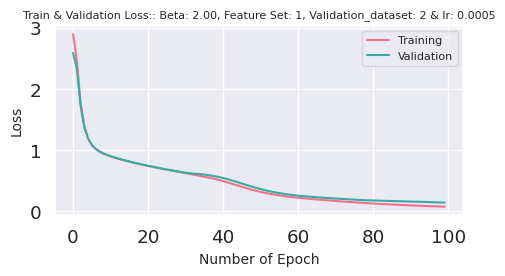

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/wtte/wtte.py:89: UserWarning: `alpha_kernel_scalefactor` deprecated in favor of `scalefactor` scaling both.
 Setting `scalefactor = alpha_kernel_scalefactor`
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


65/65 - 13s - loss: 2.8923 - val_loss: 2.8685 - 13s/epoch - 198ms/step
Epoch 2/100
65/65 - 7s - loss: 2.7261 - val_loss: 2.7726 - 7s/epoch - 115ms/step
Epoch 3/100
65/65 - 7s - loss: 2.1732 - val_loss: 2.2645 - 7s/epoch - 113ms/step
Epoch 4/100
65/65 - 7s - loss: 1.6667 - val_loss: 1.7833 - 7s/epoch - 114ms/step
Epoch 5/100
65/65 - 7s - loss: 1.3973 - val_loss: 1.4792 - 7s/epoch - 113ms/step
Epoch 6/100
65/65 - 8s - loss: 1.2408 - val_loss: 1.2973 - 8s/epoch - 116ms/step
Epoch 7/100
65/65 - 7s - loss: 1.1420 - val_loss: 1.1810 - 7s/epoch - 115ms/step
Epoch 8/100
65/65 - 7s - loss: 1.0733 - val_loss: 1.0997 - 7s/epoch - 115ms/step
Epoch 9/100
65/65 - 8s - loss: 1.0217 - val_loss: 1.0398 - 8s/epoch - 116ms/step
Epoch 10/100
65/65 - 8s - loss: 0.9814 - val_loss: 0.9943 - 8s/epoch - 116ms/step
Epoch 11/100
65/65 - 8s - loss: 0.9483 - val_loss: 0.9572 - 8s/epoch - 117ms/step
Epoch 12/100
65/65 - 7s - loss: 0.9210 - val_loss: 0.9263 - 7s/epoch - 112ms/step
Epoch 13/100
65/65 - 8s - loss: 0.8

<ipython-input-246-42d83bf93f62>:123: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averages = averaged_df.groupby('group')['Alpha_avg', 'Beta_avg'].mean()
<ipython-input-246-42d83bf93f62>:154: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_results = rmse_results.append({


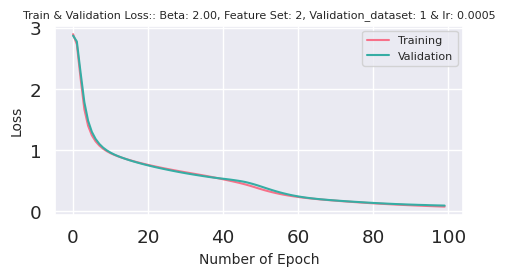

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/wtte/wtte.py:89: UserWarning: `alpha_kernel_scalefactor` deprecated in favor of `scalefactor` scaling both.
 Setting `scalefactor = alpha_kernel_scalefactor`
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


65/65 - 13s - loss: 2.8331 - val_loss: 2.9036 - 13s/epoch - 202ms/step
Epoch 2/100
65/65 - 8s - loss: 2.5025 - val_loss: 2.8906 - 8s/epoch - 116ms/step
Epoch 3/100
65/65 - 7s - loss: 2.0927 - val_loss: 2.6064 - 7s/epoch - 113ms/step
Epoch 4/100
65/65 - 8s - loss: 1.7643 - val_loss: 2.2224 - 8s/epoch - 118ms/step
Epoch 5/100
65/65 - 7s - loss: 1.5223 - val_loss: 1.9037 - 7s/epoch - 113ms/step
Epoch 6/100
65/65 - 8s - loss: 1.3358 - val_loss: 1.6173 - 8s/epoch - 116ms/step
Epoch 7/100
65/65 - 7s - loss: 1.1976 - val_loss: 1.4091 - 7s/epoch - 112ms/step
Epoch 8/100
65/65 - 7s - loss: 1.0973 - val_loss: 1.2620 - 7s/epoch - 114ms/step
Epoch 9/100
65/65 - 8s - loss: 1.0239 - val_loss: 1.1564 - 8s/epoch - 116ms/step
Epoch 10/100
65/65 - 7s - loss: 0.9692 - val_loss: 1.0778 - 7s/epoch - 114ms/step
Epoch 11/100
65/65 - 8s - loss: 0.9269 - val_loss: 1.0159 - 8s/epoch - 117ms/step
Epoch 12/100
65/65 - 7s - loss: 0.8928 - val_loss: 0.9688 - 7s/epoch - 112ms/step
Epoch 13/100
65/65 - 7s - loss: 0.8

<ipython-input-246-42d83bf93f62>:123: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averages = averaged_df.groupby('group')['Alpha_avg', 'Beta_avg'].mean()
<ipython-input-246-42d83bf93f62>:154: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_results = rmse_results.append({


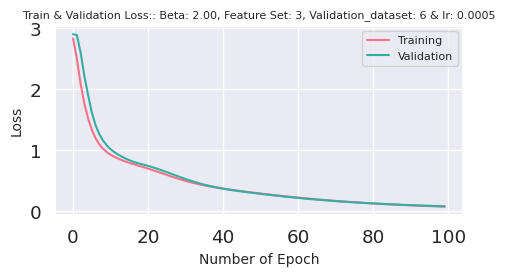

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/wtte/wtte.py:89: UserWarning: `alpha_kernel_scalefactor` deprecated in favor of `scalefactor` scaling both.
 Setting `scalefactor = alpha_kernel_scalefactor`
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


65/65 - 13s - loss: 2.7030 - val_loss: 2.9827 - 13s/epoch - 193ms/step
Epoch 2/100
65/65 - 7s - loss: 1.9569 - val_loss: 2.1616 - 7s/epoch - 115ms/step
Epoch 3/100
65/65 - 7s - loss: 1.4511 - val_loss: 1.5510 - 7s/epoch - 112ms/step
Epoch 4/100
65/65 - 8s - loss: 1.2074 - val_loss: 1.2667 - 8s/epoch - 117ms/step
Epoch 5/100
65/65 - 7s - loss: 1.0825 - val_loss: 1.1215 - 7s/epoch - 115ms/step
Epoch 6/100
65/65 - 8s - loss: 1.0143 - val_loss: 1.0381 - 8s/epoch - 118ms/step
Epoch 7/100
65/65 - 8s - loss: 0.9713 - val_loss: 0.9877 - 8s/epoch - 117ms/step
Epoch 8/100
65/65 - 8s - loss: 0.9405 - val_loss: 0.9507 - 8s/epoch - 117ms/step
Epoch 9/100
65/65 - 8s - loss: 0.9151 - val_loss: 0.9214 - 8s/epoch - 117ms/step
Epoch 10/100
65/65 - 7s - loss: 0.8930 - val_loss: 0.8960 - 7s/epoch - 113ms/step
Epoch 11/100
65/65 - 8s - loss: 0.8730 - val_loss: 0.8735 - 8s/epoch - 120ms/step
Epoch 12/100
65/65 - 8s - loss: 0.8545 - val_loss: 0.8525 - 8s/epoch - 117ms/step
Epoch 13/100
65/65 - 8s - loss: 0.8

<ipython-input-246-42d83bf93f62>:123: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averages = averaged_df.groupby('group')['Alpha_avg', 'Beta_avg'].mean()
<ipython-input-246-42d83bf93f62>:154: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_results = rmse_results.append({


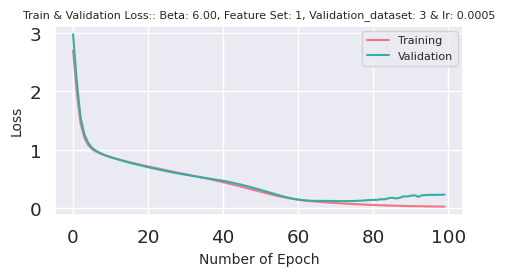

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/wtte/wtte.py:89: UserWarning: `alpha_kernel_scalefactor` deprecated in favor of `scalefactor` scaling both.
 Setting `scalefactor = alpha_kernel_scalefactor`
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


65/65 - 14s - loss: 2.7772 - val_loss: 2.7638 - 14s/epoch - 210ms/step
Epoch 2/100
65/65 - 7s - loss: 1.9808 - val_loss: 1.9054 - 7s/epoch - 111ms/step
Epoch 3/100
65/65 - 7s - loss: 1.4019 - val_loss: 1.3692 - 7s/epoch - 115ms/step
Epoch 4/100
65/65 - 7s - loss: 1.1466 - val_loss: 1.1463 - 7s/epoch - 112ms/step
Epoch 5/100
65/65 - 7s - loss: 1.0354 - val_loss: 1.0459 - 7s/epoch - 113ms/step
Epoch 6/100
65/65 - 7s - loss: 0.9778 - val_loss: 0.9913 - 7s/epoch - 113ms/step
Epoch 7/100
65/65 - 7s - loss: 0.9420 - val_loss: 0.9548 - 7s/epoch - 114ms/step
Epoch 8/100
65/65 - 8s - loss: 0.9149 - val_loss: 0.9259 - 8s/epoch - 116ms/step
Epoch 9/100
65/65 - 7s - loss: 0.8924 - val_loss: 0.9017 - 7s/epoch - 109ms/step
Epoch 10/100
65/65 - 7s - loss: 0.8722 - val_loss: 0.8800 - 7s/epoch - 111ms/step
Epoch 11/100
65/65 - 7s - loss: 0.8538 - val_loss: 0.8604 - 7s/epoch - 111ms/step
Epoch 12/100
65/65 - 7s - loss: 0.8362 - val_loss: 0.8415 - 7s/epoch - 111ms/step
Epoch 13/100
65/65 - 7s - loss: 0.8

<ipython-input-246-42d83bf93f62>:123: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averages = averaged_df.groupby('group')['Alpha_avg', 'Beta_avg'].mean()
<ipython-input-246-42d83bf93f62>:154: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_results = rmse_results.append({


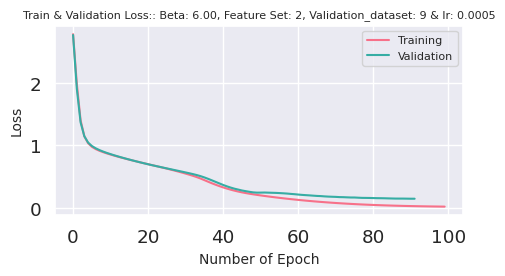

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/wtte/wtte.py:89: UserWarning: `alpha_kernel_scalefactor` deprecated in favor of `scalefactor` scaling both.
 Setting `scalefactor = alpha_kernel_scalefactor`
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


65/65 - 13s - loss: 1.9298 - val_loss: 2.0253 - 13s/epoch - 195ms/step
Epoch 2/100
65/65 - 7s - loss: 1.4574 - val_loss: 1.5242 - 7s/epoch - 111ms/step
Epoch 3/100
65/65 - 8s - loss: 1.2169 - val_loss: 1.2604 - 8s/epoch - 117ms/step
Epoch 4/100
65/65 - 7s - loss: 1.0858 - val_loss: 1.1217 - 7s/epoch - 111ms/step
Epoch 5/100
65/65 - 8s - loss: 1.0098 - val_loss: 1.0418 - 8s/epoch - 116ms/step
Epoch 6/100
65/65 - 7s - loss: 0.9629 - val_loss: 0.9912 - 7s/epoch - 114ms/step
Epoch 7/100
65/65 - 7s - loss: 0.9297 - val_loss: 0.9549 - 7s/epoch - 113ms/step
Epoch 8/100
65/65 - 7s - loss: 0.9038 - val_loss: 0.9268 - 7s/epoch - 113ms/step
Epoch 9/100
65/65 - 8s - loss: 0.8818 - val_loss: 0.9027 - 8s/epoch - 116ms/step
Epoch 10/100
65/65 - 7s - loss: 0.8622 - val_loss: 0.8815 - 7s/epoch - 114ms/step
Epoch 11/100
65/65 - 7s - loss: 0.8441 - val_loss: 0.8618 - 7s/epoch - 114ms/step
Epoch 12/100
65/65 - 8s - loss: 0.8269 - val_loss: 0.8435 - 8s/epoch - 116ms/step
Epoch 13/100
65/65 - 7s - loss: 0.8

<ipython-input-246-42d83bf93f62>:123: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averages = averaged_df.groupby('group')['Alpha_avg', 'Beta_avg'].mean()
<ipython-input-246-42d83bf93f62>:154: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_results = rmse_results.append({


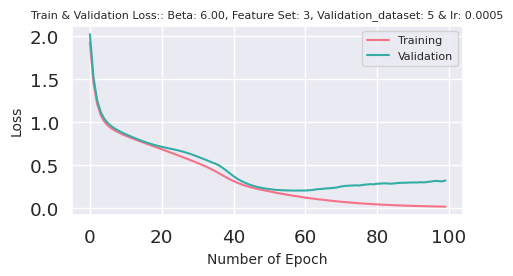

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/wtte/wtte.py:89: UserWarning: `alpha_kernel_scalefactor` deprecated in favor of `scalefactor` scaling both.
 Setting `scalefactor = alpha_kernel_scalefactor`
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


65/65 - 13s - loss: 2.3951 - val_loss: 2.3765 - 13s/epoch - 206ms/step
Epoch 2/100
65/65 - 7s - loss: 1.6386 - val_loss: 1.7993 - 7s/epoch - 111ms/step
Epoch 3/100
65/65 - 7s - loss: 1.2893 - val_loss: 1.3858 - 7s/epoch - 114ms/step
Epoch 4/100
65/65 - 7s - loss: 1.1248 - val_loss: 1.1759 - 7s/epoch - 113ms/step
Epoch 5/100
65/65 - 7s - loss: 1.0341 - val_loss: 1.0661 - 7s/epoch - 112ms/step
Epoch 6/100
65/65 - 8s - loss: 0.9812 - val_loss: 1.0042 - 8s/epoch - 116ms/step
Epoch 7/100
65/65 - 7s - loss: 0.9456 - val_loss: 0.9635 - 7s/epoch - 115ms/step
Epoch 8/100
65/65 - 8s - loss: 0.9177 - val_loss: 0.9321 - 8s/epoch - 117ms/step
Epoch 9/100
65/65 - 7s - loss: 0.8944 - val_loss: 0.9065 - 7s/epoch - 111ms/step
Epoch 10/100
65/65 - 8s - loss: 0.8736 - val_loss: 0.8835 - 8s/epoch - 116ms/step
Epoch 11/100
65/65 - 7s - loss: 0.8545 - val_loss: 0.8628 - 7s/epoch - 113ms/step
Epoch 12/100
65/65 - 8s - loss: 0.8365 - val_loss: 0.8434 - 8s/epoch - 116ms/step
Epoch 13/100
65/65 - 8s - loss: 0.8

<ipython-input-246-42d83bf93f62>:123: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averages = averaged_df.groupby('group')['Alpha_avg', 'Beta_avg'].mean()
<ipython-input-246-42d83bf93f62>:154: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_results = rmse_results.append({


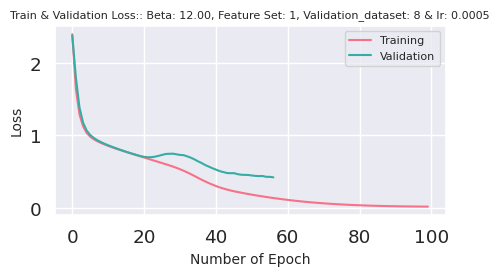

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/wtte/wtte.py:89: UserWarning: `alpha_kernel_scalefactor` deprecated in favor of `scalefactor` scaling both.
 Setting `scalefactor = alpha_kernel_scalefactor`
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


65/65 - 12s - loss: 2.8762 - val_loss: 2.8844 - 12s/epoch - 192ms/step
Epoch 2/100
65/65 - 8s - loss: 2.4579 - val_loss: 2.4146 - 8s/epoch - 116ms/step
Epoch 3/100
65/65 - 8s - loss: 1.7041 - val_loss: 1.7367 - 8s/epoch - 116ms/step
Epoch 4/100
65/65 - 7s - loss: 1.3097 - val_loss: 1.3480 - 7s/epoch - 115ms/step
Epoch 5/100
65/65 - 7s - loss: 1.1220 - val_loss: 1.1448 - 7s/epoch - 115ms/step
Epoch 6/100
65/65 - 7s - loss: 1.0263 - val_loss: 1.0432 - 7s/epoch - 115ms/step
Epoch 7/100
65/65 - 7s - loss: 0.9730 - val_loss: 0.9851 - 7s/epoch - 115ms/step
Epoch 8/100
65/65 - 7s - loss: 0.9382 - val_loss: 0.9465 - 7s/epoch - 115ms/step
Epoch 9/100
65/65 - 7s - loss: 0.9114 - val_loss: 0.9158 - 7s/epoch - 113ms/step
Epoch 10/100
65/65 - 7s - loss: 0.8884 - val_loss: 0.8900 - 7s/epoch - 115ms/step
Epoch 11/100
65/65 - 7s - loss: 0.8678 - val_loss: 0.8671 - 7s/epoch - 112ms/step
Epoch 12/100
65/65 - 7s - loss: 0.8488 - val_loss: 0.8460 - 7s/epoch - 111ms/step
Epoch 13/100
65/65 - 8s - loss: 0.8

<ipython-input-246-42d83bf93f62>:123: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averages = averaged_df.groupby('group')['Alpha_avg', 'Beta_avg'].mean()
<ipython-input-246-42d83bf93f62>:154: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_results = rmse_results.append({


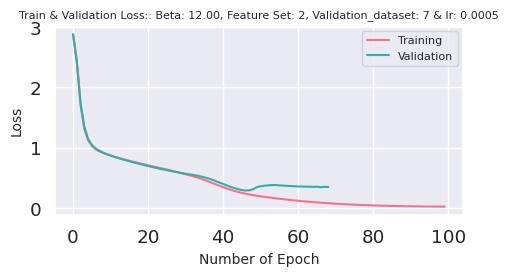

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/wtte/wtte.py:89: UserWarning: `alpha_kernel_scalefactor` deprecated in favor of `scalefactor` scaling both.
 Setting `scalefactor = alpha_kernel_scalefactor`
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


65/65 - 13s - loss: 2.4849 - val_loss: 2.7468 - 13s/epoch - 197ms/step
Epoch 2/100
65/65 - 8s - loss: 1.7770 - val_loss: 1.9512 - 8s/epoch - 116ms/step
Epoch 3/100
65/65 - 8s - loss: 1.3751 - val_loss: 1.4466 - 8s/epoch - 118ms/step
Epoch 4/100
65/65 - 8s - loss: 1.1704 - val_loss: 1.1983 - 8s/epoch - 119ms/step
Epoch 5/100
65/65 - 7s - loss: 1.0600 - val_loss: 1.0730 - 7s/epoch - 115ms/step
Epoch 6/100
65/65 - 8s - loss: 0.9992 - val_loss: 1.0028 - 8s/epoch - 117ms/step
Epoch 7/100
65/65 - 7s - loss: 0.9596 - val_loss: 0.9570 - 7s/epoch - 113ms/step
Epoch 8/100
65/65 - 8s - loss: 0.9298 - val_loss: 0.9233 - 8s/epoch - 116ms/step
Epoch 9/100
65/65 - 7s - loss: 0.9052 - val_loss: 0.8963 - 7s/epoch - 111ms/step
Epoch 10/100
65/65 - 7s - loss: 0.8839 - val_loss: 0.8731 - 7s/epoch - 114ms/step
Epoch 11/100
65/65 - 8s - loss: 0.8645 - val_loss: 0.8520 - 8s/epoch - 117ms/step
Epoch 12/100
65/65 - 7s - loss: 0.8464 - val_loss: 0.8326 - 7s/epoch - 112ms/step
Epoch 13/100
65/65 - 8s - loss: 0.8

<ipython-input-246-42d83bf93f62>:123: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averages = averaged_df.groupby('group')['Alpha_avg', 'Beta_avg'].mean()
<ipython-input-246-42d83bf93f62>:154: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_results = rmse_results.append({


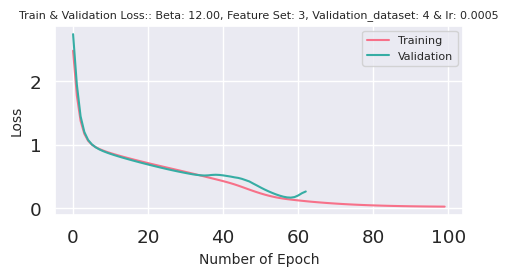

In [ ]:
# Calculating the mean Time to Event (TTE) for the training dataset. TTE refers to the time until an event of interest occurs.

tte_mean_train = np.nanmean(df.iloc[:,1])

mean_u = np.nanmean(df.iloc[:,1])

init_alpha = -1.0/np.log(1.0-1.0/(tte_mean_train+1.0) )
init_alpha = init_alpha/mean_u

# Set the learning rate, the number of epochs (iterations over the entire dataset), and the batch size for the training of the neural network.
learning_rate = 0.0005
epochs = 100
batch_size = 32

# Print these values to review them before the training process.
print('tte_mean_train:        ', tte_mean_train, "\n",
      'init_alpha:            ', init_alpha, "\n",
      'mean uncensored train: ', mean_u, "\n",
      'epochs: ', epochs, "\n",
      'batch_size:        ', batch_size, "\n",
      'learning_rate:        ', learning_rate)

# Define a mapping from feature set identifiers to their corresponding column indexes in the dataset. This enables us to easily select different sets of features for different runs of the model.
feature_sets = {
    1: cols_index1,
    2: cols_index2,
    3: cols_index3
}

# Define a list of combinations of beta value (shape parameter for the Weibull distribution), feature set number, and dataset number. Each combination will define a different configuration for the model.
beta_feature_data_combination = [[2, 1, 2], [2, 2, 1], [2, 3, 6], [6, 1, 3], [6, 2, 9], [6, 3, 5], [12, 1, 8], [12, 2, 7], [12, 3, 4]]
#beta_feature_data_combination = [[12, 1, 8], [12, 2, 7], [12, 3, 4]]
#beta_feature_data_combination = [[3, 1, 2], [3, 2, 1], [3, 3, 6], [9, 1, 3], [9, 2, 9], [9, 3, 5], [27, 1, 8], [27, 2, 7], [27, 3, 4]]


# Define the function to build the WTTE-RNN model.
def build_model(n_features, mask_value, init_alpha, max_beta_value, learning_rate):

    model = Sequential()

    K.set_epsilon(1e-10)

    model.add(Masking(mask_value = mask_value, input_shape = (None, n_features)))


    model.add(GRU(6, activation = "tanh", return_sequences = True))

    model.add(Dense(2))

    model.add(Lambda(wtte.output_lambda,
                     arguments = {"init_alpha":init_alpha,
                                "max_beta_value":max_beta_value,  "alpha_kernel_scalefactor":0.5},
                     ))

    loss = wtte.loss(kind = 'discrete',reduce_loss = False).loss_function

    model.compile(loss = loss, optimizer=RMSprop(lr = learning_rate))


    return model


train_test_data = {}

# Loop over the list of training datasets and populate the dictionary.
for i in range(len(train_x_list)):
  train_test_data[i+1] = (train_x_list[i], train_y_list[i], test_x_list[i], test_y_list[i], test_data_list[i])

# Initialize empty lists to store the training histories, averaged predictions, and survival probabilities for each configuration of the model.
training_histories = []
averaged_predictions = []
survival_probabilities = []

# Initialize an empty DataFrame to store the Root Mean Square Error (RMSE) results for each configuration of the model. RMSE is a common metric for measuring the difference between the predicted and the actual values.
rmse_results = pd.DataFrame(columns=['max_beta_value', 'feature_set_num', 'dataset_num', 'rmse'])

#  combination of beta value, feature set, and dataset.
for beta_feature_data in beta_feature_data_combination:

    max_beta_value = beta_feature_data[0]
    feature_set_num = beta_feature_data[1]
    dataset_num = beta_feature_data[2]

    # Get the feature indexes for the current feature set.
    feature_indexes = feature_sets[feature_set_num]

    # Extract the training and testing datasets for the current dataset from the dictionary.
    train_x, train_y, test_x, test_y, test_data = train_test_data[dataset_num]

    # Select the features using the indexes for the training and testing datasets.
    train_x = train_x[:, :, feature_indexes]
    test_x = test_x[:, :, feature_indexes]

    # Call the build_model function to create the model.
    n_features = len(feature_indexes)
    model = build_model(n_features, mask_value, init_alpha, max_beta_value, learning_rate)

    # Train the model using the training data and validate it using the testing data.
    history = model.fit(train_x, train_y,
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=2,
                        validation_data=(test_x, test_y))

    # Store the training history of the model.
    training_histories.append(history.history)

    # Make predictions on the test data using the trained model.
    predictions = model.predict(test_x)
    averages = predictions.mean(axis=1)
    avg_columns = [f'Alpha_avg', f'Beta_avg']
    averaged_df = pd.DataFrame(averages, columns=avg_columns)
    averaged_df['group'] = averaged_df.index // max_sequences
    averages = averaged_df.groupby('group')['Alpha_avg', 'Beta_avg'].mean()
    averages = averages[['Alpha_avg', 'Beta_avg']]

    # Retrieve the last values of the original_id, Time, and Default_Status columns for each group in the test data.
    final_test_data = test_data[['original_id','Time', 'Default_Status']]
    last_values = final_test_data.groupby(['original_id'])[['original_id','Time','Default_Status']].last()

    # Merge the last values with the averaged predictions and calculate the survival probabilities.
    merged_data = pd.concat([last_values.reset_index(drop=True), averages.reset_index(drop=True)], axis=1)
    merged_data['survival_probability'] = np.exp(-((merged_data['Time'] / merged_data['Alpha_avg']) ** merged_data['Beta_avg']))
    merged_data['max_beta_value'] = max_beta_value
    merged_data['feature_set_num'] = feature_set_num
    merged_data['dataset_num'] = dataset_num

    # Add the merged data to the list of survival probabilities.
    survival_probabilities.append(merged_data)

    survival_probabilities_df = pd.concat(survival_probabilities)


    survival_probabilities_df.to_csv(f'/content/drive/My Drive/Master_Thesis/WTTE_RNN/data10_final/survival_probabilities_df.csv', index=False)

    # Calculate the RMSE between the actual Default_Status and the predicted survival_probability.
    try:
        rmse = np.sqrt(mean_squared_error(merged_data['Default_Status'], merged_data['survival_probability']))
        print("Root Mean Squared Error: ", rmse)
    except Exception as e:
        print("Error in RMSE calculation: ", e)
        rmse = None  # or you can provide any default value

    # Add the RMSE for this iteration to the DataFrame of RMSE results.
    rmse_results = rmse_results.append({
        'max_beta_value': max_beta_value,
        'feature_set_num': feature_set_num,
        'dataset_num': dataset_num,
        'rmse': rmse
    }, ignore_index=True)
    rmse_results.to_csv(f'/content/drive/My Drive/Master_Thesis/WTTE_RNN/data10_final/rmse_results.csv', index=False)

        # Plot the training and validation losses over epochs for the current beta value, feature set, and dataset.
    sns.set_style("whitegrid")
    sns.set(font_scale=1.2)
    plt.figure(figsize=(5, 3))
    palette = sns.color_palette("husl", 2)
    sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'], color=palette[0], label='Training')
    sns.lineplot(x=range(len(history.history['val_loss'])), y=history.history['val_loss'], color=palette[1], label='Validation')
    plt.xlabel('Number of Epoch', fontsize=10)
    plt.ylabel('Loss', fontsize=10)
    plt.title(f'Train & Validation Loss:: Beta: {max_beta_value:.2f}, Feature Set: {feature_set_num}, Validation_dataset: {dataset_num} & lr: {learning_rate}', fontsize=8)
    plt.legend(fontsize=8)
    plt.tight_layout()
    plt.savefig(f'/content/drive/My Drive/Master_Thesis/WTTE_RNN/Picture10_final/Test_Data_Beta_{max_beta_value}_Feature_Set_{feature_set_num}_Test_Dataset_{dataset_num}.png', dpi=300)
    plt.show()


In [ ]:
#survival_probabilities[2].head()

# **Computing Survival Probabilities Based on User-Defined Time Parameters**

In [ ]:
data_path = "/content/drive/My Drive/Master_Thesis/WTTE_RNN/data8_final/survival_probabilities_df.csv"  # replace <folder-name> with your folder
#survival_probabilities_df.to_csv(data_path, index=False)

In [ ]:
#data_path = "/content/drive/My Drive/Master_Thesis/WTTE_RNN/data10_final/survival_probabilities_df.csv"  # replace <folder-name> with your folder
survival_probabilities_df = pd.read_csv(data_path, sep=",")

In [ ]:
# Create an empty DataFrame to store the results.
#new_dataframe = pd.DataFrame()

#df_unique = survival_probabilities_df.copy()

# Round the alpha and beta values to 2 decimal places.
survival_probabilities_df[['Alpha_avg','Beta_avg']] = (survival_probabilities_df[['Alpha_avg','Beta_avg']]).round(3)
#df_unique['Alpha_avg1'] = (df_unique['Alpha_avg1'] * 20).round() / 20
#df_unique['Beta_avg1'] = (df_unique['Beta_avg1'] * 20).round() / 20

survival_probabilities_df['Alpha_avg'] = survival_probabilities_df.groupby('Beta_avg')['Alpha_avg'].transform('mean')

survival_probabilities_df[['Alpha_avg']] = (survival_probabilities_df[['Alpha_avg']]).round(2)

# Sort the DataFrame by Beta_avg
survival_probabilities_df = survival_probabilities_df.sort_values(by='Beta_avg')

In [ ]:
#df_unique[["Alpha_avg",	"Beta_avg",	"Alpha_avg1", "Beta_avg1"]].head(5)
survival_probabilities_df[["Alpha_avg",	"Beta_avg"]].head(2)

Alpha_avg  Beta_avg
33       6.62     1.555
39       8.97     1.556

**Distribution of Scale(Alpa-avg) and Shape(Beta_avg) parameter**

In [ ]:
Time = 60

In [ ]:
survival_probabilities_df['Predicted_Survival_Probability'] = np.exp(-((Time / survival_probabilities_df['Alpha_avg']) ** survival_probabilities_df['Beta_avg']))

In [ ]:
# Define an empty dataframe to hold the summary statistics
summary_df = pd.DataFrame()
grouped = survival_probabilities_df.groupby(['max_beta_value', 'feature_set_num', 'dataset_num'])

# Loop through the groups
for (max_beta_value, feature_set_num, dataset_num), group in grouped:
    # Calculate the summary statistics for Alpha_avg and Beta_avg
    alpha_summary = group['Alpha_avg'].describe()
    beta_summary = group['Beta_avg'].describe()

    # Calculate the percentage of data within 1 standard deviation for Alpha_avg and Beta_avg
    alpha_within_std = group['Alpha_avg'][(group['Alpha_avg'] > alpha_summary['mean'] - alpha_summary['std']) &
                                          (group['Alpha_avg'] < alpha_summary['mean'] + alpha_summary['std'])].count()
    beta_within_std = group['Beta_avg'][(group['Beta_avg'] > beta_summary['mean'] - beta_summary['std']) &
                                         (group['Beta_avg'] < beta_summary['mean'] + beta_summary['std'])].count()
    alpha_pct_within_std = (alpha_within_std / len(group['Alpha_avg'])) * 100
    beta_pct_within_std = (beta_within_std / len(group['Beta_avg'])) * 100

    # Create a summary dataframe for this group
    group_summary = pd.DataFrame({
        'max_beta': max_beta_value,
        'feature_set': feature_set_num,
        #'dataset_num': dataset_num,
        'Beta within 1-std limit(%)': beta_pct_within_std,
        'Beta_Mean': beta_summary['mean'],
        'Beta_Min': beta_summary['min'],
        'Beta_Max': beta_summary['max'],
        'Beta_Std': beta_summary['std'],

        'Alpha within 1-std limit(%)': alpha_pct_within_std,
        'Alpha_Mean': alpha_summary['mean'],
        'Alpha_Min': alpha_summary['min'],
        'Alpha_Max': alpha_summary['max'],
        'Alpha_Std': alpha_summary['std']
    }, index=[0])

    # Append the group summary to the overall summary dataframe
    summary_df = pd.concat([summary_df, group_summary], ignore_index=True)

# Display the summary dataframe
display(summary_df)


max_beta  feature_set  Beta within 1-std limit(%)  Beta_Mean  Beta_Min  \
0         2            1                   88.461538   1.619385     1.584   
1         2            2                   69.230769   1.606115     1.555   
2         2            3                   69.230769   1.610538     1.569   
3         6            1                   73.076923   2.682115     2.595   
4         6            2                   80.769231   2.886692     2.746   
5         6            3                   76.923077   2.964154     2.787   
6        12            1                   65.384615   3.685000     3.355   
7        12            2                   65.384615   3.470654     3.284   
8        12            3                   84.615385   3.688846     3.328   

   Beta_Max  Beta_Std  Alpha within 1-std limit(%)  Alpha_Mean  Alpha_Min  \
0     1.720  0.038288                    92.307692   60.123077       7.28   
1     1.718  0.041815                    80.769231   60.130769       6.62   
2     1.704  0.035766                    80.769231   61.198462       6.03   
3     2.762  0.037888                    92.307692   61.801923       6.73   
4     3.159  0.142942                    61.538462   24.794615       5.69   
5     3.383  0.149533                    88.461538   24.017692       5.71   
6     4.399  0.304887                    84.615385   21.071154       5.69   
7     3.857  0.163116                    88.461538   19.749231       5.63   
8     4.656  0.378649                    80.769231   15.731154       5.93   

   Alpha_Max  Alpha_Std  
0     285.64  67.939543  
1     217.69  53.052707  
2     237.80  57.047993  
3     221.85  56.774753  
4      63.03  18.419172  
5      88.28  21.966056  
6      80.50  20.819630  
7      70.32  17.347578  
8      39.72  10.273096

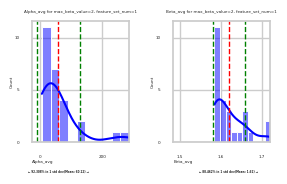

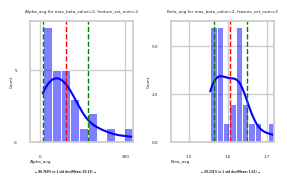

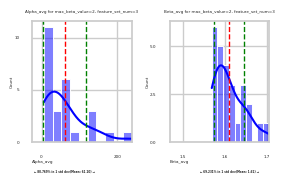

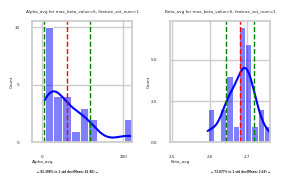

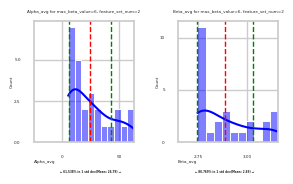

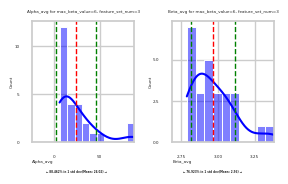

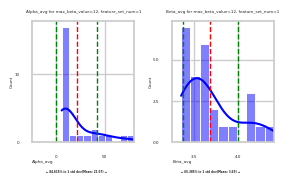

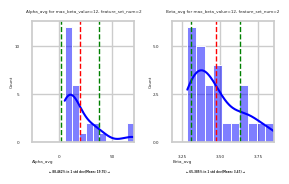

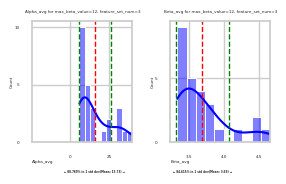

In [ ]:
# Set the visual style of the plot
%matplotlib inline

# Set the global font size
plt.rc('font', size=3)  # affects most text elements
plt.rc('axes', titlesize=3)  # affects subplot titles
plt.rc('axes', labelsize=3)  # affects x and y labels

sns.set_style("whitegrid")
sns.set_context("notebook")
#df_unique = survival_probabilities_df.copy()
# Group the dataframe by max_beta_value, feature_set_num, and dataset_num
grouped = survival_probabilities_df.groupby(['max_beta_value', 'feature_set_num', 'dataset_num'])

# Loop through the groups
for (max_beta_value, feature_set_num, dataset_num), group in grouped:
    # Create a figure
    plt.figure(figsize=(3, 2))

    xmin_alpha = group['Alpha_avg'].min()
    xmax_alpha = group['Alpha_avg'].max()

    # Compute the xmin and xmax from the data
    xmin_beta = group['Beta_avg'].min()
    xmax_beta = group['Beta_avg'].max()

    # Create a histogram for Alpha_avg
    plt.subplot(1, 2, 1)
    sns.histplot(group['Alpha_avg'], kde=True, color='blue', stat='count', bins=10)
    #plt.ylim([0, 1])  # Set y-axis limit
    mu_alpha = group['Alpha_avg'].mean()
    std_alpha = group['Alpha_avg'].std()
    within_std_alpha = group['Alpha_avg'][(group['Alpha_avg'] > mu_alpha - std_alpha) & (group['Alpha_avg'] < mu_alpha + std_alpha)].count()
    pct_within_std_alpha = (within_std_alpha / len(group['Alpha_avg'])) * 100

    plt.axvline(mu_alpha, color='red', linestyle='dashed', linewidth=1)
    plt.axvline(mu_alpha + std_alpha, color='green', linestyle='dashed', linewidth=1)
    plt.axvline(mu_alpha - std_alpha, color='green', linestyle='dashed', linewidth=1)
    plt.title(f'Alpha_avg for max_beta_value={max_beta_value}, feature_set_num={feature_set_num}', fontsize=3)
    #y_min, y_max = plt.ylim()
    #print("Y-axis limits:", y_min, y_max)
    plt.xlim([xmin_alpha-30, xmax_alpha])
    plt.xticks(fontsize=3)
    plt.yticks(fontsize=3)
    plt.xlabel('Alpha_avg', position=(0, 0), ha='left', fontsize=3, labelpad=0.1)
    plt.ylabel('Count', fontsize=3, labelpad=0.1)
    plt.annotate(f'\u2190 {pct_within_std_alpha:.3f}% in 1 std dev(Mean: {mu_alpha:.2f}) \u2192',
                 xy=(mu_alpha, plt.ylim()[0]), xycoords='data',
                 xytext=(0, -20), textcoords='offset points',
                 fontsize=2, ha='center', va='top', weight='bold')

    # Create a histogram for Beta_avg
    plt.subplot(1, 2, 2)
    sns.histplot(group['Beta_avg'], kde=True, color='blue', stat='count', bins=10)
    #plt.ylim([0, 1])  # Set y-axis limit
    #y_min, y_max = plt.ylim()
    #print("Y-axis limits:", y_min, y_max)
    mu_beta = group['Beta_avg'].mean()
    std_beta = group['Beta_avg'].std()
    within_std_beta = group['Beta_avg'][(group['Beta_avg'] > mu_beta - std_beta) & (group['Beta_avg'] < mu_beta + std_beta)].count()
    range_beta = (mu_beta + 2*std_beta)
    pct_within_std_beta = (within_std_beta / len(group['Beta_avg'])) * 100

    plt.axvline(mu_beta, color='red', linestyle='dashed', linewidth=1)
    plt.axvline(mu_beta + std_beta, color='green', linestyle='dashed', linewidth=1)
    plt.axvline(mu_beta - std_beta, color='green', linestyle='dashed', linewidth=1)
    plt.title(f'Beta_avg for max_beta_value={max_beta_value}, feature_set_num={feature_set_num}', fontsize=3)
    plt.xlim([xmin_beta-0.1, xmax_beta])
    plt.xticks(fontsize=3)
    plt.yticks(fontsize=3)
    plt.xlabel('Beta_avg', position=(0, 0), ha='left', fontsize=3, labelpad=0.1)
    plt.ylabel('Count', fontsize=3, labelpad=0.1)
    plt.annotate(f'\u2190 {pct_within_std_beta:.3f}% in 1 std dev(Mean: {mu_beta:.2f}) \u2192',
                 xy=(mu_beta, plt.ylim()[0]), xycoords='data',
                 xytext=(0, -20), textcoords='offset points',
                 fontsize=2, ha='center', va='top', weight='bold')
    plt.tight_layout()
    plt.savefig(f'/content/drive/My Drive/Master_Thesis/WTTE_RNN/Picture10_final/Hist_of_Alpha_avg_Test_Data_Beta_{max_beta_value}_Feature_Set_{feature_set_num}_Test_Dataset_{dataset_num}_Time={Time}.png', dpi=400)

    plt.show()


**Visualizing the Predicted Survival Probabilities for Two Individuals**

In [ ]:
"""
# Set the style of the plots to "whitegrid", which is a style in seaborn that provides gridlines for easier visualization.

sns.set_style("whitegrid")
sns.set_context("notebook")
sns.set(font_scale=1.1)

# Create a 2x3 subplot, which is a grid of plots with 2 rows and 3 columns. The size of the entire figure is set to 12x8 inches.
fig, axs = plt.subplots(1, 2, figsize=(5, 3))
Time_ = [1, 20, 40, 60, 80, 100]
# For each individual in the dataset, perform the following steps:
for i in range(2):

    # Fetch the average alpha and beta values for the ith individual from the survival probabilities dataframe.
    Alpha_avg = survival_probabilities_df['Alpha_avg'].iloc[i]
    Beta_avg = survival_probabilities_df['Beta_avg'].iloc[i]

    # Calculate the survival probability using the Weibull function with the fetched alpha and beta values.
    Survival_Probability = np.exp(-((Time_ / Alpha_avg) ** Beta_avg))

    # Plot the survival probability as a line plot in the current subplot. The x-axis is the time, and the y-axis is the survival probability.

    sns.lineplot(x=Time_, y=Survival_Probability, marker='o', ax=axs[i],
                 label='Alpha = {:.3f}, Beta = {:.3f}'.format(round(Alpha_avg, 2), round(Beta_avg, 2)))

    # Set the title, x-label, and y-label for the current subplot. The title includes the individual's number (i+1).
    axs[i].set_title('Survival Probability for Individual {}'.format(i+1), color='darkblue', fontsize=5)
    axs[i].set_xlabel('Time', fontsize=5)
    axs[i].set_ylabel('Predicted Survival Probability', fontsize=5)

    # Set the y-axis limits to be between 0 and 1, as survival probabilities are between 0 and 1.
    axs[i].set_ylim([-0.02, 1.2])
    #axs[i].set_xlim([0, 1.2])

    # Add a legend to the current subplot. The legend includes the labels for each line in the plot.
    axs[i].legend(fontsize=5)

# Improve the layout of the plot for better visualization. This adjusts the positions of the subplots to minimize overlaps.
plt.tight_layout()

# Save the plot as a PNG image in the specified directory. The dpi (dots per inch) parameter sets the resolution of the saved image.
plt.savefig(f'/content/drive/My Drive/Master_Thesis/WTTE_RNN/Picture10_final/Survival_Probability_first_two_Individual_Time={Time_}.png', dpi=200)

# Display the plot in the notebook.
plt.show()
"""

'\n# Set the style of the plots to "whitegrid", which is a style in seaborn that provides gridlines for easier visualization.\n# The context is set to "notebook" to scale plot elements for figures that will be included in a notebook.\n# The font scale is set to 1.1 to slightly increase the size of the text in the plot.\nsns.set_style("whitegrid")\nsns.set_context("notebook")\nsns.set(font_scale=1.1)\n\n# Create a 2x3 subplot, which is a grid of plots with 2 rows and 3 columns. The size of the entire figure is set to 12x8 inches.\nfig, axs = plt.subplots(1, 2, figsize=(5, 3))\nTime_ = [1, 20, 40, 60, 80, 100]\n# For each individual in the dataset, perform the following steps:\nfor i in range(2):\n\n    # Fetch the average alpha and beta values for the ith individual from the survival probabilities dataframe.\n    Alpha_avg = survival_probabilities_df[\'Alpha_avg\'].iloc[i]\n    Beta_avg = survival_probabilities_df[\'Beta_avg\'].iloc[i]\n\n    # Calculate the survival probability using t

In [ ]:
survival_probabilities_df[survival_probabilities_df["max_beta_value"]==3].max()

original_id                      NaN
Time                             NaN
default_status                   NaN
Alpha_avg                        NaN
Beta_avg                         NaN
survival_probability             NaN
max_beta_value                   NaN
feature_set_num                  NaN
dataset_num                      NaN
Predicted_Survival_Probability   NaN
dtype: float64

# **Visual Representations of Weibull Distributions for Various Shape and Scale Parameters**

In [ ]:
#pip install --upgrade matplotlib

<ipython-input-22-b344f39740fd>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('nipy_spectral', len(beta_values))


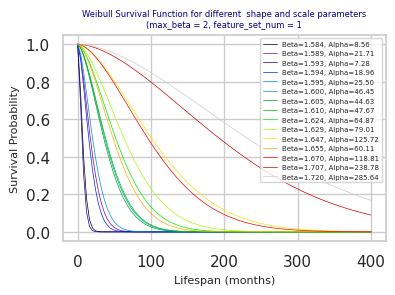

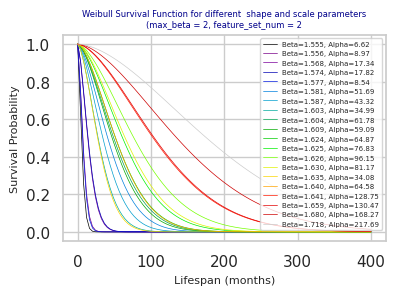

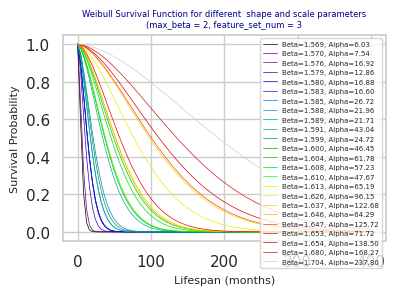

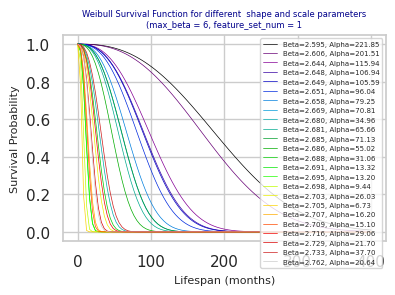

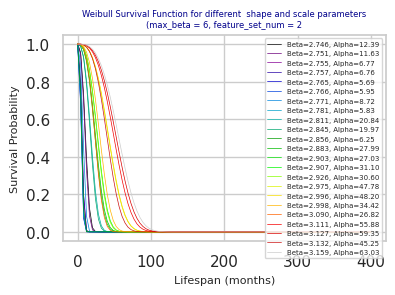

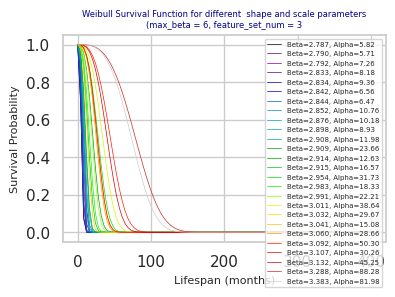

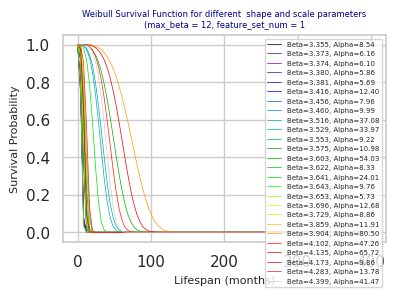

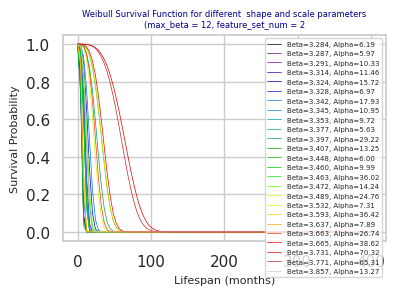

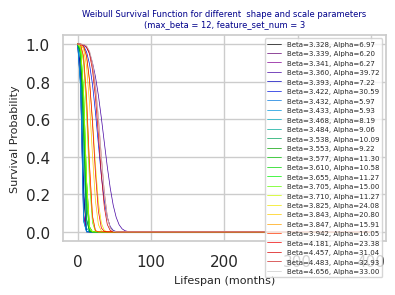

In [ ]:
plt.rc('font', size=8)  # affects most text elements
plt.rc('axes', titlesize=8)  # affects subplot titles
plt.rc('axes', labelsize=8)  # affects x and y labels
# For each group, do the following:
for (max_beta_value, feature_set_num, dataset_num), group in grouped:

    unique_pairs = group.drop_duplicates(subset=['Beta_avg', 'Alpha_avg'])

    beta_values = unique_pairs['Beta_avg'].values
    alpha_values = unique_pairs['Alpha_avg'].values

    # Define the range of x values for the plot.
    x = np.linspace(0, 400, 100)

    plt.figure(figsize=(4, 3))

    color_map = cm.get_cmap('nipy_spectral', len(beta_values))

    # For each beta and alpha value, plot the corresponding Weibull distribution.
    for idx, (beta, alpha) in enumerate(zip(beta_values, alpha_values)):

        y = weibull_min.sf(x, beta, scale=alpha)

        plt.plot(x, y, color=color_map(idx), linewidth=0.5, label=f'Beta={beta:.3f}, Alpha={alpha:.2f}')



    # Set the title, x-label, and y-label for the plot.
    plt.title(f'Weibull Survival Function for different  shape and scale parameters\n(max_beta = {max_beta_value}, feature_set_num = {feature_set_num}', color='darkblue', fontsize=6)
    plt.xlabel('Lifespan (months)', fontsize=8)
    plt.ylabel('Survival Probability', fontsize=8)
    plt.legend(fontsize=5)


    # Add gridlines to the plot for easier visualization.
    plt.grid(True)


    plt.tight_layout()

    plt.savefig(f'/content/drive/My Drive/Master_Thesis/WTTE_RNN/Picture10_final/Surv_Func__max_beta = {max_beta_value}_feature_set_num = {feature_set_num}_dataset_num = {dataset_num}_Time={Time}.png', dpi=200)

    plt.show()


#**ANOVA to Determine the Most Effective Combination of Shape Parameter and Feature Set**

In [ ]:
missing_values = survival_probabilities_df.isnull().sum()
print(missing_values)
print(survival_probabilities_df.shape)

original_id                       0
Time                              0
default_status                    0
Alpha_avg                         0
Beta_avg                          0
survival_probability              0
max_beta_value                    0
feature_set_num                   0
dataset_num                       0
Predicted_Survival_Probability    0
dtype: int64
(234, 10)


In [ ]:
survival_probabilities_df = survival_probabilities_df.dropna()

In [ ]:
survival_probabilities_df.head()

original_id  Time  default_status  Alpha_avg  Beta_avg  \
33        11805    60               1       6.62     1.555   
39        13394    60               1       8.97     1.556   
37        13374    60               0       8.97     1.556   
32        10645    60               0       8.97     1.556   
28         3335    60               0       8.97     1.556   

    survival_probability  max_beta_value  feature_set_num  dataset_num  \
33          4.105039e-14               2                2            1   
39          1.003089e-10               2                2            1   
37          1.003089e-10               2                2            1   
32          4.273000e-06               2                2            1   
28          9.644140e-11               2                2            1   

    Predicted_Survival_Probability  
33                    4.192649e-14  
39                    4.396933e-09  
37                    4.396933e-09  
32                    4.396933e-09  
28                    4.396933e-09

**Selecting Specific combination of Max_Beta, Feature_set, and Dataset**

In [ ]:
# Group the survival_probabilities_df DataFrame by "max_beta_value", "feature_set_num", and "dataset_num".

grouped = survival_probabilities_df.groupby(["max_beta_value", "feature_set_num", "dataset_num"])

# Define the groups of interest. Each group is identified by a tuple, which corresponds to

groups_of_interest = [(2, 1, 2), (2, 2, 1), (2, 3, 6),
                      (6, 1, 3), (6, 2, 9), (6, 3, 5),
                      (12, 1, 8), (12, 2, 7), (12, 3, 4)]
#groups_of_interest = [(3, 1, 2), (3, 2, 1), (3, 3, 6), (9, 1, 3), (9, 2, 9), (9, 3, 5),
 #                     (27, 1, 8), (27, 2, 7), (27, 3, 4)]
# Create an empty list to store the selected groups.
selected_groups = []

# Iterate over each group of interest.
for group in groups_of_interest:
    try:
        selected_group = grouped.get_group(group)

        selected_groups.append(selected_group)
    except KeyError:

        print(f"The group {group} does not exist in the DataFrame.")


**Analysis of variance (ANOVA) is a statistical technique that is used to compare the means of two or more groups. **



# **Performing Two-Way ANOVA with Interaction on 'Beta_avg' Considering 'max_beta_value' and 'feature_set_num**

 Simply, 'Beta_avg' as Dependent variable and 'max_beta_value' and 'feature_set_num' consider as Independent variable

In [ ]:
# Define the model for the two-way ANOVA, considering the interaction between 'max_beta_value' and 'feature_set_num'

model = ols('Beta_avg ~ C(max_beta_value) + C(feature_set_num) + C(max_beta_value):C(feature_set_num)', data=survival_probabilities_df).fit()

# Perform the two-way ANOVA and store the results in 'anova_table'
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                                          sum_sq     df            F  \
C(max_beta_value)                     159.212619    2.0  2298.846272   
C(feature_set_num)                      0.483390    2.0     6.979590   
C(max_beta_value):C(feature_set_num)    1.434011    4.0    10.352730   
Residual                                7.791482  225.0          NaN   

                                             PR(>F)  
C(max_beta_value)                     1.780148e-150  
C(feature_set_num)                     1.145816e-03  
C(max_beta_value):C(feature_set_num)   1.029905e-07  
Residual                                        NaN  


In [ ]:
residuals = model.resid

# **Setting Visualization Parameters and Function for Model Assumption Checks & Residual Plots**

In [ ]:
# Set matplotlib and Seaborn settings
plt.rc('font', size=6)
plt.rc('axes', titlesize=6)
plt.rc('axes', labelsize=6)
sns.set_style("whitegrid")
sns.set_context("notebook")
sns.set(font_scale=1.0)




def check_assumptions_and_plot(model, survival_probabilities_df, Time, save_path, model_name):
    """
    Check assumptions of the model residuals and create visualizations.

    Parameters:
    - model: The ANOVA model.
    - survival_probabilities_df: DataFrame containing survival probabilities.
    - Time: Time variable.
    - save_path: Path where the visualizations will be saved.
    - model_name: A string identifier for the model to differentiate outputs and saved files.

    This function will save different figures for different models based on the provided save_path.
    The visualizations include a Q-Q plot, histogram, boxplot, and a residuals vs. fitted values plot.
    """

    # Check Assumptions:

    # ii. Shapiro-Wilk Test
    residuals = model.resid
    _, p_value_normality = shapiro(residuals)
    print(f"Shapiro-Wilk test p-value for normality ({model_name}): {p_value_normality}")

    # b. Homogeneity of Variance - Levene's Test
    _, p_value_homo = levene(survival_probabilities_df['Beta_avg'][survival_probabilities_df['max_beta_value'] == 2],
                             survival_probabilities_df['Beta_avg'][survival_probabilities_df['max_beta_value'] == 6],
                             survival_probabilities_df['Beta_avg'][survival_probabilities_df['max_beta_value'] == 12])
    print(f"Levene's test p-value for homogeneity of variances ({model_name}): {p_value_homo}")

    # c. Independence of Residuals: Durbin-Watson test
    dw = durbin_watson(residuals)
    print(f"Durbin-Watson statistic ({model_name}): {dw}")

    # d. Heteroscedasticity: Breusch-Pagan test
    _, pvalue_Breusch_Pagan, _, _ = het_breuschpagan(residuals, model.model.exog)
    print(f"Breusch-Pagan test p-value ({model_name}): {pvalue_Breusch_Pagan}")

    # Visualization:

    # Q-Q plot for the residuals
    fig, ax = plt.subplots(figsize=(4,3))
    qqplot(residuals, line='s', ax=ax)
    ax.set_title(f'Q-Q Plot of Residuals_{model_name}', color='darkblue', fontsize=8)
    plt.tight_layout()
    plt.savefig(f'{save_path}/Q-Q-plot__of-residuals_Time={Time}_{model_name}.png', dpi=300)
    plt.show()

    # Histogram for the residuals
    fig, ax = plt.subplots(figsize=(4,3))
    sns.histplot(residuals, kde=True, color='skyblue', ax=ax)
    ax.set_title(f'Histogram of Residuals_{model_name}', fontsize=8, color='darkblue')
    plt.tight_layout()
    plt.savefig(f'{save_path}/Distribution-plot__of-residuals_Time={Time}_{model_name}.png', dpi=300)
    plt.show()

    # Boxplot for the residuals
    fig, ax = plt.subplots(figsize=(4,3))
    sns.boxplot(x=residuals, color='lightgreen', ax=ax)
    ax.set_title(f'Boxplot of Residuals_{model_name}', fontsize=8, color='darkblue')
    ax.set_xlabel('Residuals', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    plt.tight_layout()
    plt.savefig(f'{save_path}/Box_plot__of-residuals_{model_name}_Time={Time}.png', dpi=200)
    plt.show()

    # e. Linearity - Residuals vs. Fitted values plot
    plt.figure(figsize=(4, 3))
    sns.scatterplot(x=model.fittedvalues, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals vs Fitted Values_{model_name}', fontsize=8, color='darkblue')
    plt.xlabel('Fitted values', fontsize=10)
    plt.ylabel('Residuals', fontsize=10)
    plt.tight_layout()
    plt.savefig(f'{save_path}/Residuals vs Fitted Values__{model_name}_Time={Time}.png', dpi=200)
    plt.show()

**Data and image saving destination**

In [ ]:
save_path = "/content/drive/My Drive/Master_Thesis/WTTE_RNN/Picture10_final"

**Evaluating Model Assumptions and Generating Diagnostic Plots for Two-Way ANOVA**

Shapiro-Wilk test p-value for normality (Two_Way_ANOVA): 8.55500905034591e-15
Levene's test p-value for homogeneity of variances (Two_Way_ANOVA): 5.858194852081013e-13
Durbin-Watson statistic (Two_Way_ANOVA): 0.4581425483663942
Breusch-Pagan test p-value (Two_Way_ANOVA): 2.8942756748262323e-08


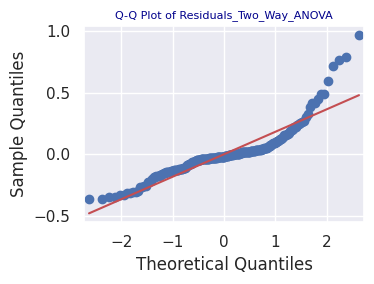

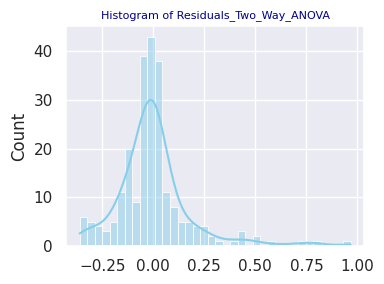

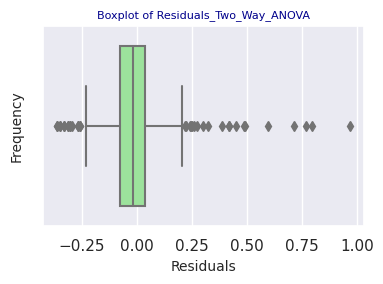

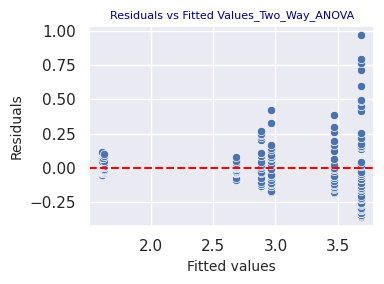

In [ ]:
check_assumptions_and_plot(model, survival_probabilities_df, Time, save_path, "Two_Way_ANOVA")

# **Comprehensive Two-Way ANOVA Analysis with Post-hoc Tests and Visualization of Interaction Effects**

In [ ]:
def combined_analysis(survival_probabilities_df, Time, save_path):
    """
    Perform two-way ANOVA, post-hoc tests, and enhanced visualizations using error bars.
    """

    # Two-way ANOVA
    formula = 'Beta_avg ~ C(max_beta_value) + C(feature_set_num) + C(max_beta_value):C(feature_set_num)'
    model = ols(formula, data=survival_probabilities_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)

    # Post-hoc tests using Tukey's HSD
    survival_probabilities_df['interaction'] = survival_probabilities_df['max_beta_value'].astype(str) + "_" + survival_probabilities_df['feature_set_num'].astype(str)
    posthoc = pairwise_tukeyhsd(endog=survival_probabilities_df['Beta_avg'], groups=survival_probabilities_df['interaction'], alpha=0.05)
    print("Post-hoc Analysis Results:")
    print(posthoc)
    print("\n")

    dimensions = ['max_beta_value', 'feature_set_num', 'interaction']

    for dimension in dimensions:
        # Determine the best group based on posthoc analysis and variance
        unique_groups = survival_probabilities_df[dimension].unique()
        winning_groups = defaultdict(int)

        # Iterate over the pairs and associated results in posthoc
        pairs = [(posthoc.groupsunique[i], posthoc.groupsunique[j]) for i in range(len(posthoc.groupsunique)) for j in range(i+1, len(posthoc.groupsunique))]

        for idx, (group1, group2) in enumerate(pairs):
            if group1 in unique_groups and group2 in unique_groups:
                mean_diff = posthoc.meandiffs[idx]
                lower, upper = posthoc.confint[idx]
                if mean_diff > 0 and lower > 0:
                    winning_groups[group1] += 1
                elif mean_diff < 0 and upper < 0:
                    winning_groups[group2] += 1

        if winning_groups:
            variances = survival_probabilities_df.groupby(dimension)['Beta_avg'].var()
            best_group = min(winning_groups.keys(), key=lambda group: variances[group])
            print(f"The best {dimension} based on posthoc analysis, variance, and confidence intervals is: {best_group}\n")
        else:
            print(f"No statistically significant group found for {dimension}\n")

    # Visualization for interactions using error bars
    plt.figure(figsize=(4, 3))
    sns.pointplot(x='max_beta_value', y='Beta_avg', hue='feature_set_num', data=survival_probabilities_df, ci=95, capsize=0.4, join=False, markers='o', errwidth=1)
    plt.title('Interaction Effect on Beta_avg with 95% CI')
    plt.ylabel('Mean Beta_avg')
    plt.xlabel('Max Beta Value')
    plt.tight_layout()
    plt.legend(title='Feature Set')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig(f'{save_path}/two_way_Interaction_Effect_Error_Bars.png', dpi=200)
    plt.show()

    # Error bars for max_beta_value
    plt.figure(figsize=(4, 3))
    sns.pointplot(x='max_beta_value', y='Beta_avg', data=survival_probabilities_df, errorbar=('ci', 95), capsize=0.4, markers='o', errwidth=1, color='blue')
    plt.title('Effect of Max Beta Value on Beta_avg with 95% CI')
    plt.ylabel('Mean Beta_avg')
    plt.xlabel('Max Beta Value')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig(f'{save_path}/two_way_Max_Beta_Effect_Error_Bars.png', dpi=200)
    plt.show()

    # Error bars for feature_set_num
    plt.figure(figsize=(4, 3))
    sns.pointplot(x='feature_set_num', y='Beta_avg', data=survival_probabilities_df, errorbar=('ci', 95), capsize=0.3, markers='o', errwidth=1, color='green')
    plt.title('Effect of Feature Set on Beta_avg with 95% CI')
    plt.ylabel('Mean Beta_avg')
    plt.xlabel('Feature Set Number')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig(f'{save_path}/two_way_Feature_Set_Effect_Error_Bars.png', dpi=200)
    plt.show()

    # Error bars for interactions
    plt.figure(figsize=(4, 3))
    sns.pointplot(x='interaction', y='Beta_avg', data=survival_probabilities_df, errorbar=('ci', 95), capsize=0.8, markers='o', errwidth=1, color='orange')
    plt.title('Interaction Effects on Beta_avg with 95% CI')
    plt.ylabel('Mean Beta_avg')
    plt.xlabel('Interactions (Max Beta Value_Feature Set Number)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig(f'{save_path}/two_way_Interaction_Effects_Error_Bars_Time={Time}.png', dpi=200)
    plt.show()



                                          sum_sq     df            F  \
C(max_beta_value)                     159.212619    2.0  2298.846272   
C(feature_set_num)                      0.483390    2.0     6.979590   
C(max_beta_value):C(feature_set_num)    1.434011    4.0    10.352730   
Residual                                7.791482  225.0          NaN   

                                             PR(>F)  
C(max_beta_value)                     1.780148e-150  
C(feature_set_num)                     1.145816e-03  
C(max_beta_value):C(feature_set_num)   1.029905e-07  
Residual                                        NaN  
Post-hoc Analysis Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  12_1   12_2  -0.2143 0.0015  -0.376 -0.0527   True
  12_1   12_3   0.0038    1.0 -0.1578  0.1655  False
  12_1    2_1  -2.0656    0.0 -2.2273  -1.904   True
  12_1    2_2  -2.0789  

<ipython-input-32-5c4fec17797c>:30: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if group1 in unique_groups and group2 in unique_groups:
<ipython-input-32-5c4fec17797c>:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x='max_beta_value', y='Beta_avg', hue='feature_set_num', data=survival_probabilities_df, ci=95, capsize=0.4, join=False, markers='o', errwidth=1)


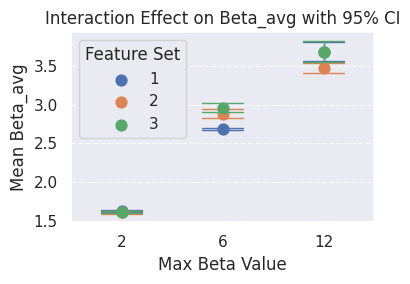

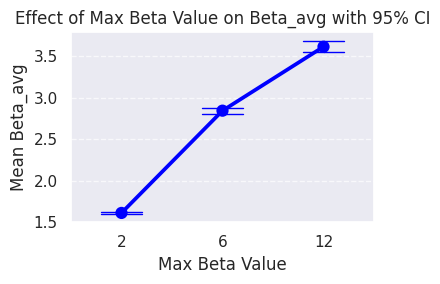

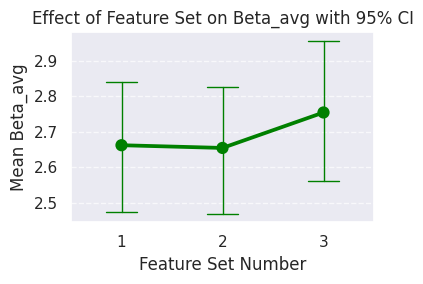

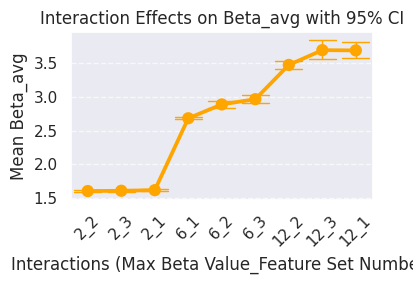

In [ ]:
combined_analysis(survival_probabilities_df, Time, save_path)

**Step 1: Transformations**

Let's start with the Box-Cox transformation since it often helps in normalizing and stabilizing variance:

# **Two-Way ANOVA with Rank-Transformed Data: Analysis, Post-Hoc Tests, and Visualizations**

In [ ]:
def two_way_rank_transformed_anova(survival_probabilities_df, Time, save_path):
    """
    Perform two-way ANOVA and post-hoc tests on rank-transformed data, followed by visualizations.
    """

    # Rank-transform the Beta_avg column
    survival_probabilities_df['Ranked_Beta_avg'] = stats.rankdata(survival_probabilities_df['Beta_avg'])

    # Two-way ANOVA on the ranks
    formula = 'Ranked_Beta_avg ~ C(max_beta_value) + C(feature_set_num) + C(max_beta_value):C(feature_set_num)'
    model = ols(formula, data=survival_probabilities_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)

    # Post-hoc tests using Tukey's HSD on the ranks
    survival_probabilities_df['interaction'] = survival_probabilities_df['max_beta_value'].astype(str) + "_" + survival_probabilities_df['feature_set_num'].astype(str)
    posthoc = pairwise_tukeyhsd(endog=survival_probabilities_df['Ranked_Beta_avg'], groups=survival_probabilities_df['interaction'], alpha=0.05)
    print("Post-hoc Analysis Results:")
    print(posthoc)
    print("\n")

    dimensions = ['max_beta_value', 'feature_set_num', 'interaction']

    for dimension in dimensions:
        # Determine the best group based on posthoc analysis and variance
        unique_groups = survival_probabilities_df[dimension].unique()
        winning_groups = defaultdict(int)

        # Iterate over the pairs and associated results in posthoc
        pairs = [(posthoc.groupsunique[i], posthoc.groupsunique[j]) for i in range(len(posthoc.groupsunique)) for j in range(i+1, len(posthoc.groupsunique))]

        for idx, (group1, group2) in enumerate(pairs):
            if group1 in unique_groups and group2 in unique_groups:
                mean_diff = posthoc.meandiffs[idx]
                lower, upper = posthoc.confint[idx]
                if mean_diff > 0 and lower > 0:
                    winning_groups[group1] += 1
                elif mean_diff < 0 and upper < 0:
                    winning_groups[group2] += 1

        if winning_groups:
            variances = survival_probabilities_df.groupby(dimension)['Ranked_Beta_avg'].var()
            best_group = min(winning_groups.keys(), key=lambda group: variances[group])
            print(f"The best {dimension} based on posthoc analysis, variance, and confidence intervals is: {best_group}\n")
        else:
            print(f"No statistically significant group found for {dimension}\n")


        # Display variance and confidence intervals in tabular form
        means = survival_probabilities_df.groupby(dimension)['Ranked_Beta_avg'].mean()
        variances = survival_probabilities_df.groupby(dimension)['Ranked_Beta_avg'].var()

        # Compute the SEM for each group
        group_sem = survival_probabilities_df.groupby(dimension)['Ranked_Beta_avg'].apply(sem)
        conf_intervals_lower = means - 1.96 * group_sem
        conf_intervals_upper = means + 1.96 * group_sem
        ci_difference = conf_intervals_upper - conf_intervals_lower

        table = pd.DataFrame({
            'Mean': means,
            'Variance': variances,
            '95% CI Lower': conf_intervals_lower,
            '95% CI Upper': conf_intervals_upper,
            '95% CI': ci_difference
        })
        print(table)
        print("\n")

    # Visualizations using rank-transformed data:
    # Interaction effect using error bars
    plt.figure(figsize=(5, 4))
    sns.pointplot(x='max_beta_value', y='Ranked_Beta_avg', hue='feature_set_num', data=survival_probabilities_df, errorbar=('ci', 95), capsize=0.4, join=False, markers='o', errwidth=1)
    plt.title('Interaction Effect on Ranked Beta_avg with 95% CI')
    plt.ylabel('Ranked Beta_avg')
    plt.xlabel('Max Beta Value')
    plt.tight_layout()
    plt.legend(title='Feature Set', fontsize= 6)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig(f'{save_path}/{dimension}Ranked_Interaction_Effect_Error_Bar_Time={Time}.png', dpi=200)
    plt.show()


**Evaluating Model Assumptions and Generating Diagnostic Plots for Two-Way Ranked ANOVA**

In [ ]:
    # Rank-transform the Beta_avg column
    survival_probabilities_df['Ranked_Beta_avg'] = stats.rankdata(survival_probabilities_df['Beta_avg'])

    # Two-way ANOVA on the ranks
    formula = 'Ranked_Beta_avg ~ C(max_beta_value) + C(feature_set_num) + C(max_beta_value):C(feature_set_num)'
    model_ranked = ols(formula, data=survival_probabilities_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    #print(anova_table)

Shapiro-Wilk test p-value for normality (Rank): 0.0006731364992447197
Levene's test p-value for homogeneity of variances (Rank): 5.858194852081013e-13
Durbin-Watson statistic (Rank): 0.3900886383989505
Breusch-Pagan test p-value (Rank): 1.4902313321357625e-06


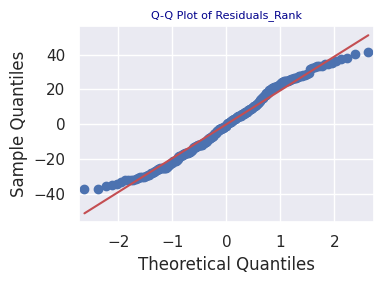

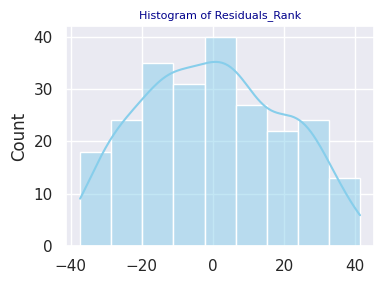

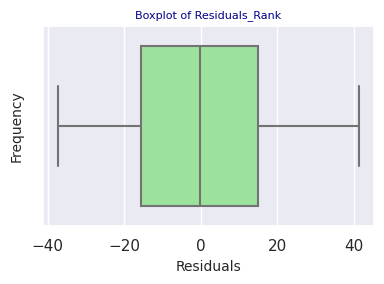

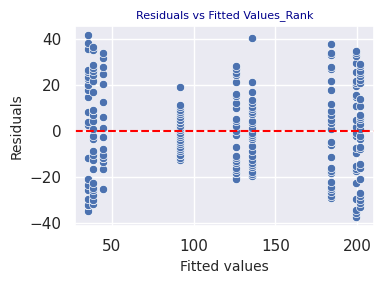

In [ ]:
check_assumptions_and_plot(model_ranked, survival_probabilities_df, Time, save_path, "Rank")

                                             sum_sq     df            F  \
C(max_beta_value)                     945684.410256    2.0  1201.477541   
C(feature_set_num)                      6068.615385    2.0     7.710083   
C(max_beta_value):C(feature_set_num)   27381.589744    4.0    17.393945   
Residual                               88548.884615  225.0          NaN   

                                             PR(>F)  
C(max_beta_value)                     8.194365e-121  
C(feature_set_num)                     5.771756e-04  
C(max_beta_value):C(feature_set_num)   1.889404e-12  
Residual                                        NaN  
Post-hoc Analysis Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
  12_1   12_2  -17.7885 0.0372  -35.0225   -0.5545   True
  12_1   12_3   -2.6731 0.9999  -19.9071   14.5609  False
  12_1    2_1 -157.7308    0.0 -174.9

<ipython-input-34-7b8309cc1290>:33: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if group1 in unique_groups and group2 in unique_groups:
<ipython-input-34-7b8309cc1290>:33: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if group1 in unique_groups and group2 in unique_groups:


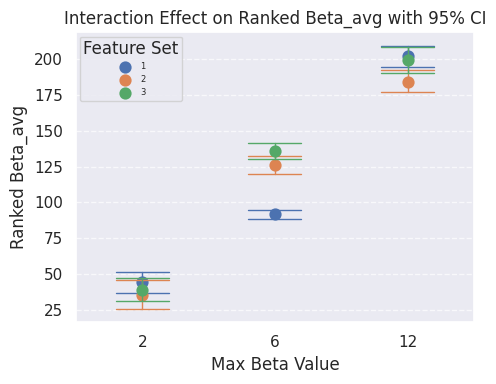

In [ ]:
two_way_rank_transformed_anova(survival_probabilities_df, Time, save_path)

This code first checks if the mean difference is positive and its confidence interval does not cross zero, indicating the difference is statistically significant. Then, among the winning groups, it selects the one with the smallest variance.

# **Analysis and Visualization of Optimal Groups by Dimension Using Friedman Test and Dunn's Posthoc**

In [ ]:
def analyze_and_visualize_best_group_per_dimension_Friedman(survival_probabilities_df, save_path):
    """
    Determine and visualize the best max_beta_value, feature_set_num, and their interaction based on Friedman test, Dunn's posthoc analysis results, variance, and confidence intervals for each dimension.
    """

    # Create an interaction term for post-hoc tests
    survival_probabilities_df['interaction'] = survival_probabilities_df['max_beta_value'].astype(str) + "_" + survival_probabilities_df['feature_set_num'].astype(str)

    dimensions = ['max_beta_value', 'feature_set_num', 'interaction']

    for dimension in dimensions:
        unique_groups = survival_probabilities_df[dimension].unique()
        data_arrays = [survival_probabilities_df[survival_probabilities_df[dimension] == group]['Beta_avg'].values for group in unique_groups]

        # Friedman test for the current dimension
        stat, p = friedmanchisquare(*data_arrays)
        print(f"Friedman Test Results for {dimension}:")
        print(f"Statistic = {stat}, p-value = {p}\n")

        # If the p-value is significant, proceed with Dunn's post-hoc analysis
        if p < 0.05:
            posthoc = sp.posthoc_dunn(survival_probabilities_df, val_col='Beta_avg', group_col=dimension, p_adjust='holm')
            print(f"Dunn's Posthoc Analysis Results for {dimension}:")
            print(posthoc)
            print("\n")

            # Determine the best group based on posthoc analysis and variance
            significant_comparisons = posthoc[posthoc < 0.05].stack()
            winning_groups = defaultdict(int)
            for (group1, group2), p_val in significant_comparisons.items():
                if survival_probabilities_df[survival_probabilities_df[dimension] == group1]['Beta_avg'].mean() > survival_probabilities_df[survival_probabilities_df[dimension] == group2]['Beta_avg'].mean():
                    winning_groups[group1] += 1
                else:
                    winning_groups[group2] += 1

            if winning_groups:
                variances = survival_probabilities_df.groupby(dimension)['Beta_avg'].var()
                best_group = min(winning_groups.keys(), key=lambda group: variances[group])
                print(f"The best {dimension} based on posthoc analysis, variance, and confidence intervals is: {best_group}\n")
            else:
                print(f"No statistically significant group found for {dimension}\n")

        # Display variance and confidence intervals in tabular form
        means = survival_probabilities_df.groupby(dimension)['Beta_avg'].mean()
        variances = survival_probabilities_df.groupby(dimension)['Beta_avg'].var()

        # Compute the SEM for each group
        group_sem = survival_probabilities_df.groupby(dimension)['Beta_avg'].apply(sem)
        conf_intervals_lower = means - 1.96 * group_sem
        conf_intervals_upper = means + 1.96 * group_sem
        ci_difference = conf_intervals_upper - conf_intervals_lower

        table = pd.DataFrame({
            'Mean': means,
            'Variance': variances,
            '95% CI Lower': conf_intervals_lower,
            '95% CI Upper': conf_intervals_upper,
            '95% CI': ci_difference
        })
        print(table)
        print("\n")

        # Visualization for the current dimension using error bars
        plt.figure(figsize=(4, 3))
        sns.pointplot(x=dimension, y='Beta_avg', data=survival_probabilities_df, capsize=0.3, markers='o', errwidth=1, color='blue', ci='sd')
        plt.title(f'Effect of {dimension} on Beta_avg with SD')
        plt.ylabel('Mean Beta_avg')
        plt.xlabel(dimension)
        plt.tight_layout()
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.savefig(f'{save_path}/{dimension}_Effect_Error_Bars_Friedman_Time={Time}.png', dpi=200)
        plt.show()


Friedman Test Results for max_beta_value:
Statistic = 156.0, p-value = 1.3336148155022695e-34

Dunn's Posthoc Analysis Results for max_beta_value:
              2             6             12
2   1.000000e+00  1.025358e-12  2.547252e-46
6   1.025358e-12  1.000000e+00  1.025358e-12
12  2.547252e-46  1.025358e-12  1.000000e+00


The best max_beta_value based on posthoc analysis, variance, and confidence intervals is: 6

                    Mean  Variance  95% CI Lower  95% CI Upper    95% CI
max_beta_value                                                          
2               1.612013  0.001490      1.603447      1.620579  0.017132
6               2.844321  0.028699      2.806725      2.881916  0.075192
12              3.614833  0.095901      3.546108      3.683559  0.137452




<ipython-input-38-ddca2b5f16ca>:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=dimension, y='Beta_avg', data=survival_probabilities_df, capsize=0.3, markers='o', errwidth=1, color='blue', ci='sd')


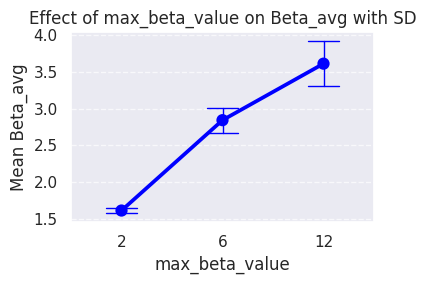

Friedman Test Results for feature_set_num:
Statistic = 31.954545454545368, p-value = 1.151220776002793e-07

Dunn's Posthoc Analysis Results for feature_set_num:
         1        2        3
1  1.00000  0.82336  0.82336
2  0.82336  1.00000  0.82336
3  0.82336  0.82336  1.00000


No statistically significant group found for feature_set_num

                     Mean  Variance  95% CI Lower  95% CI Upper    95% CI
feature_set_num                                                          
1                2.662167  0.751687      2.469757      2.854577  0.384820
2                2.654487  0.630092      2.478326      2.830649  0.352323
3                2.754513  0.805729      2.555306      2.953719  0.398413




<ipython-input-38-ddca2b5f16ca>:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=dimension, y='Beta_avg', data=survival_probabilities_df, capsize=0.3, markers='o', errwidth=1, color='blue', ci='sd')


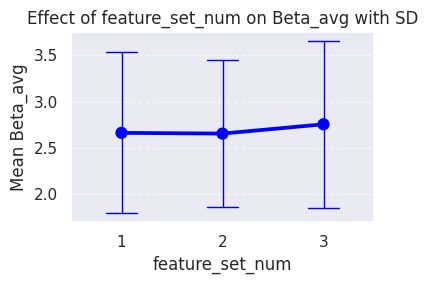

Friedman Test Results for interaction:
Statistic = 203.95121951219508, p-value = 9.391412269453806e-40

Dunn's Posthoc Analysis Results for interaction:
              12_1          12_2          12_3           2_1           2_2  \
12_1  1.000000e+00  1.000000e+00  1.000000e+00  1.413397e-15  2.772787e-17   
12_2  1.000000e+00  1.000000e+00  1.000000e+00  2.539415e-12  7.312473e-14   
12_3  1.000000e+00  1.000000e+00  1.000000e+00  4.558030e-15  9.577434e-17   
2_1   1.413397e-15  2.539415e-12  4.558030e-15  1.000000e+00  1.000000e+00   
2_2   2.772787e-17  7.312473e-14  9.577434e-17  1.000000e+00  1.000000e+00   
2_3   1.065501e-16  2.481779e-13  3.593533e-16  1.000000e+00  1.000000e+00   
6_1   1.153402e-07  1.932026e-05  2.596916e-07  1.147275e-01  3.615547e-02   
6_2   8.938385e-04  2.621357e-02  1.537794e-03  2.657897e-04  3.217192e-05   
6_3   6.579103e-03  1.070174e-01  1.046799e-02  2.474195e-05  2.435722e-06   

               2_3           6_1       6_2       6_3  
12_1  1.065

<ipython-input-38-ddca2b5f16ca>:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=dimension, y='Beta_avg', data=survival_probabilities_df, capsize=0.3, markers='o', errwidth=1, color='blue', ci='sd')


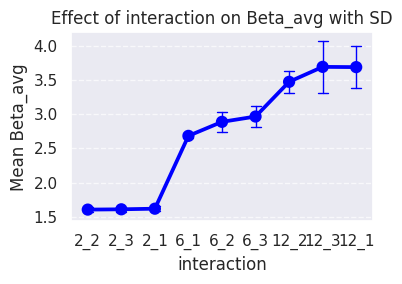

In [ ]:
analyze_and_visualize_best_group_per_dimension_Friedman(survival_probabilities_df, save_path)

In [ ]:
survival_probabilities_df.head(5)

original_id  Time  default_status  Alpha_avg  Beta_avg  \
33        11805    60               1       6.62     1.555   
39        13394    60               1       8.97     1.556   
37        13374    60               0       8.97     1.556   
32        10645    60               0       8.97     1.556   
28         3335    60               0       8.97     1.556   

    survival_probability  max_beta_value  feature_set_num  dataset_num  \
33          4.105039e-14               2                2            1   
39          1.003089e-10               2                2            1   
37          1.003089e-10               2                2            1   
32          4.273000e-06               2                2            1   
28          9.644140e-11               2                2            1   

    Predicted_Survival_Probability interaction  Ranked_Beta_avg  
33                    4.192649e-14         2_2              1.0  
39                    4.396933e-09         2_2              3.5  
37                    4.396933e-09         2_2              3.5  
32                    4.396933e-09         2_2              3.5  
28                    4.396933e-09         2_2              3.5

# **Over all Visualization of Calibration Curves just to get an overall idea(sumup all models outcome alltogether)**

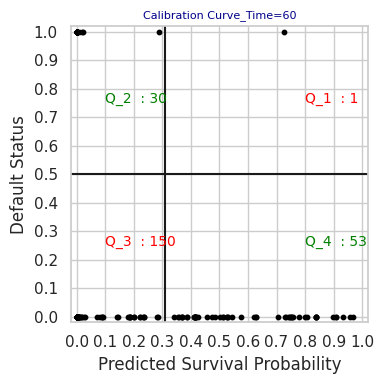

In [ ]:
# Set the visual style of the plot
sns.set_style("whitegrid")
sns.set_context("notebook")
#sns.set(font_scale=1.2)

# Preprocess the data for the calibration curve
survival_probabilities_df2 = survival_probabilities_df[["default_status", "Predicted_Survival_Probability"]].sort_values(by='Predicted_Survival_Probability')

# Define the conditions for each quadrant of the calibration curve
quadrant1 = (survival_probabilities_df2['Predicted_Survival_Probability'] >= 0.31) & (survival_probabilities_df2['default_status'] >= 0.5)
quadrant2 = (survival_probabilities_df2['Predicted_Survival_Probability'] < 0.31) & (survival_probabilities_df2['default_status'] >= 0.5)
quadrant3 = (survival_probabilities_df2['Predicted_Survival_Probability'] < 0.31) & (survival_probabilities_df2['default_status'] < 0.5)
quadrant4 = (survival_probabilities_df2['Predicted_Survival_Probability'] >= 0.31) & (survival_probabilities_df2['default_status'] < 0.5)

# Count the number of data points in each quadrant
num_quadrant1 = quadrant1.sum()
num_quadrant2 = quadrant2.sum()
num_quadrant3 = quadrant3.sum()
num_quadrant4 = quadrant4.sum()

# Generate the calibration curve as a scatter plot
plt.figure(figsize=(4, 4))
plt.scatter(survival_probabilities_df2['Predicted_Survival_Probability'], survival_probabilities_df2['default_status'], s=10,  color='black')
plt.axvline(x=0.31, color='k', label="Threshhold")
plt.axhline(y=0.5, color='k')
plt.ylabel('Default Status')
plt.xlabel('Predicted Survival Probability')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title(f'Calibration Curve_Time={Time}', color='darkblue', fontsize=8)

# Add data counts to the plot for each quadrant
plt.text(0.8, 0.75, f'Q_1  : {num_quadrant1}', fontsize=10, color="red")
plt.text(0.1, 0.75, f'Q_2  : {num_quadrant2}', fontsize=10, color="green")
plt.text(0.1, 0.25, f'Q_3  : {num_quadrant3}', fontsize=10, color="red")
plt.text(0.8, 0.25, f'Q_4  : {num_quadrant4}', fontsize=10, color="green")

# For better spacing between subplots
plt.tight_layout()


plt.savefig(f'/content/drive/My Drive/Master_Thesis/WTTE_RNN/Picture10_final/Overall_Calibration_Time={Time}.png', dpi=200)


plt.show()


In [ ]:
survival_probabilities_df.head()

original_id  Time  default_status  Alpha_avg  Beta_avg  \
33        11805    60               1       6.62     1.555   
39        13394    60               1       8.97     1.556   
37        13374    60               0       8.97     1.556   
32        10645    60               0       8.97     1.556   
28         3335    60               0       8.97     1.556   

    survival_probability  max_beta_value  feature_set_num  dataset_num  \
33          4.105039e-14               2                2            1   
39          1.003089e-10               2                2            1   
37          1.003089e-10               2                2            1   
32          4.273000e-06               2                2            1   
28          9.644140e-11               2                2            1   

    Predicted_Survival_Probability interaction  Ranked_Beta_avg  
33                    4.192649e-14         2_2              1.0  
39                    4.396933e-09         2_2              3.5  
37                    4.396933e-09         2_2              3.5  
32                    4.396933e-09         2_2              3.5  
28                    4.396933e-09         2_2              3.5

# **Visualization of Calibration Curves with Quadrant Data Counts for Different Parameter Combinations**

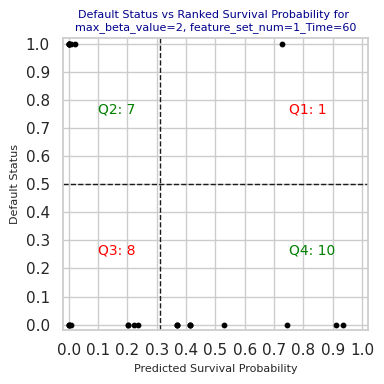

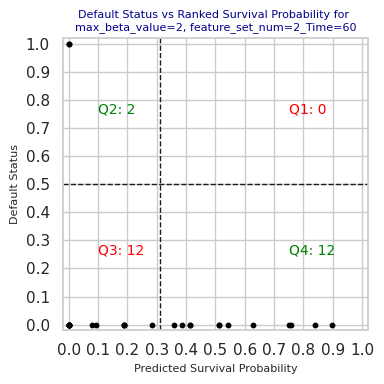

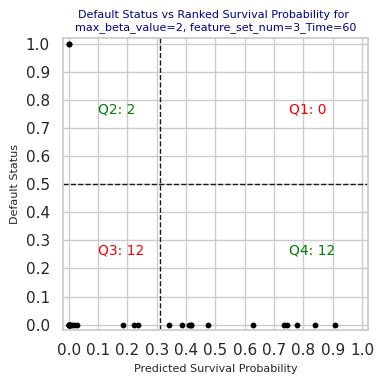

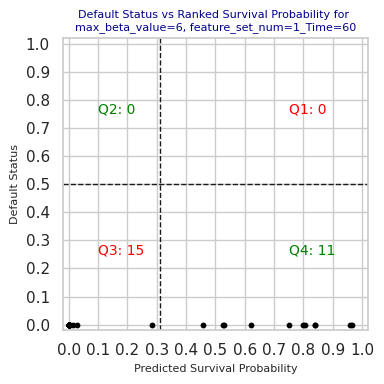

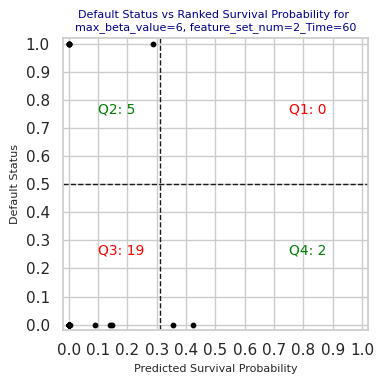

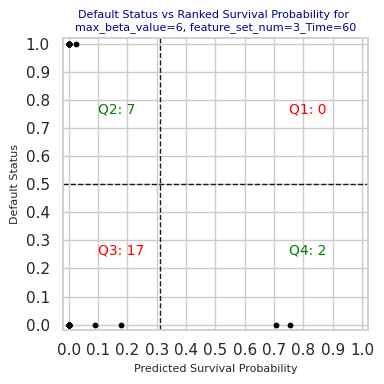

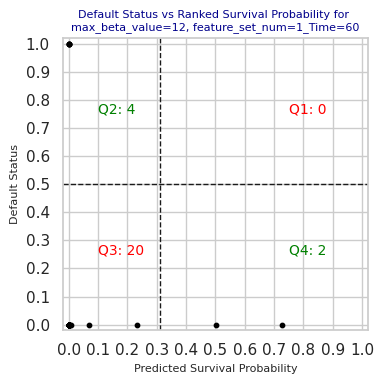

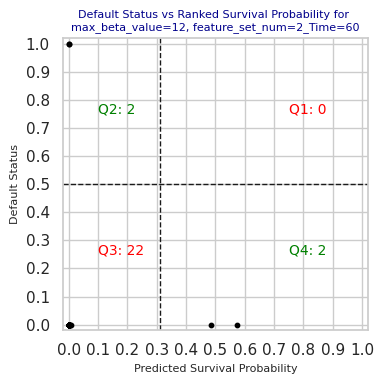

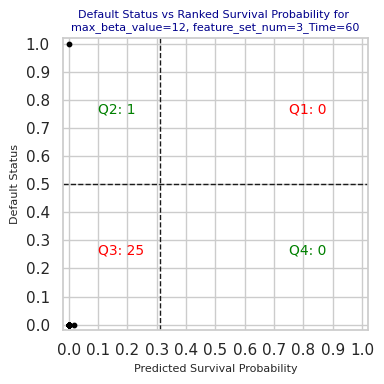

In [ ]:
# Set the visual style of the plot
sns.set_style("whitegrid")
sns.set_context("notebook")
#sns.set(font_scale=1.2)

# Create a separate plot for each unique combination of 'max_beta_value', 'feature_set_num', and 'dataset_num'
grouped = survival_probabilities_df.groupby(['max_beta_value', 'feature_set_num', 'dataset_num'])

# For each unique combination of parameters
for (max_beta_value, feature_set_num, dataset_num), group in grouped:
    # Rank the survival probabilities within the group
    group = group.sort_values(by='Predicted_Survival_Probability')

    # Define the conditions for each quadrant of the calibration curve
    quadrant1 = (group['Predicted_Survival_Probability'] >= 0.31) & (group['default_status'] >= 0.5)
    quadrant2 = (group['Predicted_Survival_Probability'] < 0.31) & (group['default_status'] >= 0.5)
    quadrant3 = (group['Predicted_Survival_Probability'] < 0.31) & (group['default_status'] < 0.5)
    quadrant4 = (group['Predicted_Survival_Probability'] >= 0.31) & (group['default_status'] < 0.5)

    # Count the number of data points in each quadrant
    num_quadrant1 = quadrant1.sum()
    num_quadrant2 = quadrant2.sum()
    num_quadrant3 = quadrant3.sum()
    num_quadrant4 = quadrant4.sum()

    # Generate the calibration curve as a scatter plot
    plt.figure(figsize=(4, 4))
    plt.scatter(group['Predicted_Survival_Probability'], group['default_status'], s=10,  color='black')
    #plt.colorbar(label="Predicted Survival Probability")
    plt.axvline(x=0.31, color='k', linestyle="--", linewidth=1)
    plt.axhline(y=0.5, color='k', linestyle="--", linewidth=1)
    plt.ylabel('Default Status', fontsize=8)
    plt.xlabel('Predicted Survival Probability', fontsize=8)
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.title(f'Default Status vs Ranked Survival Probability for \nmax_beta_value={max_beta_value}, feature_set_num={feature_set_num}_Time={Time}', fontsize=8, color='darkblue')

    # Add data counts to the plot
    plt.text(0.75, 0.75, f'Q1: {num_quadrant1}', fontsize=10, color = "red")
    plt.text(0.1, 0.75, f'Q2: {num_quadrant2}', fontsize=10, color = "green")
    plt.text(0.1, 0.25, f'Q3: {num_quadrant3}', fontsize=10, color = "red")
    plt.text(0.75, 0.25, f'Q4: {num_quadrant4}', fontsize=10, color = "green")

    # For better spacing between subplots
    plt.tight_layout()

    plt.savefig(f'/content/drive/My Drive/Master_Thesis/WTTE_RNN/Picture10_final/feature_set_num={feature_set_num}___max_beta_value={max_beta_value}__Calibrations_Time={Time}.png', dpi=200)

    plt.show()


#**Creating Cumulative Distribution Function (CDF) Plots for Survival Probabilities, Segmented by Default Status**


1. Cumulative Distribution Function (CDF) Analysis
1.1 Distributional Insights
The Cumulative Distribution Function (CDF) is a statistical tool that offers an illustrative representation of the cumulative probabilities associated with a continuous random variable (Smith, 2005). In the context of our analysis, the CDF was employed to analyze the survival probabilities for two distinct groups, referred to as 'Good' and 'Bad/Default'. The generated CDF plots facilitated an understanding of the underlying distribution of survival probabilities within these categories.

1.2 Threshold Identification and Parameter Insights
By scrutinizing the CDF plots, it became feasible to pinpoint specific thresholds where the survival probabilities diverge between the two groups. This threshold analysis was instrumental in classifying observations (Johnson & Wichern, 2007). Moreover, the visual comparison across different parameters ('max_beta_value', 'feature_set_num', 'dataset_num') yielded insights into how these survival probabilities fluctuate with varying parameter configurations.

2. Connection to ROC-AUC
2.1 ROC-AUC and Threshold Analysis
The Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) are widely recognized as evaluative metrics for binary classification (Hanley & McNeil, 1982). Insights derived from the CDF facilitated an understanding of the potential impact of various cut-off values on the ROC curve, thereby influencing the AUC.





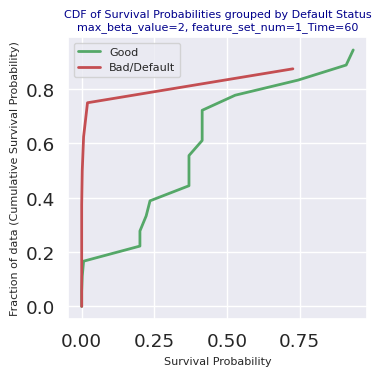

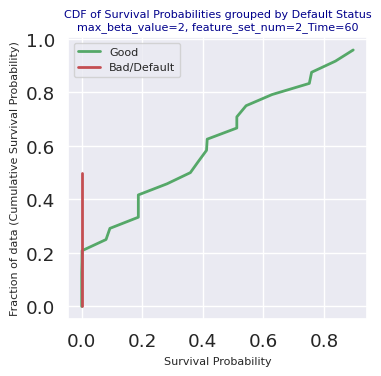

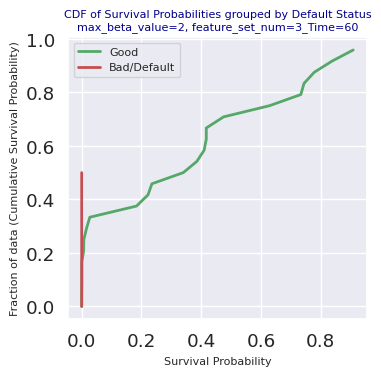

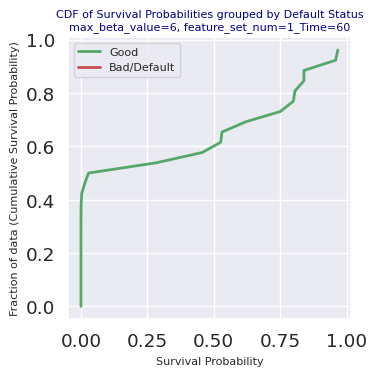

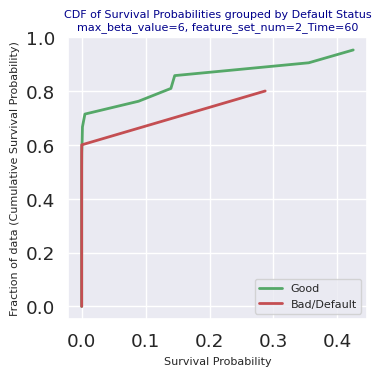

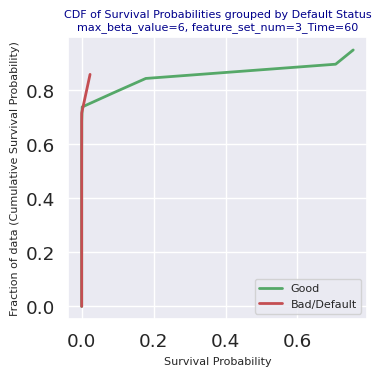

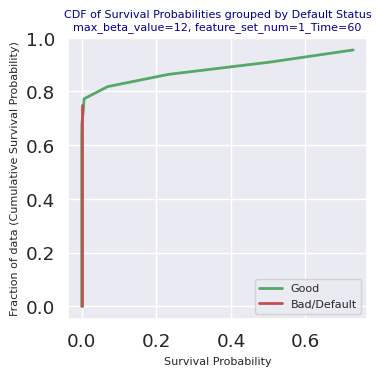

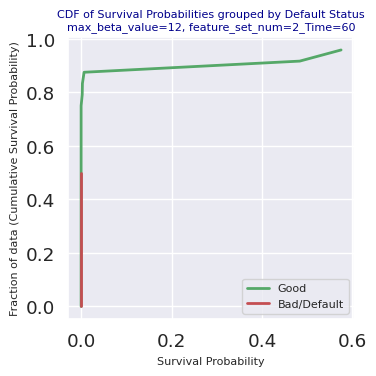

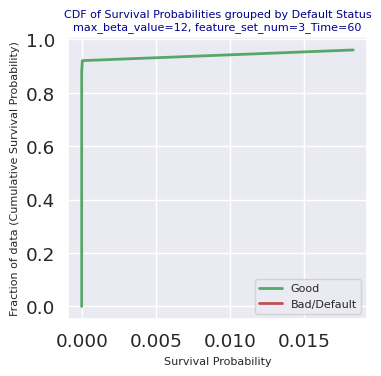

In [ ]:
# Set the visual style of the plot
sns.set_style("whitegrid")
sns.set_context("notebook")
sns.set(font_scale=1.2)

# Group the data by 'max_beta_value', 'feature_set_num', and 'dataset_num'
grouped = survival_probabilities_df.groupby(['max_beta_value', 'feature_set_num', 'dataset_num'])

# Iterate over each unique combination of 'max_beta_value', 'feature_set_num', and 'dataset_num'
for (max_beta_value, feature_set_num, dataset_num), group in grouped:
    # Separate the survival probabilities based on default status
    group1 = group[group["default_status"] == 0]["Predicted_Survival_Probability"]
    group2 = group[group["default_status"] == 1]["Predicted_Survival_Probability"]

    # Create a new figure for each unique combination
    plt.figure(figsize=(4, 4))

    # Create the CDF plot for each group
    for data, label, color in zip([group1, group2], ['Good', 'Bad/Default'], ['g', 'r']):
        sorted_data = np.sort(data)  # Sort the data
        yvals = np.arange(len(sorted_data))/float(len(sorted_data))  # Calculate the fraction of data points
        plt.plot(sorted_data, yvals, label=label, color=color, linewidth=2)  # Plot the CDF

    # Add a legend to the plot
    plt.legend(fontsize=8)
    plt.xlabel('Survival Probability', fontsize=8)  # Set the x-axis label
    plt.ylabel('Fraction of data (Cumulative Survival Probability)',fontsize=8)  # Set the y-axis label
    # Set the title of the plot
    plt.title(f'CDF of Survival Probabilities grouped by Default Status\nmax_beta_value={max_beta_value}, feature_set_num={feature_set_num}_Time={Time}', fontsize=8, color='darkblue')
    plt.grid(True)  # Add a grid to the plot
    plt.tight_layout()  # Adjust the padding between and around the subplots

    #plt.grid(color='lightgray', linestyle='-', linewidth=0.5)

    # Save the CDF plot to Google Drive
    plt.savefig(f'/content/drive/My Drive/Master_Thesis/WTTE_RNN/Picture10_final/feature_set_num={feature_set_num}___max_beta_value={max_beta_value}__Specific_CDF_Time={Time}.png', dpi=200)
    plt.show()  # Display the CDF plot


# **Conversion of PNG Images to PDF in Specified Directories**

In [ ]:
import img2pdf
from PIL import Image
import os
import tempfile

# specify the directory with PNG files
input_directory = "/content/drive/My Drive/Master_Thesis/WTTE_RNN/Picture10_final"

# specify the directory to save PDF files
output_directory = "/content/drive/My Drive/Master_Thesis/WTTE_RNN/Picture10_final_pdf"

# create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# loop through the files in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith(".png"):
        input_path = os.path.join(input_directory, filename)
        output_path = os.path.join(output_directory, os.path.splitext(filename)[0] + ".pdf")

        # Open the image file and remove alpha channel if present
        img = Image.open(input_path).convert("RGB")

        # Save the image to a temporary file
        with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as temp_img_file:
            temp_img_path = temp_img_file.name
            img.save(temp_img_path)

        # Convert the temporary image file to PDF
        with open(output_path, "wb") as pdf_file:
            pdf_file.write(img2pdf.convert(temp_img_path))

        # Remove the temporary image file
        os.remove(temp_img_path)
